## Problem Statement

### Context:

In today's dynamic business environment, precise sales and production forecasts are essential for strategic planning and operational efficiency. Companies like IJK Shoe Company and RST Firm have accumulated extensive monthly data on shoe sales and soft drink production, respectively, spanning from January 1980 to July 1995. Leveraging advanced time series forecasting techniques, these companies aim to utilize their historical data to predict future trends accurately. This initiative enables them to make informed decisions, optimize resource allocation, and adapt proactively to market dynamics.

### Objective:

The primary objective is to predict future sales for IJK Shoe Company and production volumes for RST Firm over the next one year. By analyzing the historical monthly data spanning from January 1980 to July 1995, our goal is to develop accurate forecasting models that capture the underlying patterns and seasonality inherent in the sales and production processes. Through this task, we aim to empower IJK Shoe Company and RST Firm with actionable insights that facilitate proactive planning, optimize resource allocation, and enhance operational efficiency. By anticipating future trends in sales and production, both companies can align their strategies, streamline production-related activities, and capitalize on emerging opportunities in their respective markets.

## **Please read the instructions carefully before starting the project.**
This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the report and submit the same.

## Import the necessary libraries.

In [94]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import  mean_squared_error

## Data Overview

### Shoe Sales

In [2]:
df1 = pd.read_csv('Shoe-Sales.csv')

In [95]:
df1.head(5)  # Complete the code to view first 5 rows of the data

YearMonth  Shoe_Sales
YearMonth                       
1980-01-01   1980-01          85
1980-02-01   1980-02          89
1980-03-01   1980-03         109
1980-04-01   1980-04          95
1980-05-01   1980-05          91

In [4]:
df1.tail(5)   # Complete the code to view last 5 rows of the data

YearMonth  Shoe_Sales
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

In [220]:
df1.shape #Complete the code to find the shape of the data

(187, 2)

In [6]:
df1.describe()  # Complete the code to get information on dataset

Shoe_Sales
count  187.000000
mean   245.636364
std    121.390804
min     85.000000
25%    143.500000
50%    220.000000
75%    315.500000
max    662.000000

#### Missing Value Check

In [7]:
df1.isna().sum() # Complete the code to check for null values

YearMonth     0
Shoe_Sales    0
dtype: int64

#### Plot the data

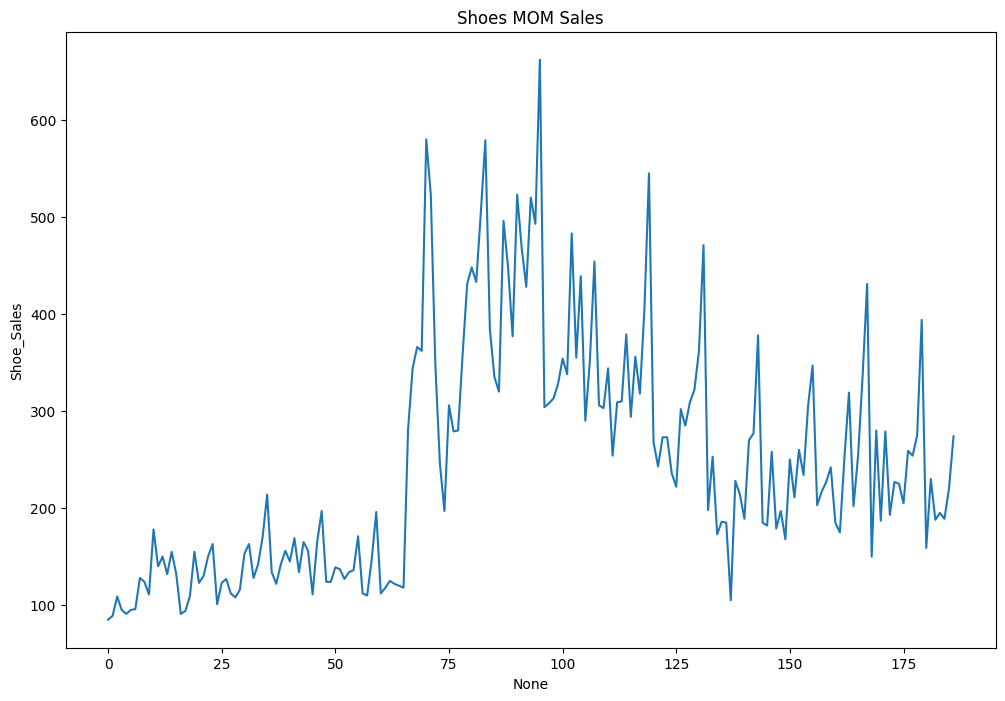

In [8]:
sns.lineplot(data=df1, x=df1.index, y= 'Shoe_Sales') # Complete the code to plot the trend of the data
plt.title('Shoes MOM Sales');

### Soft Drinks

In [9]:
df2 = pd.read_csv('SoftDrink.csv')

In [10]:
df2.head(5)# Complete the code to view first 5 rows of the data

YearMonth  SoftDrinkProduction
0   1980-01                 1954
1   1980-02                 2302
2   1980-03                 3054
3   1980-04                 2414
4   1980-05                 2226

In [11]:
df2.tail(5) # Complete the code to view first 5 rows of the data

YearMonth  SoftDrinkProduction
182   1995-03                 4067
183   1995-04                 4022
184   1995-05                 3937
185   1995-06                 4365
186   1995-07                 4290

In [12]:
df2.shape  # Complete the code to find the shape of the data

(187, 2)

In [13]:
df2.describe()  # Complete the code to get information on dataset

SoftDrinkProduction
count           187.000000
mean           3262.609626
std             728.357367
min            1954.000000
25%            2748.000000
50%            3134.000000
75%            3741.000000
max            5725.000000

#### Missing Value Check

In [14]:
df2.isnull().sum() # Complete the code to check for null values

YearMonth              0
SoftDrinkProduction    0
dtype: int64

#### Plot the data

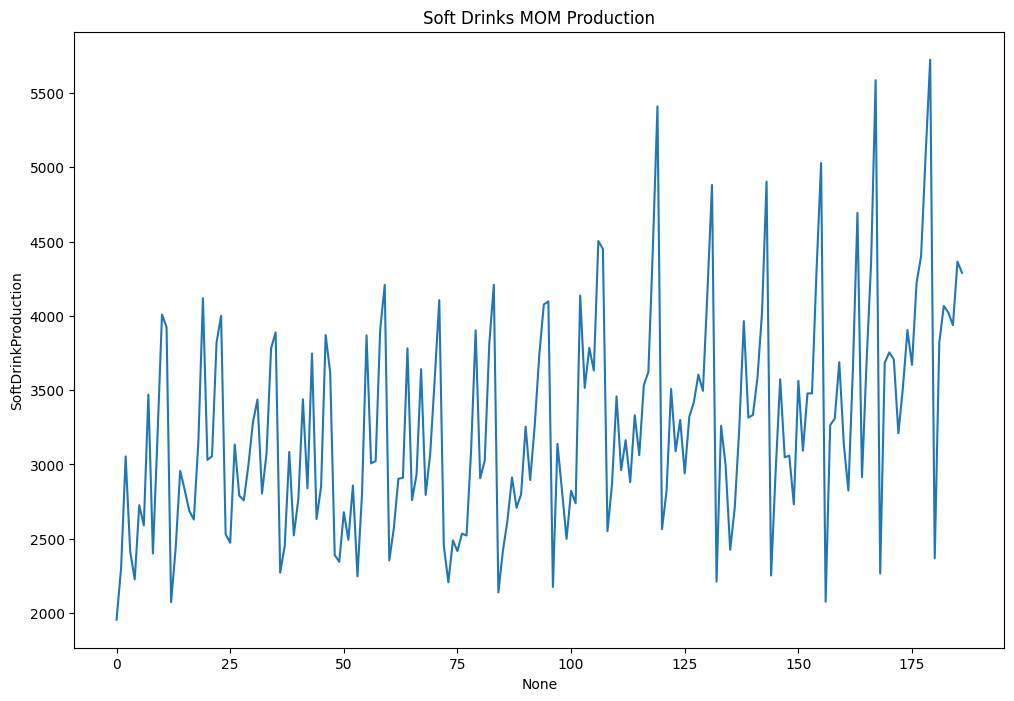

In [15]:
sns.lineplot(data=df2, x=df2.index, y= 'SoftDrinkProduction') # Complete the code to plot the trend of the data
plt.title('Soft Drinks MOM Production');

## Exploratory Data Analysis

### Shoe Sales

#### Bivariate Analysis

In [16]:
df1

YearMonth  Shoe_Sales
0     1980-01          85
1     1980-02          89
2     1980-03         109
3     1980-04          95
4     1980-05          91
..        ...         ...
182   1995-03         188
183   1995-04         195
184   1995-05         189
185   1995-06         220
186   1995-07         274

[187 rows x 2 columns]

In [17]:
df1.index = pd.to_datetime(df1['YearMonth'])


In [18]:
df1['year'] = df1.index.year
df1['month'] = df1.index.month

In [19]:
df1.describe() # Complete the code to find the statistics summary of the data

Shoe_Sales         year       month
count  187.000000   187.000000  187.000000
mean   245.636364  1987.299465    6.406417
std    121.390804     4.514749    3.450972
min     85.000000  1980.000000    1.000000
25%    143.500000  1983.000000    3.000000
50%    220.000000  1987.000000    6.000000
75%    315.500000  1991.000000    9.000000
max    662.000000  1995.000000   12.000000

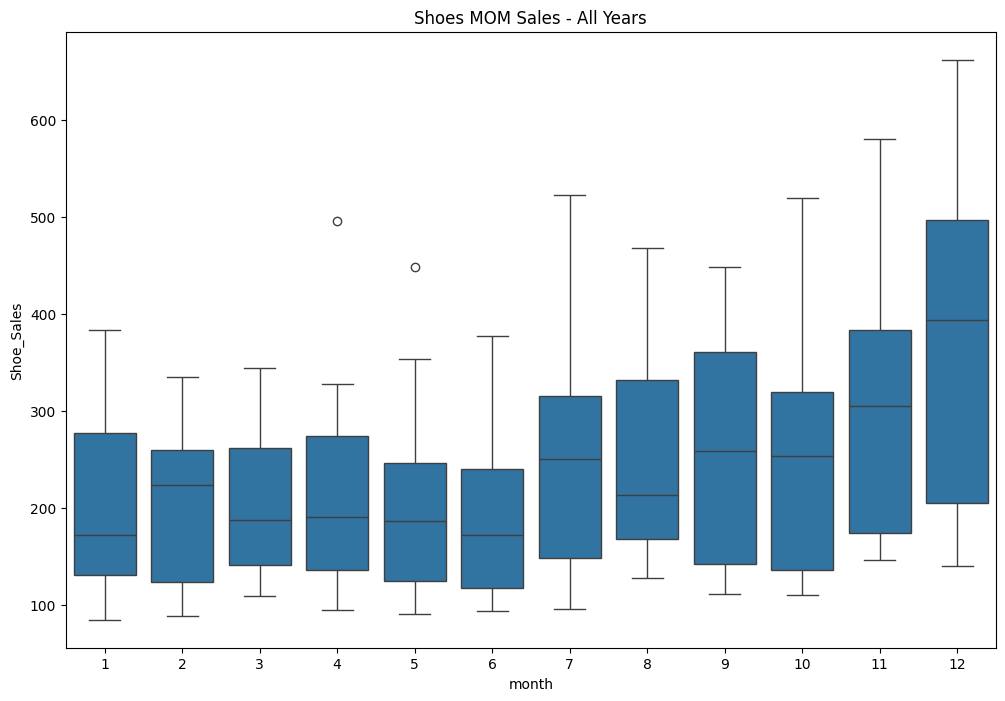

In [20]:
sns.boxplot(data=df1, x='month', y= 'Shoe_Sales')
plt.title('Shoes MOM Sales - All Years');

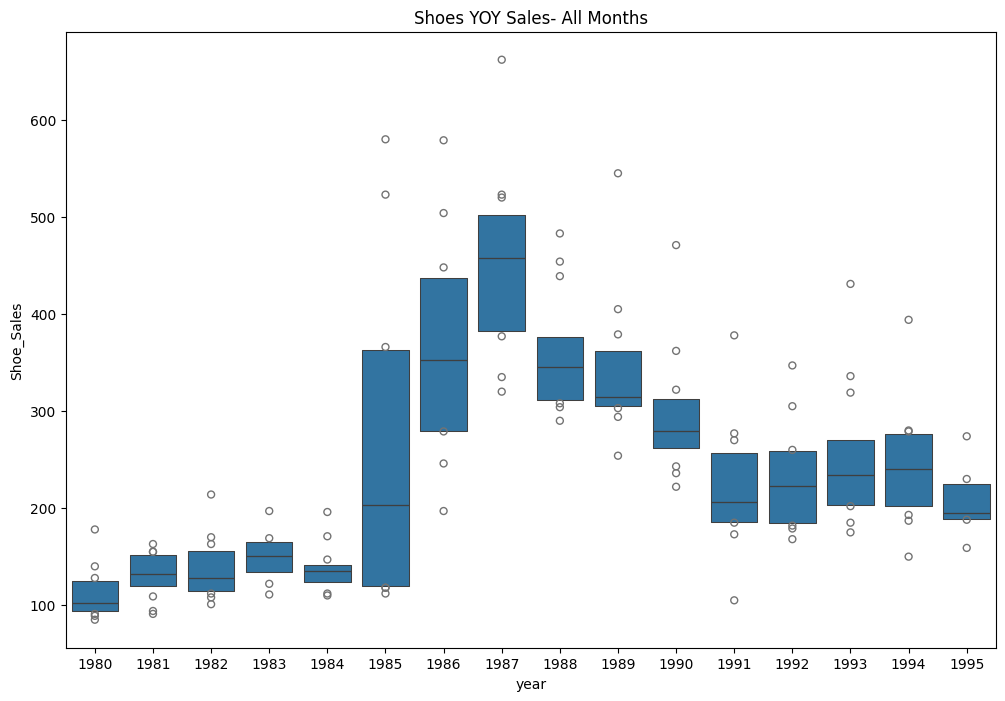

In [21]:
sns.boxenplot(data=df1, x='year', y= 'Shoe_Sales') # Complete the code to plot a boxplot at year level
plt.title('Shoes YOY Sales- All Months');

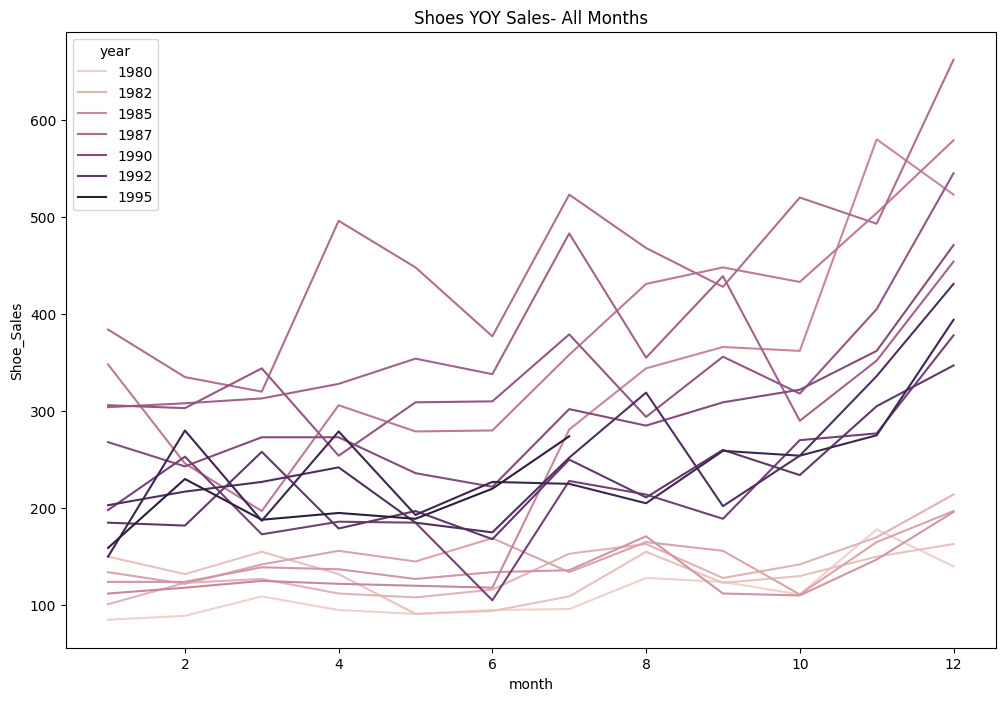

In [22]:
sns.lineplot(data=df1, x='month', y= 'Shoe_Sales', hue='year') # Complete the code plot a trendline to show sales of all months
plt.title('Shoes YOY Sales- All Months');

#### Decomposition

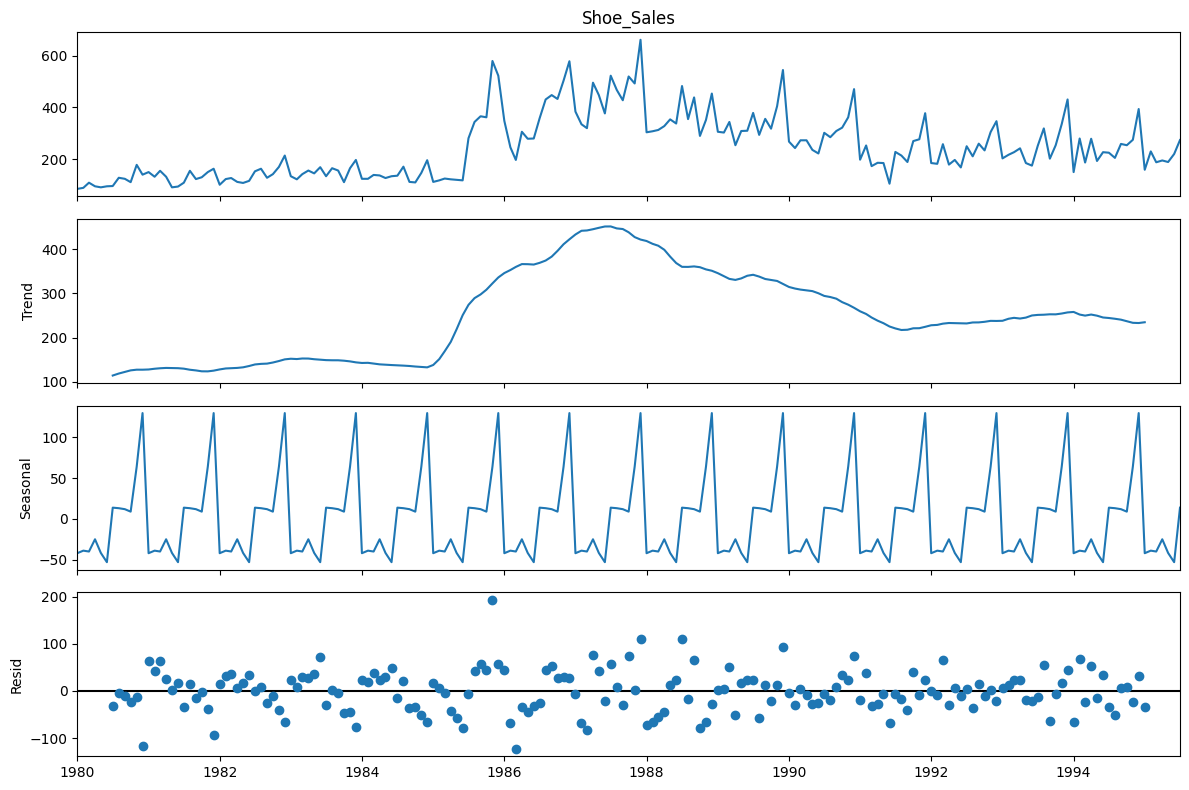

In [23]:
df1_add_decompose = seasonal_decompose(df1['Shoe_Sales'], model = 'additive')
df1_add_decompose.plot()
plt.show()

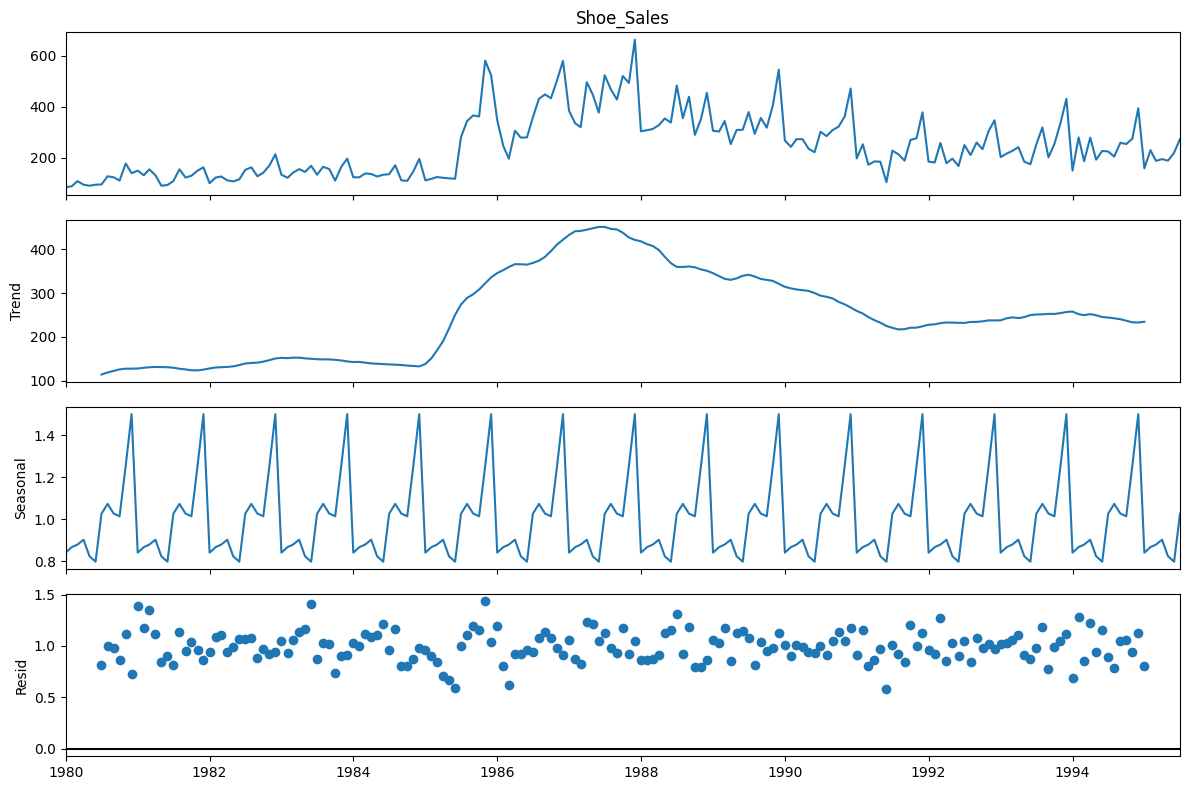

In [24]:
df1_mul_decompose = seasonal_decompose(df1['Shoe_Sales'], model = 'multiplicative') # Complete the code to perform multiplicative decomposition
df1_mul_decompose.plot()
plt.show()

### Soft Drinks

#### Bivariate Analysis

In [25]:
df2.index = pd.to_datetime(df2['YearMonth'])

df2['year'] =  df2.index.year# Complete the code to create a year column
df2['month'] = df2.index.month # Complete the code to create a month column

In [26]:
df2.rename(columns={'SoftDrinkProduction':'Softdrinks'},inplace=True)

In [27]:
df2.describe() #Complete the code to find the statistics of the data

Softdrinks         year       month
count   187.000000   187.000000  187.000000
mean   3262.609626  1987.299465    6.406417
std     728.357367     4.514749    3.450972
min    1954.000000  1980.000000    1.000000
25%    2748.000000  1983.000000    3.000000
50%    3134.000000  1987.000000    6.000000
75%    3741.000000  1991.000000    9.000000
max    5725.000000  1995.000000   12.000000

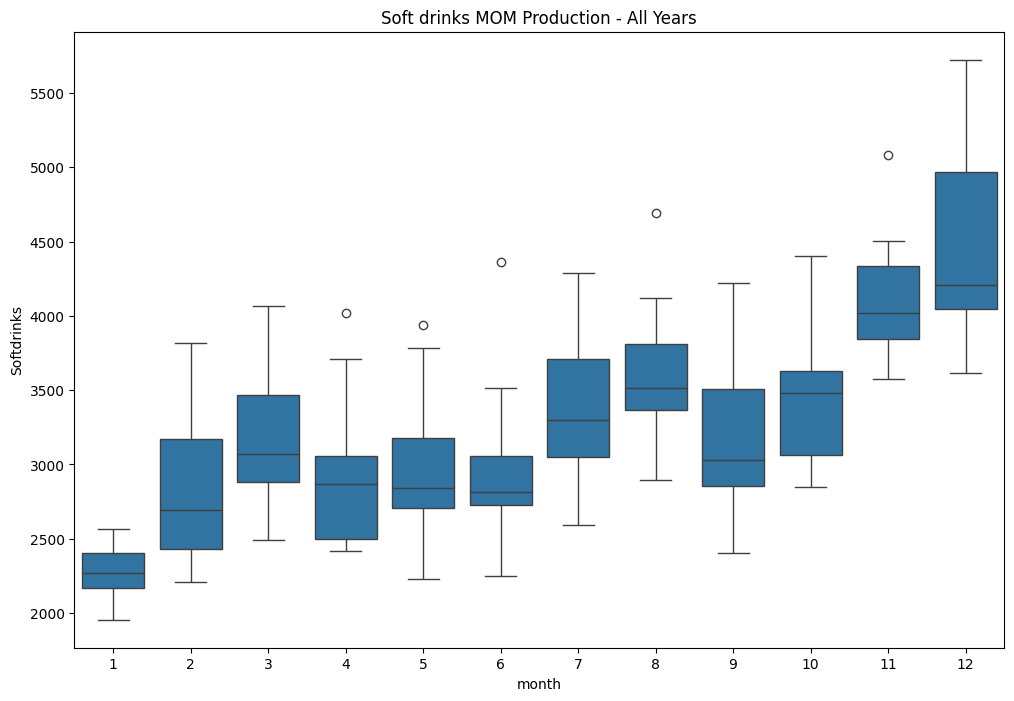

In [28]:
sns.boxplot(data=df2, x='month', y= 'Softdrinks') # Complete the code to plot a boxplot at month level
plt.title('Soft drinks MOM Production - All Years');

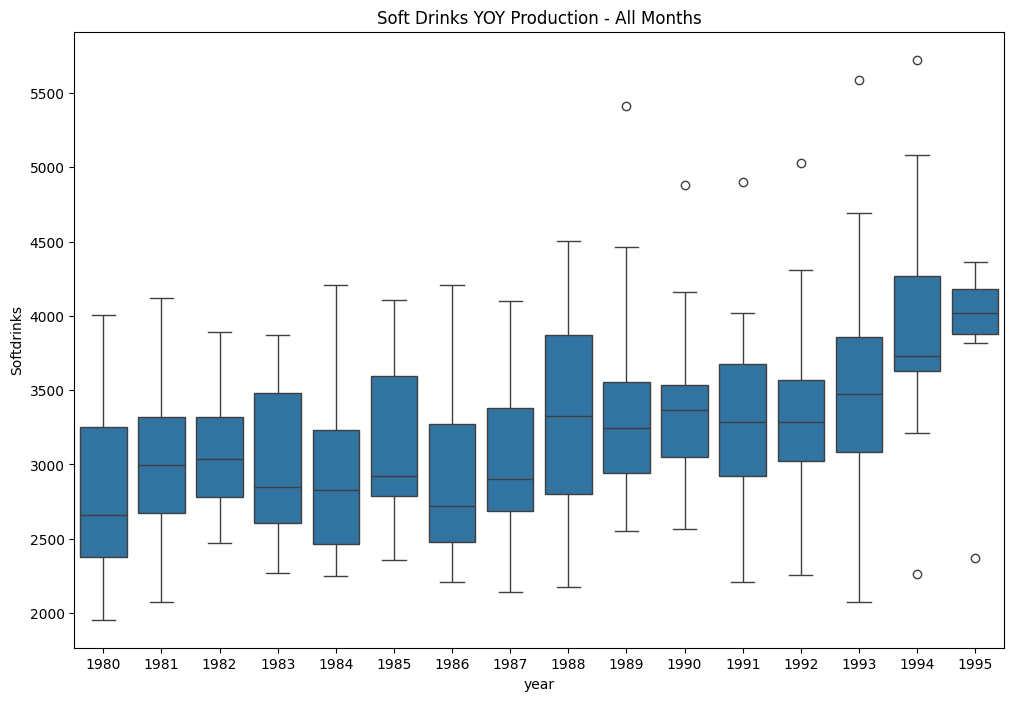

In [29]:
sns.boxplot(data=df2, x='year', y= 'Softdrinks') # Complete the code to plot a boxplot at year level
plt.title('Soft Drinks YOY Production - All Months');

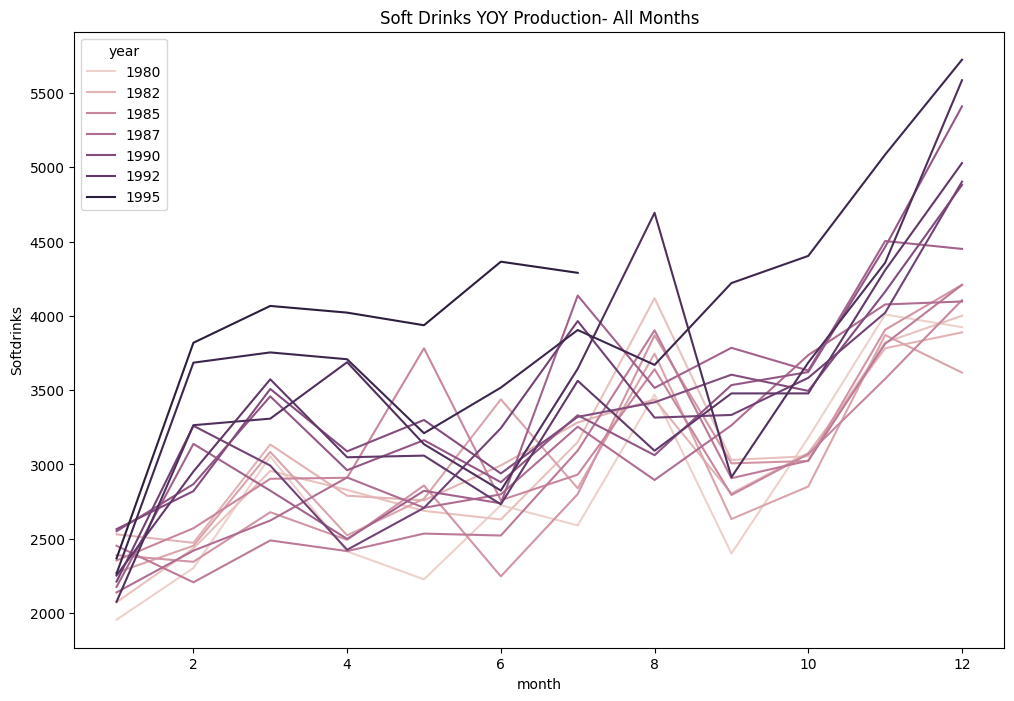

In [30]:
sns.lineplot(data=df2, x='month', y= 'Softdrinks', hue='year') # Complete the code plot a trendline to show sales of all months
plt.title('Soft Drinks YOY Production- All Months');

#### Decomposition

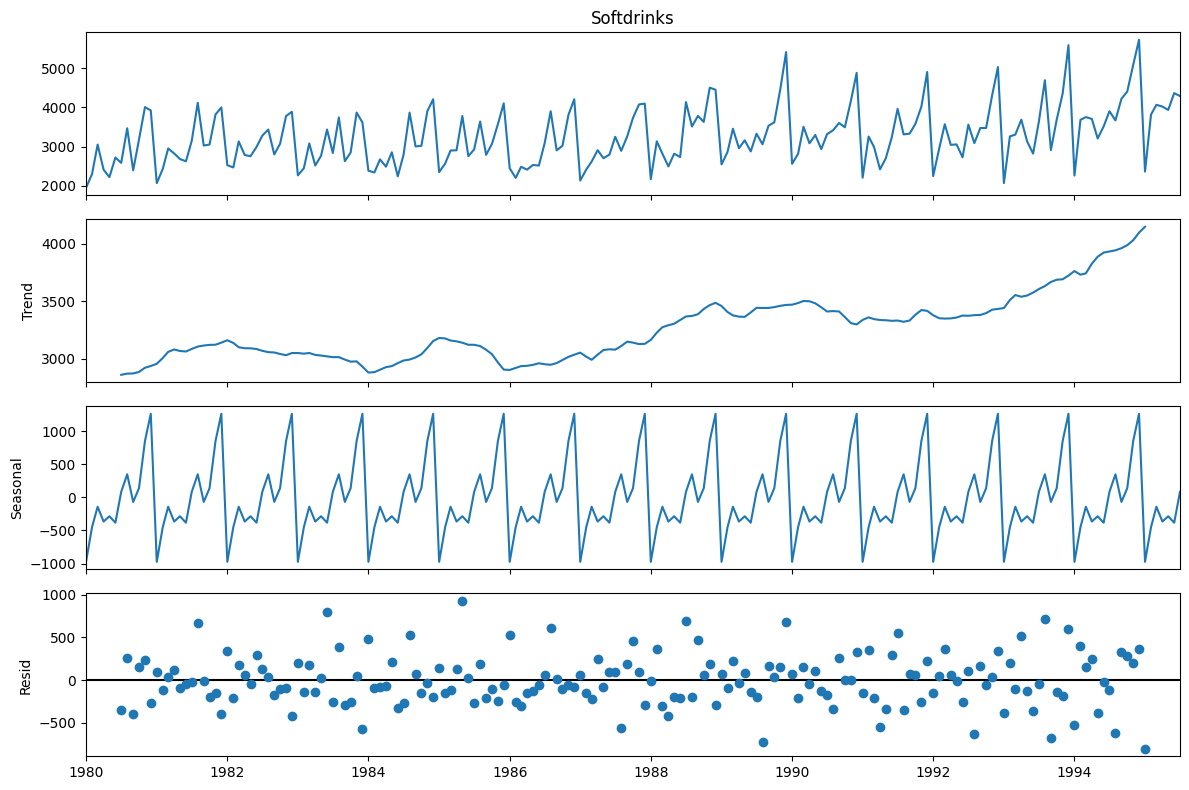

In [31]:
df2_add_decompose = seasonal_decompose(df2['Softdrinks'], model = 'additive')  # Complete the code to perform additive decomposition
df2_add_decompose.plot()
plt.show()

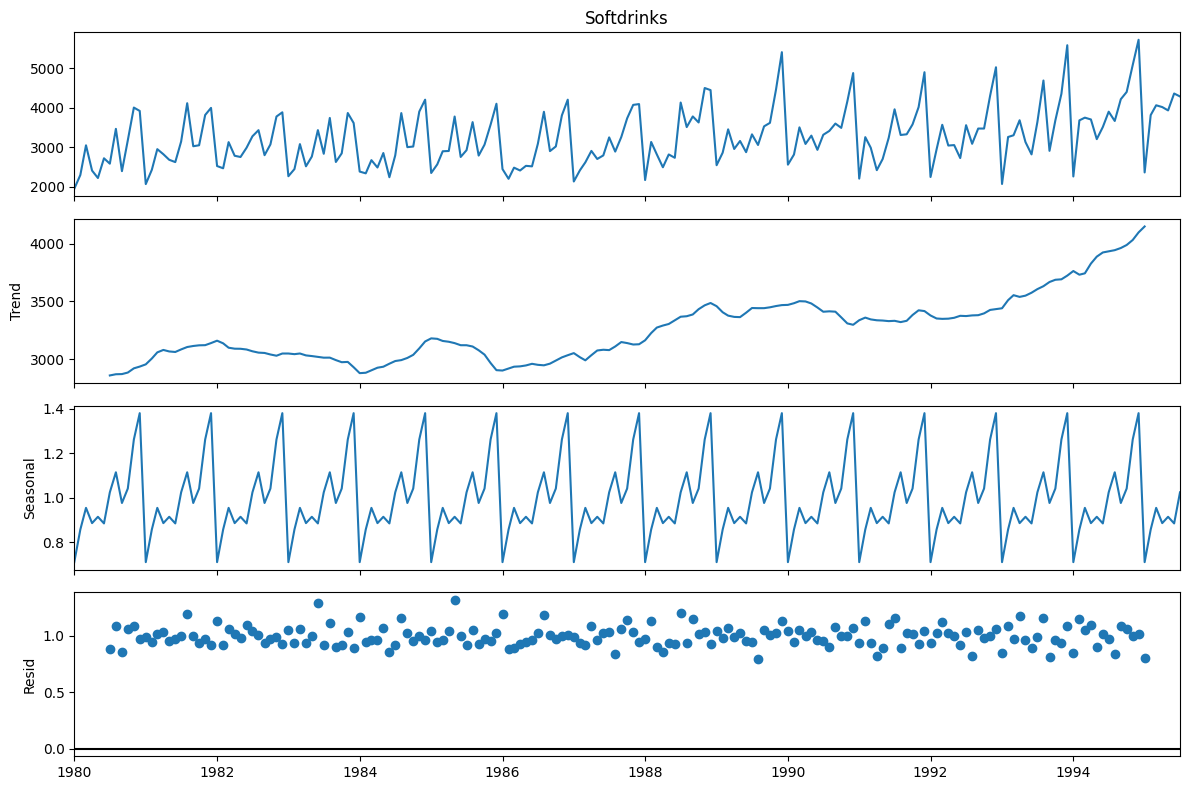

In [32]:
df2_mul_decompose = seasonal_decompose(df2['Softdrinks'], model = 'multiplicative')  # Complete the code to perform multiplicative decomposition
df2_mul_decompose.plot()
plt.show()

In [33]:
df1.drop(columns=['year','month'],axis=1,inplace=True)
df2.drop(columns=['year','month'],axis=1,inplace=True) # Complete the code to drop year and month column in Softdrinks data

## Data Pre-processing

### Shoe Sales

#### Train Test Split

In [34]:
train_ss   =   df1[df1.index.year < 1991] # Complete the code to split train data having data less than 1991
test_ss   =   df1[df1.index.year >= 1991] # Complete the code to split test data having data greater than or equal to 1991
print(train_ss.shape)
print(test_ss.shape)

(132, 2)
(55, 2)


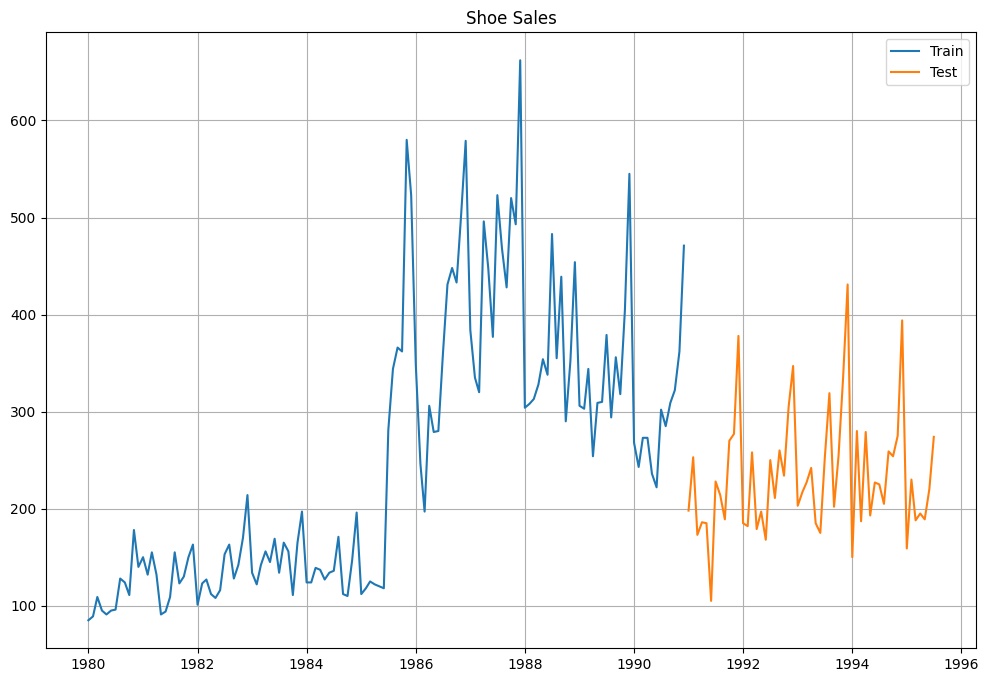

In [35]:
plt.plot(train_ss['Shoe_Sales'], label='Train')
plt.plot(test_ss['Shoe_Sales'], label='Test')
plt.title('Shoe Sales')
plt.legend(loc='best')
plt.grid()

### Soft Drinks

#### Train Test Split

In [37]:
train_sd    =   df2[df2.index.year < 1991] # Complete the code to split train data having data less than 1991
test_sd    =    df2[df2.index.year >= 1991] # Complete the code to split test data having data greater than or equal to 1991
print(train_sd.shape)
print(test_sd.shape)

(132, 2)
(55, 2)


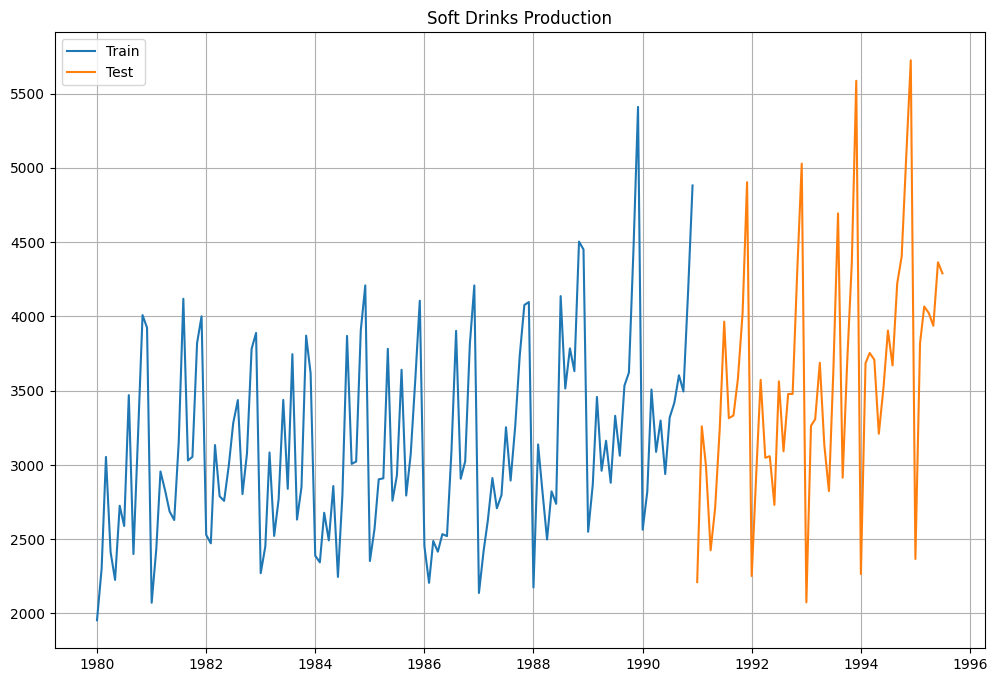

In [39]:
plt.plot(train_sd['Softdrinks'], label='Train') # Complete the code to plot the trend of training data
plt.plot(test_sd['Softdrinks'], label='Test') # Complete the code to plot the trend of training data
plt.title('Soft Drinks Production');
plt.legend(loc = 'best')
plt.grid();

## Model Building - Original Data

In [40]:
#Creating a copy of the data for model building
train1 = train_ss.copy()
test1 = test_ss.copy()

train2 = train_sd.copy()
test2 = test_sd.copy()

### Shoes Sales

#### Linear Regression

In [41]:
train1

YearMonth  Shoe_Sales
YearMonth                       
1980-01-01   1980-01          85
1980-02-01   1980-02          89
1980-03-01   1980-03         109
1980-04-01   1980-04          95
1980-05-01   1980-05          91
...              ...         ...
1990-08-01   1990-08         285
1990-09-01   1990-09         309
1990-10-01   1990-10         322
1990-11-01   1990-11         362
1990-12-01   1990-12         471

[132 rows x 2 columns]

In [42]:
train1

YearMonth  Shoe_Sales
YearMonth                       
1980-01-01   1980-01          85
1980-02-01   1980-02          89
1980-03-01   1980-03         109
1980-04-01   1980-04          95
1980-05-01   1980-05          91
...              ...         ...
1990-08-01   1990-08         285
1990-09-01   1990-09         309
1990-10-01   1990-10         322
1990-11-01   1990-11         362
1990-12-01   1990-12         471

[132 rows x 2 columns]

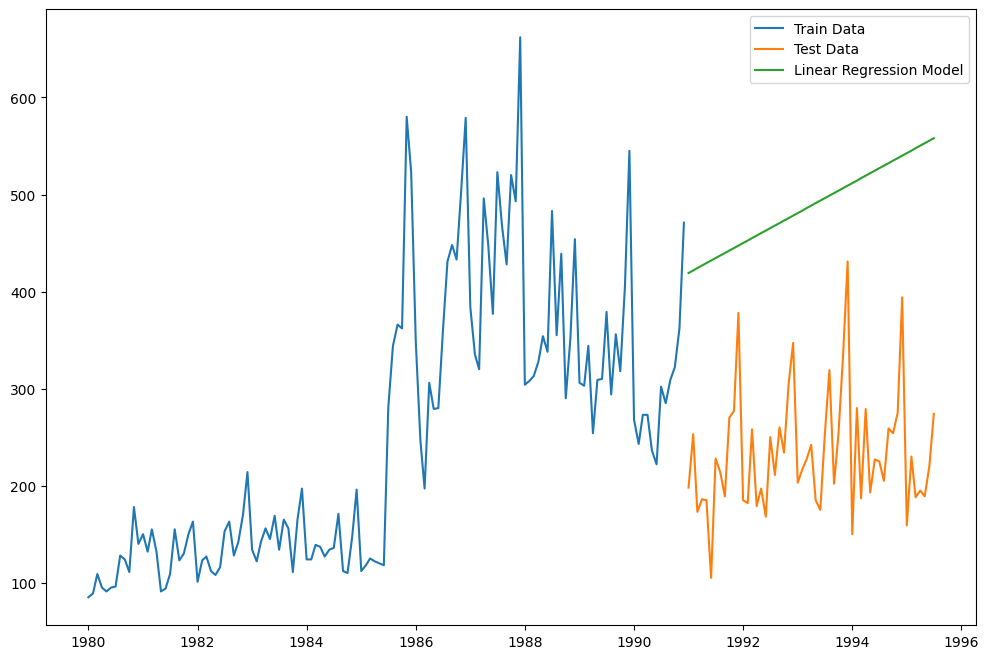

In [43]:
LinearRegression_train = train1.copy()
LinearRegression_test = test1.copy()
train_time = [i+1 for i in range(len(LinearRegression_train))]
test_time = [i+len(LinearRegression_train) for i in range(len(LinearRegression_test))]
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

liner_reg = LinearRegression().fit(LinearRegression_train[['time']], LinearRegression_train['Shoe_Sales']) # Complete the code to fit the linear regression model
prediction1 = liner_reg.predict(LinearRegression_test[['time']])  # Complete the code to make predictions
LinearRegression_test['predicted']  =prediction1
rmse1 = mean_squared_error(LinearRegression_test['Shoe_Sales'], prediction1, squared=False) # Complete the code to find the RMSE
df_rmse1 = pd.DataFrame({'RMSE': rmse1}
                        ,index=['Linear Regression Model'])


plt.plot(train1.index, train1['Shoe_Sales'], label='Train Data')
plt.plot(test1.index, test1['Shoe_Sales'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.legend(loc='best')
plt.show()


In [44]:
df_rmse1

RMSE
Linear Regression Model  263.790974

#### Moving Average Model

In [47]:
# Assuming 'train1' and 'test1' are DataFrames with a 'Sales' column

# Concatenate train and test data
MovingAverage = pd.concat([train1, test1]).copy()

# Complete the code to build a 2-point moving average model
MovingAverage['Trailing_2'] = MovingAverage['Shoe_Sales'].rolling(window=2).mean().shift(1)

# Extract the test portion for evaluation
trailing_MovingAverage_test = MovingAverage.loc[test1.index]

# Drop NaN values resulting from shifting
valid_idx = trailing_MovingAverage_test['Trailing_2'].notna()

# Complete the code to find the RMSE
from sklearn.metrics import mean_squared_error
rmse3 = mean_squared_error(
    trailing_MovingAverage_test.loc[valid_idx, 'Shoe_Sales'],
    trailing_MovingAverage_test.loc[valid_idx, 'Trailing_2'],
    squared=False
)

# Create a DataFrame to display RMSE
df_rmse3 = pd.DataFrame({'RMSE': rmse3}, index=['Moving Average (2) Model'])



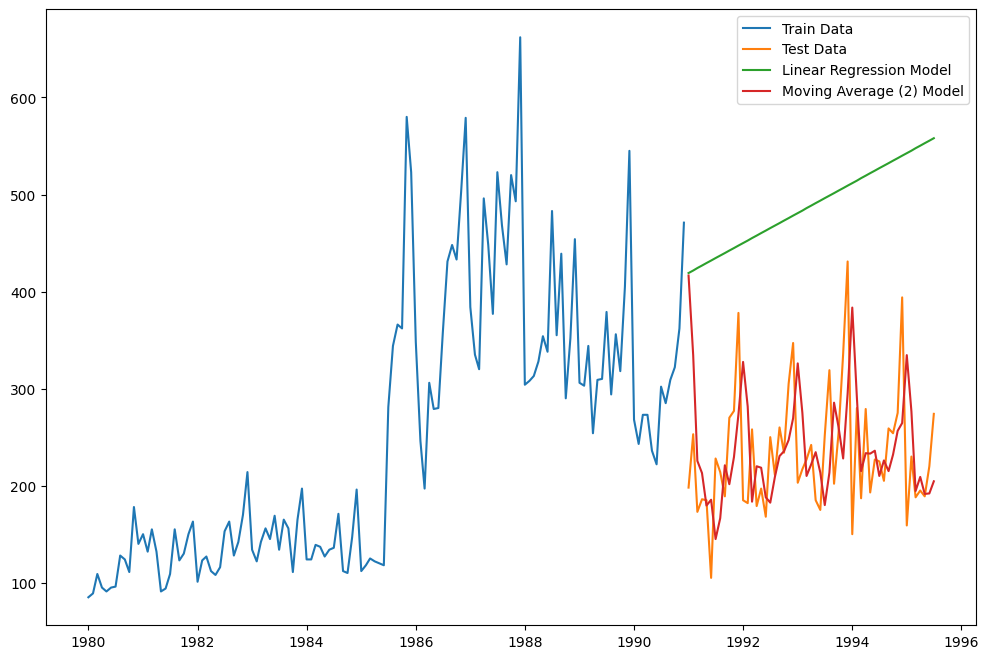

In [52]:

plt.plot(train1.index, train1['Shoe_Sales'], label = 'Train Data')
plt.plot(test1.index, test1['Shoe_Sales'], label = 'Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label = 'Linear Regression Model') #Complete the code to plot the predictions
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label = 'Moving Average (2) Model') #Complete the code to plot the predictions

plt.legend(loc = 'best')
plt.show()

In [67]:
df_rmse3

RMSE
Moving Average (2) Model  78.660606

#### Simple Exponential Model

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


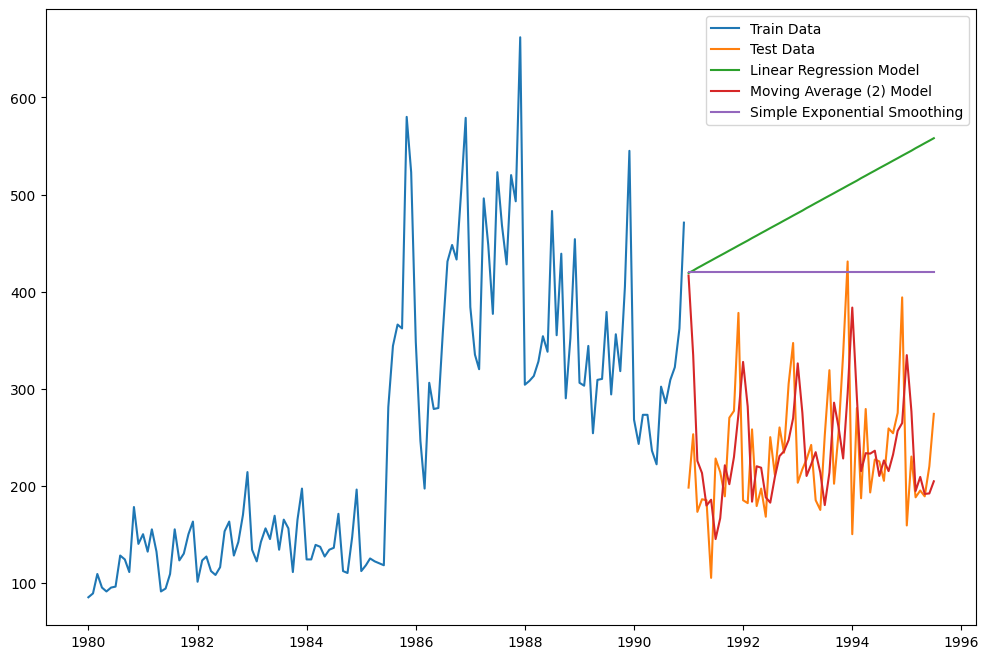

In [74]:
simple_exponential_smoothing = ExponentialSmoothing(train1['Shoe_Sales'],# trend='additive',seasonal='additive',
                                                    #trend='additive',seasonal='additive',
                                                    initialization_method='estimated').fit(optimized=True)
prediction4 = simple_exponential_smoothing.forecast(steps=len(test1))
rmse4 = mean_squared_error(test1['Shoe_Sales'], prediction4, squared=False)
var4 = 'Single Exp. Smoothing Model: Level '+ str(np.round(simple_exponential_smoothing.params['smoothing_level'],2))

df_rmse4 = pd.DataFrame({'RMSE': rmse4}
                        ,index=[var4])

plt.plot(train1.index, train1['Shoe_Sales'], label = 'Train Data')
plt.plot(test1.index, test1['Shoe_Sales'], label = 'Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label = 'Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'],label = 'Moving Average (2) Model')
plt.plot(test1.index, prediction4, label = 'Simple Exponential Smoothing')

plt.legend(loc = 'best')
plt.show()

In [75]:
df_rmse4

RMSE
Single Exp. Smoothing Model: Level 0.61  196.404837

#### Double Exponential Model

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


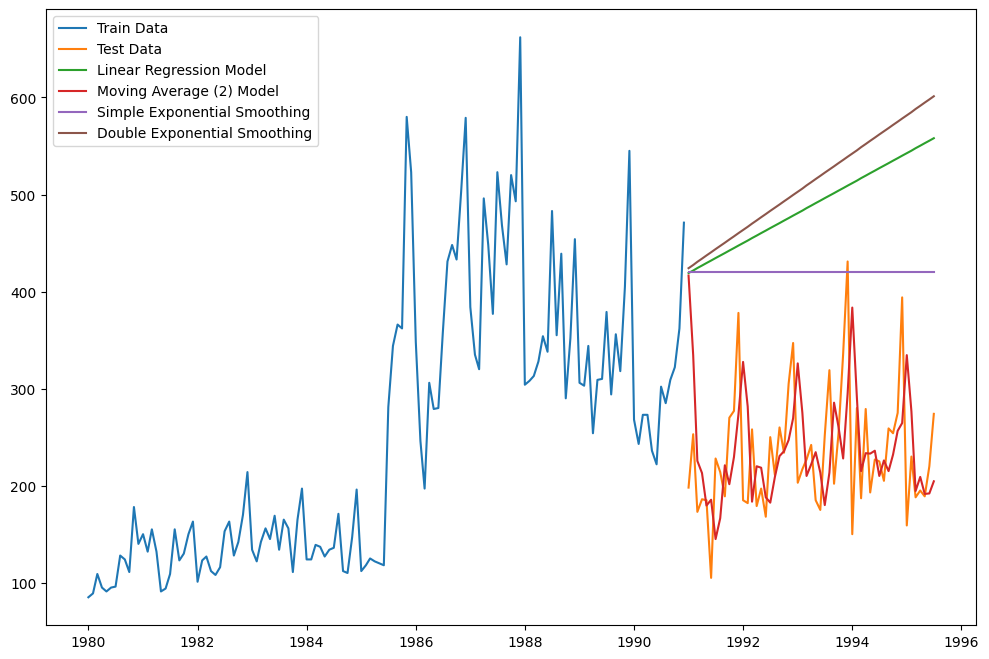

In [78]:
double_exponential_smoothing = ExponentialSmoothing(train1['Shoe_Sales'], trend='additive', seasonal=None,
                                                    initialization_method='estimated').fit(optimized=True)
prediction5 = double_exponential_smoothing.forecast(steps=len(test1))
rmse5 = mean_squared_error(test1['Shoe_Sales'], prediction5, squared=False)
var5 = 'Double Exp Smoothing Model: Level '+ str(np.round(double_exponential_smoothing.params['smoothing_level'],2)) + ' ,Trend'+ str(np.round(double_exponential_smoothing.params['smoothing_trend'],2))
df_rmse5 = pd.DataFrame({'RMSE': rmse5}, index=[var5])

plt.plot(train1.index, train1['Shoe_Sales'], label='Train Data')
plt.plot(test1.index, test1['Shoe_Sales'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')
plt.plot(test1.index, prediction4, label='Simple Exponential Smoothing')
plt.plot(test1.index, prediction5, label='Double Exponential Smoothing')

plt.legend(loc='best')
plt.show()

In [77]:
df_rmse5

RMSE
Double Exp Smoothing Model: Level 0.59 ,Trend0.0  288.576717

#### Triple Exponential Model

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


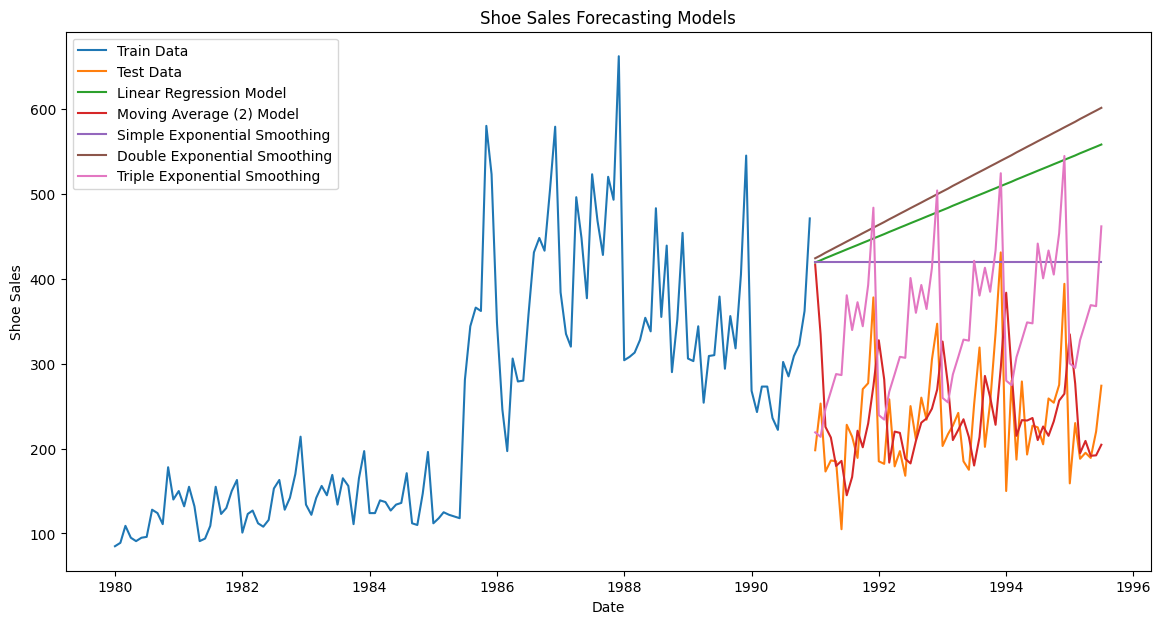

In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

triple_exponential_smoothing = ExponentialSmoothing(train1['Shoe_Sales'], trend='additive', seasonal='additive',
                                                    initialization_method='estimated').fit(optimized=True)
prediction6 = triple_exponential_smoothing.forecast(steps=len(test1))
rmse6 = mean_squared_error(test1['Shoe_Sales'], prediction6, squared=False)
var6 = 'Triple Exp Smoothing Model: Level '+ str(np.round(triple_exponential_smoothing.params['smoothing_level'],2)) + ' ,Trend '+ str(np.round(triple_exponential_smoothing.params['smoothing_trend'],2)) + ' ,Seasonality '+ str(np.round(triple_exponential_smoothing.params['smoothing_seasonal'],2))
df_rmse6 = pd.DataFrame({'RMSE': rmse6}, index=[var6])

plt.figure(figsize=(14,7))
plt.plot(train1.index, train1['Shoe_Sales'], label='Train Data')
plt.plot(test1.index, test1['Shoe_Sales'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')
plt.plot(test1.index, prediction4, label='Simple Exponential Smoothing')
plt.plot(test1.index, prediction5, label='Double Exponential Smoothing')
plt.plot(test1.index, prediction6, label='Triple Exponential Smoothing')

plt.legend(loc='best')
plt.title('Shoe Sales Forecasting Models')
plt.xlabel('Date')
plt.ylabel('Shoe Sales')
plt.show()


In [73]:
df_rmse6

RMSE
Triple Exp Smoothing Model: Level 0.57 ,Trend 0...  128.992526

In [79]:
df_rmse =pd.concat([df_rmse1,df_rmse3,df_rmse4,df_rmse5,df_rmse6])
df_rmse.sort_values('RMSE')

RMSE
Moving Average (2) Model                             78.660606
Triple Exp Smoothing Model: Level 0.57 ,Trend 0...  128.992526
Single Exp. Smoothing Model: Level 0.61             196.404837
Linear Regression Model                             263.790974
Double Exp Smoothing Model: Level 0.59 ,Trend0.0    288.576717

#### Tuned Exponential Model

In [81]:

model_T = ExponentialSmoothing(train1['Shoe_Sales'], trend='additive', seasonal='additive')

# Fit the model with automatic parameter optimization
model_T_autofit = model_T.fit(optimized=True)

# Print the model parameters
print(model_T_autofit.params)

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999997, 'initial_trend': 1.6939393939394036, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
## Prediction on the test data

test1['auto_predict'] = model_T_autofit.forecast(steps = len(test1)) # Complete the code to forecast the model
test1.head()

YearMonth  Shoe_Sales  auto_predict
YearMonth                                     
1991-01-01   1991-01         198    219.083658
1991-02-01   1991-02         253    213.816321
1991-03-01   1991-03         173    246.658224
1991-04-01   1991-04         186    267.260236
1991-05-01   1991-05         185    287.719744

In [83]:
## First we will define an empty dataframe to store our values from the loop

resultsDf = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'RMSE': []})
resultsDf

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, RMSE]
Index: []

In [85]:
# First we will define an empty list to store our values from the loop
results_list = []

# Define the range for each parameter
alpha_range = np.arange(0.1, 1.0, 0.1)
beta_range = np.arange(0.0, 1.0, 0.1)
gamma_range = np.arange(0.0, 1.0, 0.1)

for i in alpha_range:
    for j in beta_range:
        for k in gamma_range:
            model_T_alpha_i_j_k = model_T.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False)
            train1[('predict', i, j, k)] = model_T_alpha_i_j_k.fittedvalues
            test1[('predict', i, j, k)] = model_T_alpha_i_j_k.forecast(steps=len(test1))

            rmse_model8_test = mean_squared_error(test1['Shoe_Sales'], test1[('predict', i, j, k)], squared=False)

            results_list.append({'Alpha Values':i, 'Beta Values':j, 'Gamma Values':k, 'RMSE':rmse_model8_test})

# Convert the list of results to a DataFrame
resultsDf = pd.DataFrame(results_list)


In [86]:
T=resultsDf.sort_values(by=['RMSE']).head()
T

Alpha Values  Beta Values  Gamma Values       RMSE
65            0.1          0.6           0.5  45.832046
143           0.2          0.4           0.3  48.352804
172           0.2          0.7           0.2  48.354132
132           0.2          0.3           0.2  48.579173
135           0.2          0.3           0.5  49.058757

In [87]:
# Best parameters from the grid search
best_alpha = 0.1
best_beta = 0.6
best_gamma = 0.5

# Fit the best model
best_model = ExponentialSmoothing(train1['Shoe_Sales'], 
                                  trend='additive', 
                                  seasonal='additive').fit(smoothing_level=best_alpha, 
                                                           smoothing_trend=best_beta, 
                                                           smoothing_seasonal=best_gamma, 
                                                           optimized=False)

# Generate predictions for both train and test periods
train_predictions = best_model.fittedvalues
test_predictions = best_model.forecast(steps=len(test1))

# Combine train and test predictions
all_predictions = pd.concat([train_predictions, test_predictions])



/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


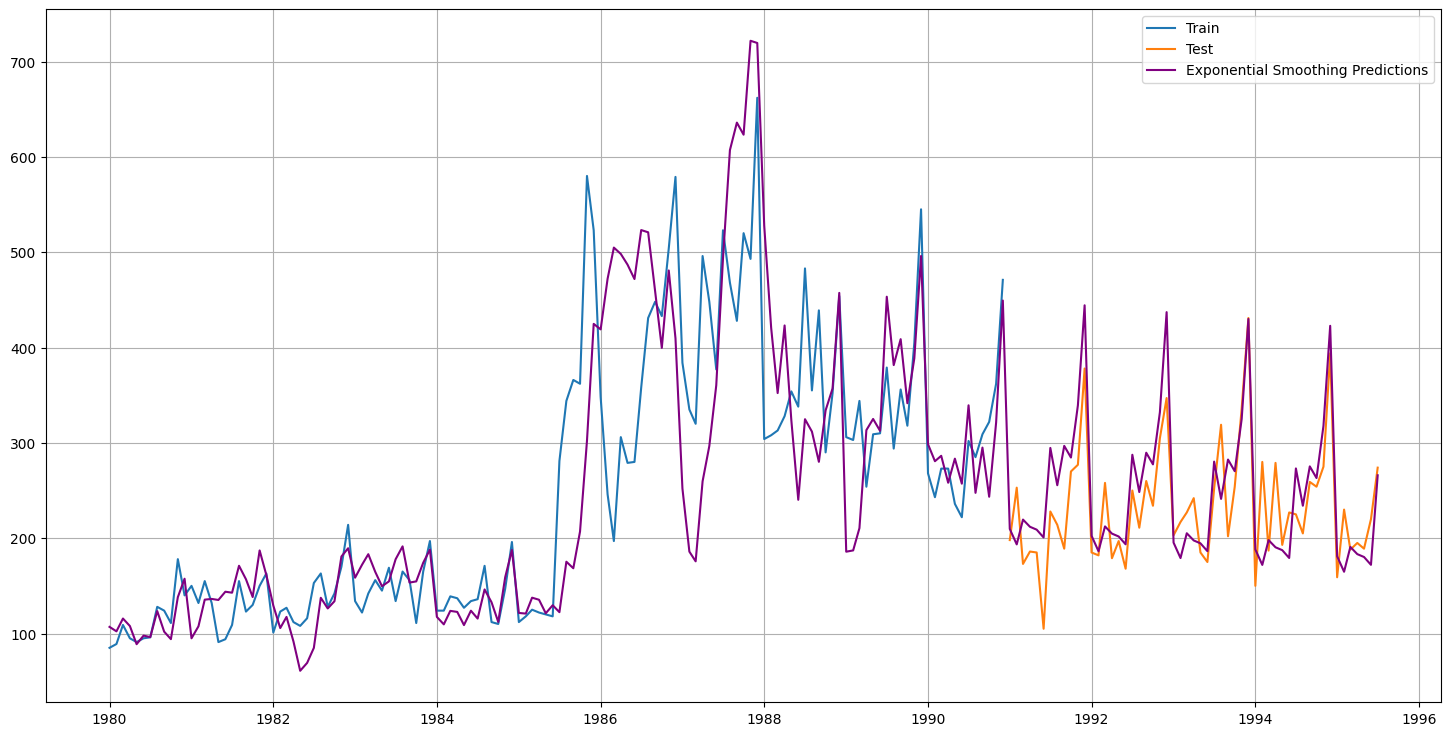

In [88]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(train1['Shoe_Sales'], label='Train')
plt.plot(test1['Shoe_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(all_predictions, label='Exponential Smoothing Predictions', color='purple')

plt.legend(loc='best')
plt.grid();

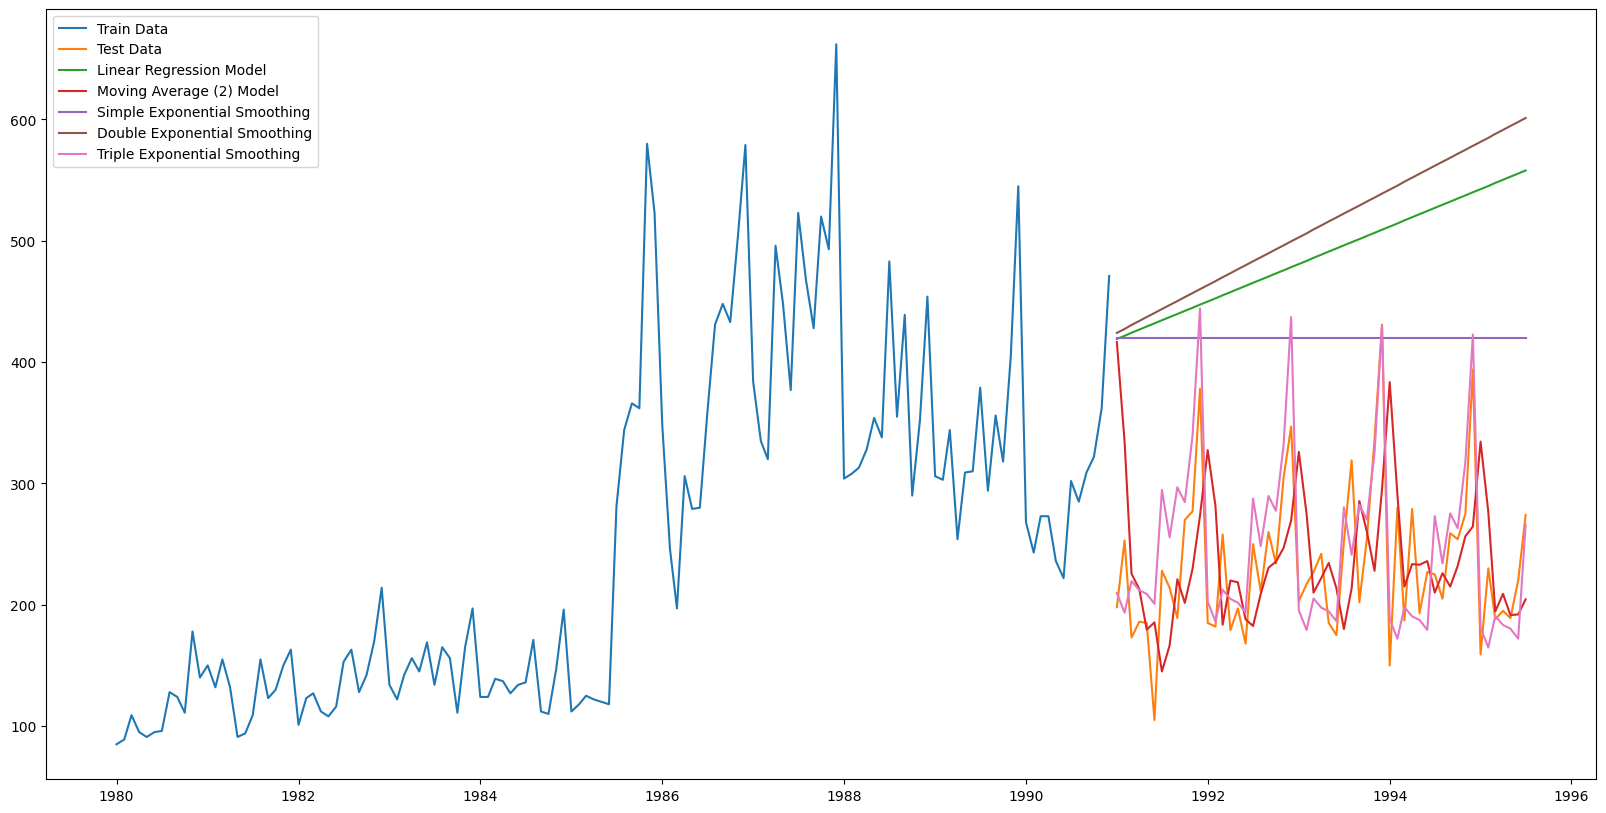

In [91]:
plt.figure(figsize=(20, 10))
plt.plot(train1.index, train1['Shoe_Sales'], label='Train Data')
plt.plot(test1.index, test1['Shoe_Sales'], label='Test Data')

# Plot Linear Regression Model predictions
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')

# Plot Moving Average (2) Model predictions
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')

# Plot Simple Exponential Smoothing predictions
plt.plot(test1.index, prediction4, label='Simple Exponential Smoothing')

# Plot Double Exponential Smoothing predictions
plt.plot(test1.index, prediction5, label='Double Exponential Smoothing')

# Plot Triple Exponential Smoothing predictions (using the tuned model)
plt.plot(test1.index, test_predictions, label='Triple Exponential Smoothing')

plt.legend(loc='best')
plt.show()

In [92]:
T_rmse=T[0:1]

In [93]:
df_rmse_od1=pd.concat([df_rmse,T_rmse])
df_rmse_od1.sort_values('RMSE')

RMSE  Alpha Values  \
65                                                   45.832046           0.1   
Moving Average (2) Model                             78.660606           NaN   
Triple Exp Smoothing Model: Level 0.57 ,Trend 0...  128.992526           NaN   
Single Exp. Smoothing Model: Level 0.61             196.404837           NaN   
Linear Regression Model                             263.790974           NaN   
Double Exp Smoothing Model: Level 0.59 ,Trend0.0    288.576717           NaN   

                                                    Beta Values  Gamma Values  
65                                                          0.6           0.5  
Moving Average (2) Model                                    NaN           NaN  
Triple Exp Smoothing Model: Level 0.57 ,Trend 0...          NaN           NaN  
Single Exp. Smoothing Model: Level 0.61                     NaN           NaN  
Linear Regression Model                                     NaN           NaN  
Double Exp Smoothing Model: Level 0.59 ,Trend0.0            NaN           NaN

### Soft Drinks

#### Linear Regression

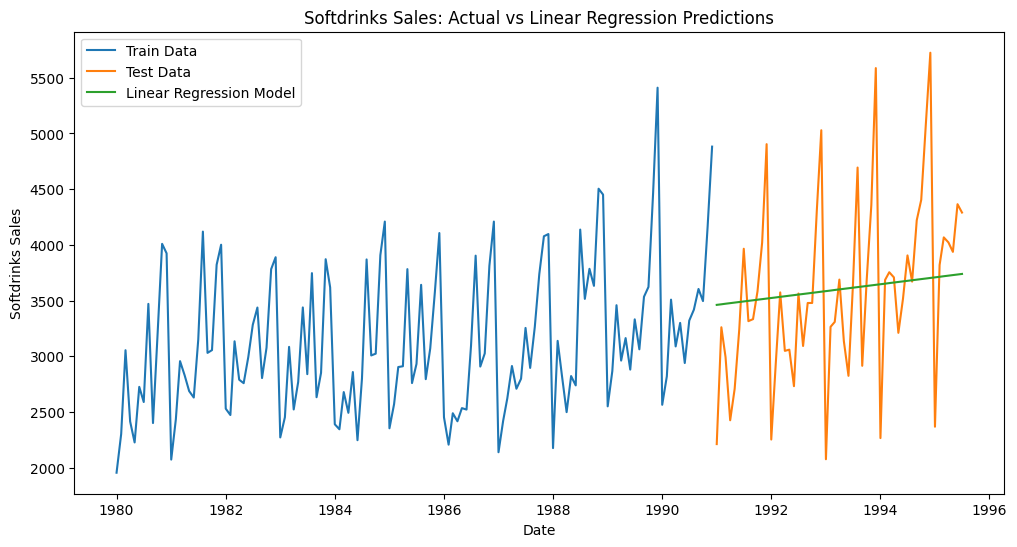

                               RMSE
Linear Regression Model  775.757118


In [99]:
# Assuming train2 and test2 are already defined
LinearRegression_train = train2.copy()
LinearRegression_test = test2.copy()
train_time = [i+1 for i in range(len(LinearRegression_train))]
test_time = [i+len(LinearRegression_train) for i in range(len(LinearRegression_test))]
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

# Fit the linear regression model
liner_reg = LinearRegression().fit(LinearRegression_train[['time']], LinearRegression_train['Softdrinks'])

# Make predictions
prediction1 = liner_reg.predict(LinearRegression_test[['time']])
LinearRegression_test['predicted'] = prediction1

# Calculate RMSE
rmse1 = mean_squared_error(LinearRegression_test['Softdrinks'], LinearRegression_test['predicted'], squared=False)
df_rmse1 = pd.DataFrame({'RMSE': rmse1}, index=['Linear Regression Model'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train2.index, train2['Softdrinks'], label='Train Data')
plt.plot(test2.index, test2['Softdrinks'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')

plt.legend(loc='best')
plt.title('Softdrinks Sales: Actual vs Linear Regression Predictions')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.show()

print(df_rmse1)

In [100]:
df_rmse1

RMSE
Linear Regression Model  775.757118

#### Moving Average

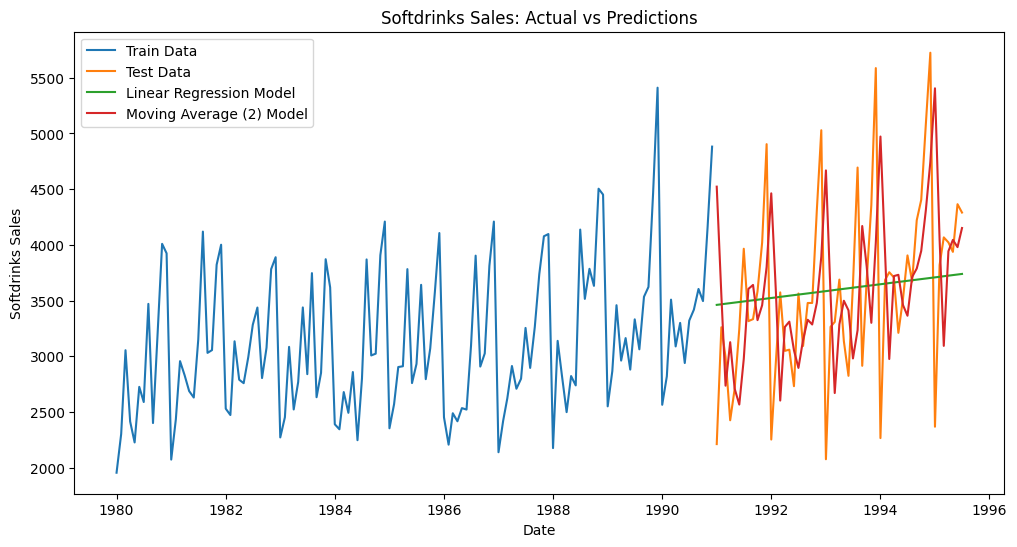

In [104]:
MovingAverage = pd.concat([train2, test2]).copy()
MovingAverage['Trailing_2'] = MovingAverage['Softdrinks'].rolling(window=2).mean().shift(1)
trailing_MovingAverage_test = MovingAverage[len(train2):]

# Remove NaN values that result from the shift operation
valid_idx = trailing_MovingAverage_test['Trailing_2'].notna()

rmse3 = mean_squared_error(trailing_MovingAverage_test.loc[valid_idx, 'Softdrinks'], 
                           trailing_MovingAverage_test.loc[valid_idx, 'Trailing_2'], 
                           squared=False)
df_rmse3 = pd.DataFrame({'RMSE': rmse3}, index=['Moving Average (2) Model'])

plt.figure(figsize=(12, 6))
plt.plot(train2.index, train2['Softdrinks'], label='Train Data')
plt.plot(test2.index, test2['Softdrinks'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')

plt.legend(loc='best')
plt.title('Softdrinks Sales: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.show()



In [105]:
df_rmse3

RMSE
Moving Average (2) Model  996.779665

#### Simple Exponential Model

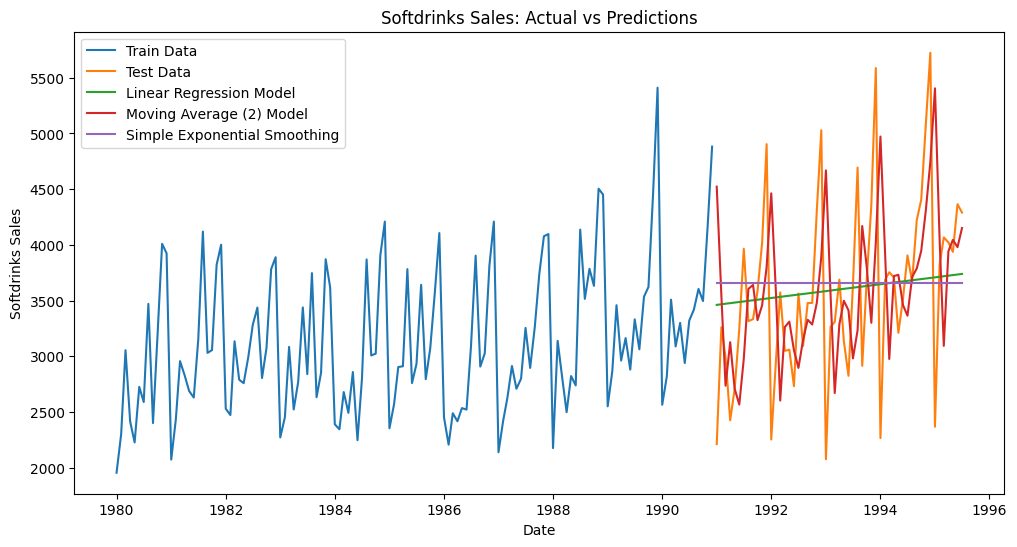

In [106]:
simple_exponential_smoothing = ExponentialSmoothing(train2['Softdrinks'],
                                                    trend=None, seasonal=None,
                                                    initialization_method='estimated').fit(optimized=True)
prediction4 = simple_exponential_smoothing.forecast(steps=len(test2))
rmse4 = mean_squared_error(test2['Softdrinks'], prediction4, squared=False)
var4 = 'Single Exp. Smoothing Model: Level '+ str(np.round(simple_exponential_smoothing.params['smoothing_level'],2))
df_rmse4 = pd.DataFrame({'RMSE': rmse4}, index=[var4])

plt.figure(figsize=(12, 6))
plt.plot(train2.index, train2['Softdrinks'], label='Train Data')
plt.plot(test2.index, test2['Softdrinks'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')
plt.plot(test2.index, prediction4, label='Simple Exponential Smoothing')

plt.legend(loc='best')
plt.title('Softdrinks Sales: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.show()

In [109]:
df_rmse4

RMSE
Single Exp. Smoothing Model: Level 0.12  809.488077

#### Double Exponential Model

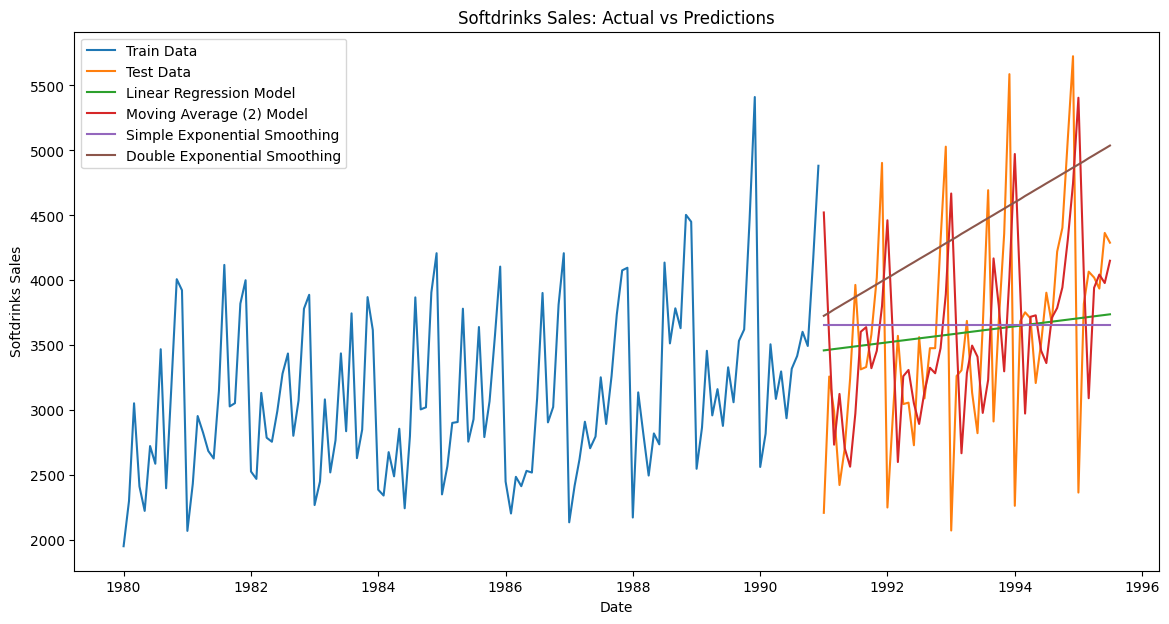

In [107]:
double_exponential_smoothing = ExponentialSmoothing(train2['Softdrinks'], trend='additive',
                                                    initialization_method='estimated').fit(optimized=True)
prediction5 = double_exponential_smoothing.forecast(steps=len(test2))
rmse5 = mean_squared_error(test2['Softdrinks'], prediction5, squared=False)
var5 = 'Double Exp Smoothing Model: Level '+ str(np.round(double_exponential_smoothing.params['smoothing_level'],2)) + ' ,Trend '+ str(np.round(double_exponential_smoothing.params['smoothing_trend'],2))
df_rmse5 = pd.DataFrame({'RMSE': rmse5}, index=[var5])

plt.figure(figsize=(14, 7))
plt.plot(train2.index, train2['Softdrinks'], label='Train Data')
plt.plot(test2.index, test2['Softdrinks'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')
plt.plot(test2.index, prediction4, label='Simple Exponential Smoothing')
plt.plot(test2.index, prediction5, label='Double Exponential Smoothing')

plt.legend(loc='best')
plt.title('Softdrinks Sales: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.show()

In [108]:
df_rmse5

RMSE
Double Exp Smoothing Model: Level 0.12 ,Trend 0.11  1074.329653

#### Triple Exponential Model

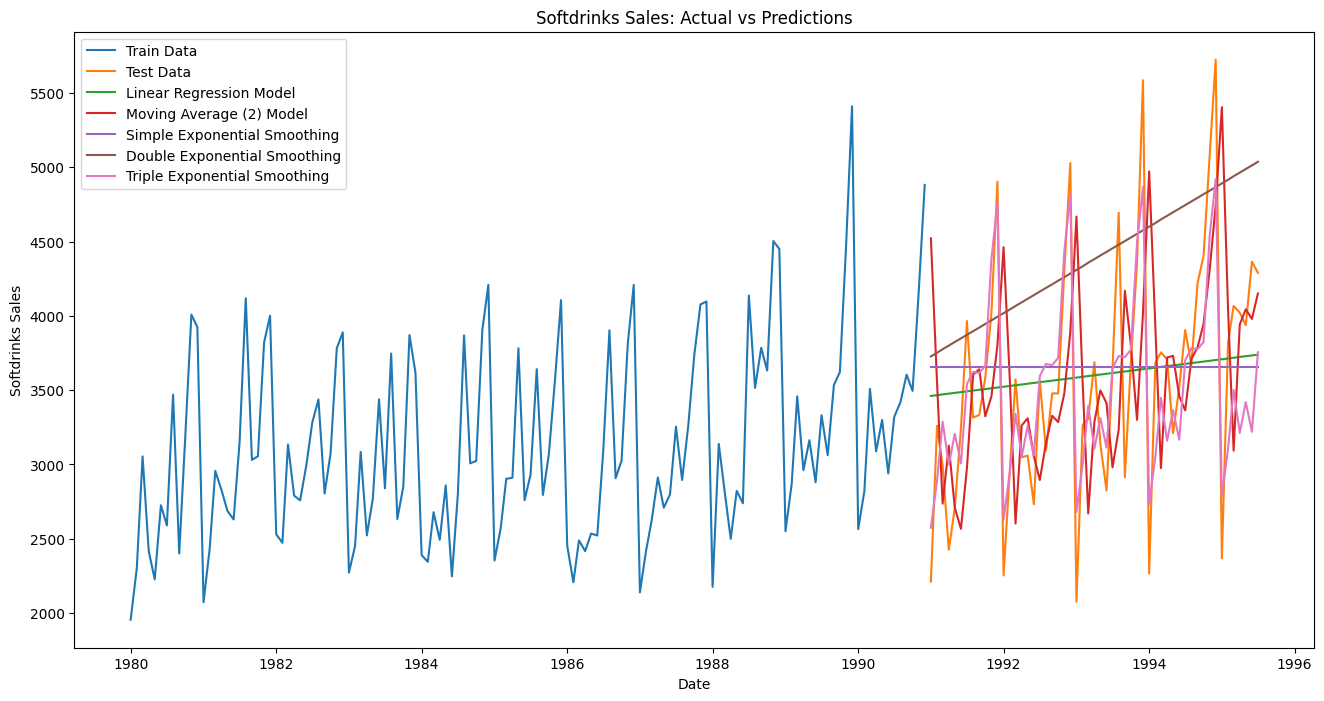

In [110]:
triple_exponential_smoothing = ExponentialSmoothing(train2['Softdrinks'], trend='additive', seasonal='additive',
                                                    initialization_method='estimated').fit(optimized=True)
prediction6 = triple_exponential_smoothing.forecast(steps=len(test2))
rmse6 = mean_squared_error(test2['Softdrinks'], prediction6, squared=False)
var6 = ('Triple Exp Smoothing Model: Level '+ str(np.round(triple_exponential_smoothing.params['smoothing_level'],2)) + 
        ' ,Trend '+ str(np.round(triple_exponential_smoothing.params['smoothing_trend'],2)) + 
        ' ,Seasonality '+ str(np.round(triple_exponential_smoothing.params['smoothing_seasonal'],2)))
df_rmse6 = pd.DataFrame({'RMSE': rmse6}, index=[var6])

plt.figure(figsize=(16, 8))
plt.plot(train2.index, train2['Softdrinks'], label='Train Data')
plt.plot(test2.index, test2['Softdrinks'], label='Test Data')
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')
plt.plot(test2.index, prediction4, label='Simple Exponential Smoothing')
plt.plot(test2.index, prediction5, label='Double Exponential Smoothing')
plt.plot(test2.index, prediction6, label='Triple Exponential Smoothing')

plt.legend(loc='best')
plt.title('Softdrinks Sales: Actual vs Predictions')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.show()

In [111]:
df_rmse6

RMSE
Triple Exp Smoothing Model: Level 0.15 ,Trend 0...  458.965428

In [112]:
df_rmse =pd.concat([df_rmse1,df_rmse3,df_rmse4,df_rmse5,df_rmse6])
df_rmse.sort_values('RMSE')

RMSE
Triple Exp Smoothing Model: Level 0.15 ,Trend 0...   458.965428
Linear Regression Model                              775.757118
Single Exp. Smoothing Model: Level 0.12              809.488077
Moving Average (2) Model                             996.779665
Double Exp Smoothing Model: Level 0.12 ,Trend 0.11  1074.329653

#### Tuned Exponential Model

In [113]:
# Assuming train2 is already defined and contains 'Softdrinks' column
model_T = ExponentialSmoothing(train2['Softdrinks'], trend='additive', seasonal='additive')
model_T_autofit = model_T.fit()

print("Model Parameters:")
print(model_T_autofit.params)

Model Parameters:
{'smoothing_level': 0.14628214287204402, 'smoothing_trend': 0.03985523474431963, 'smoothing_seasonal': 0.2624197351602548, 'damping_trend': nan, 'initial_level': 2803.2142361111096, 'initial_trend': 7.179013888889202, 'initial_seasons': array([-687.29921528, -582.87225694,  -55.66067361, -365.74142361,
       -253.26750694, -196.41725694,  -32.54775694,  690.31561806,
       -282.20046528,   44.75457639,  867.40424306,  853.53249306]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [114]:
## Prediction on the test data

test1['auto_predict'] = model_T_autofit.forecast(steps=len(test1))

# Display the first few rows of the test data with predictions
print(test1.head())

           YearMonth  Shoe_Sales  auto_predict  (predict, 0.1, 0.0, 0.0)  \
YearMonth                                                                  
1991-01-01   1991-01         198   2573.415521                332.844231   
1991-02-01   1991-02         253   2891.897178                331.673587   
1991-03-01   1991-03         173   3287.593188                348.544610   
1991-04-01   1991-04         186   2999.142518                343.873966   
1991-05-01   1991-05         185   3206.039286                329.401239   

            (predict, 0.1, 0.0, 0.1)  (predict, 0.1, 0.0, 0.2)  \
YearMonth                                                        
1991-01-01                295.622284                275.684014   
1991-02-01                284.778399                260.139952   
1991-03-01                299.476998                275.578102   
1991-04-01                312.128795                290.997173   
1991-05-01                304.262557                287.619379   

    

In [125]:
## First we will define an empty dataframe to store our values from the loop

resultsDf = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'RMSE': []})
resultsDf

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, RMSE]
Index: []

In [123]:
results_list = []
# Define the range for each parameter
alpha_range = np.arange(0.1, 0.3, 0.05)  # Centered around 0.14628214287204402
beta_range = np.arange(0.01, 0.07, 0.01)  # Centered around 0.03985523474431963
gamma_range = np.arange(0.2, 0.4, 0.05)  # Centered around 0.2624197351602548

for i in alpha_range:
    for j in beta_range:
        for k in gamma_range:
            model_T_alpha_i_j_k = model_T.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False)
            train2[('predict', i, j, k)] = model_T_alpha_i_j_k.fittedvalues
            test2[('predict', i, j, k)] = model_T_alpha_i_j_k.forecast(steps=len(test2))
            rmse_model8_test = mean_squared_error(test2['Softdrinks'], test2[('predict', i, j, k)], squared=False)
            results_list.append({'Alpha Values':i, 'Beta Values':j, 'Gamma Values':k, 'RMSE':rmse_model8_test})
        # Convert the list of results to a DataFrame
resultsDf = pd.DataFrame(results_list)


In [124]:
T=resultsDf.sort_values(by=['RMSE']).head()
T

Alpha Values  Beta Values  Gamma Values        RMSE
51          0.20         0.01          0.35  404.376719
75          0.25         0.01          0.35  405.472250
74          0.25         0.01          0.30  408.833027
50          0.20         0.01          0.30  409.621097
27          0.15         0.01          0.35  410.066140

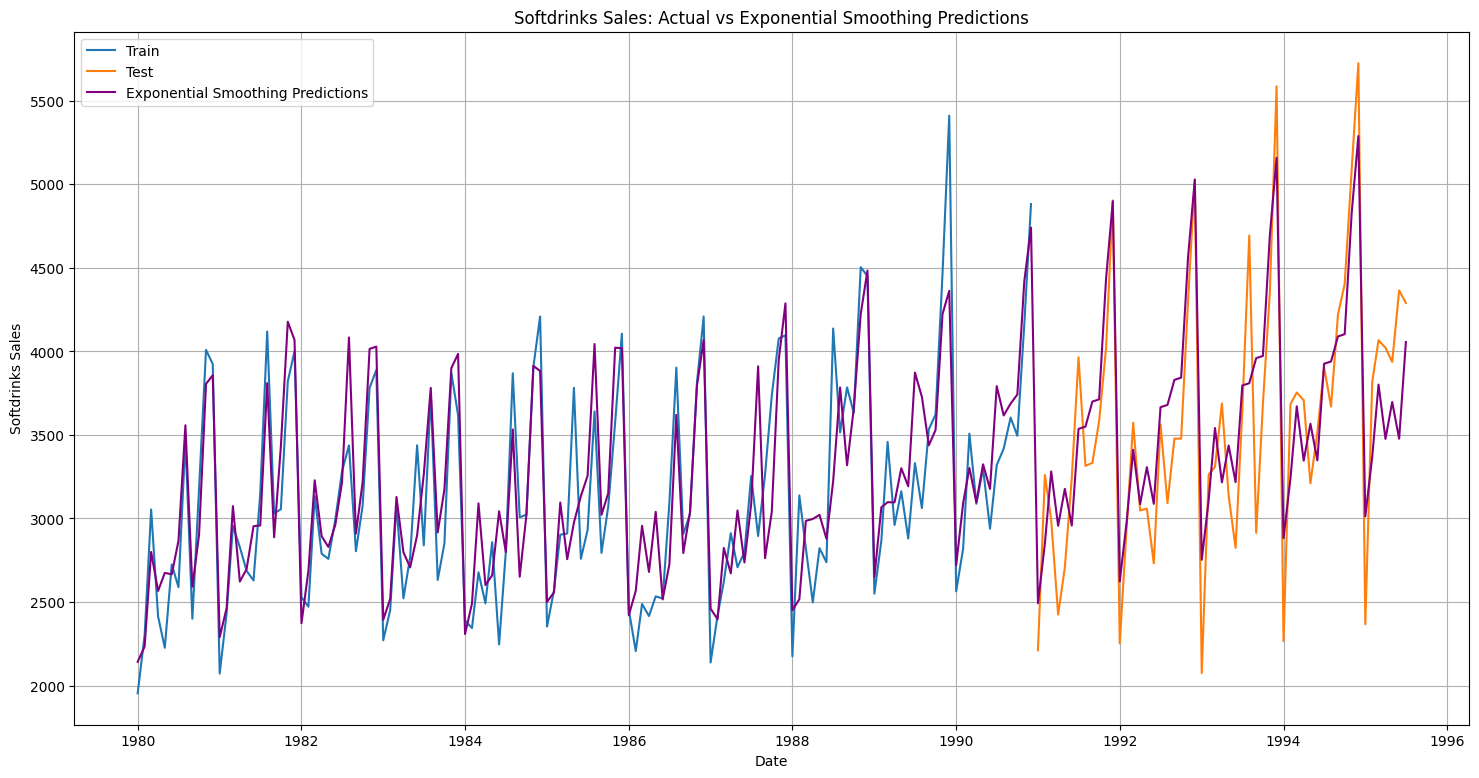

In [126]:
# Best parameters from the grid search
best_alpha = 0.20
best_beta = 0.01
best_gamma = 0.35

# Fit the best model
best_model = ExponentialSmoothing(train2['Softdrinks'], 
                                  trend='additive', 
                                  seasonal='additive').fit(smoothing_level=best_alpha, 
                                                           smoothing_trend=best_beta, 
                                                           smoothing_seasonal=best_gamma, 
                                                           optimized=False)

# Generate predictions for both train and test periods
train_predictions = best_model.fittedvalues
test_predictions = best_model.forecast(steps=len(test2))

# Combine train and test predictions
all_predictions = pd.concat([train_predictions, test_predictions])

plt.figure(figsize=(18,9))
plt.plot(train2['Softdrinks'], label='Train')
plt.plot(test2['Softdrinks'], label='Test')

plt.plot(all_predictions, label='Exponential Smoothing Predictions', color='purple')

plt.legend(loc='best')
plt.grid()
plt.title('Softdrinks Sales: Actual vs Exponential Smoothing Predictions')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.show()


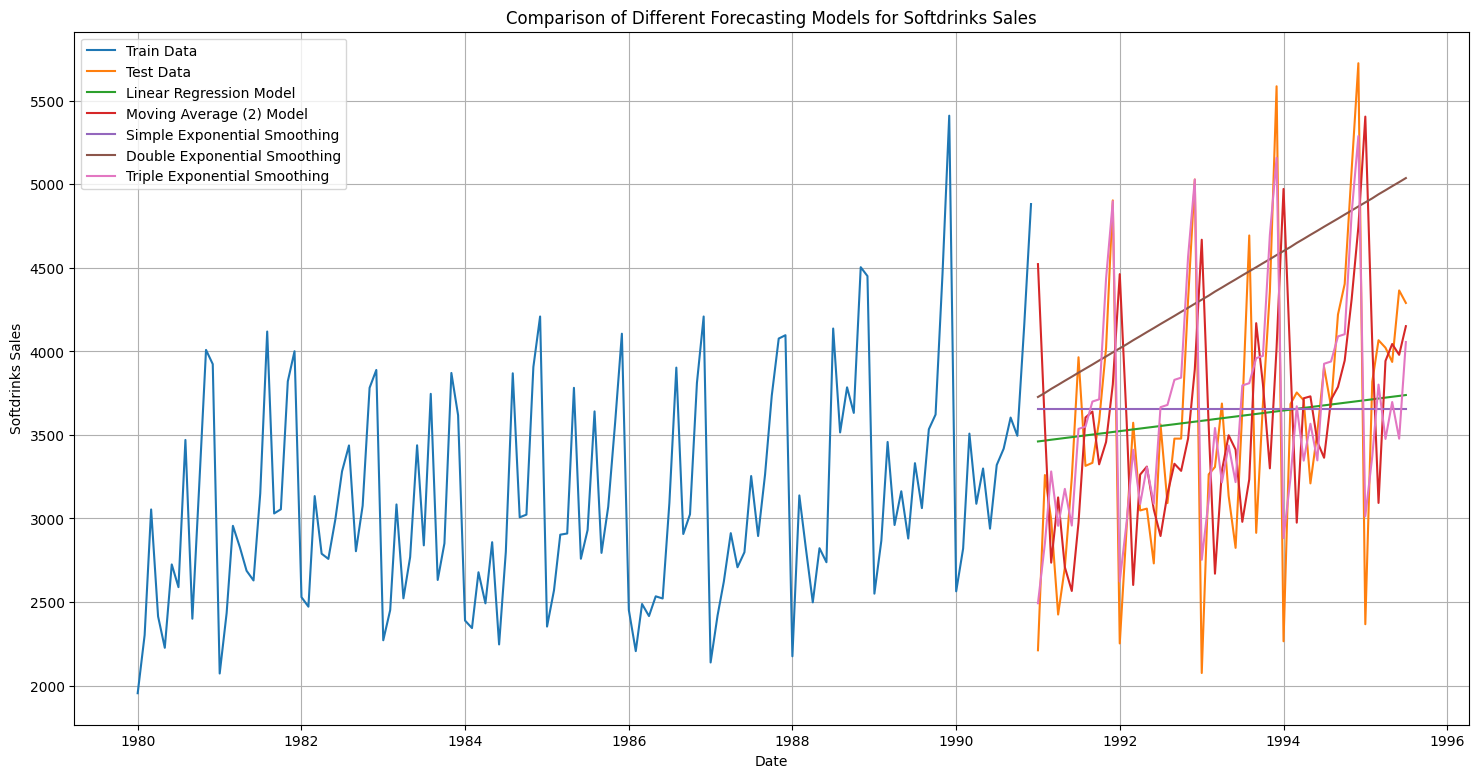

In [128]:
plt.figure(figsize=(18,9))

# Plot original data
plt.plot(train2.index, train2['Softdrinks'], label='Train Data')
plt.plot(test2.index, test2['Softdrinks'], label='Test Data')

# Plot Linear Regression Model predictions
plt.plot(LinearRegression_test.index, LinearRegression_test['predicted'], label='Linear Regression Model')

# Plot Moving Average (2) Model predictions
plt.plot(trailing_MovingAverage_test.index, trailing_MovingAverage_test['Trailing_2'], label='Moving Average (2) Model')

# Plot Simple Exponential Smoothing predictions
plt.plot(test2.index, prediction4, label='Simple Exponential Smoothing')

# Plot Double Exponential Smoothing predictions
plt.plot(test2.index, prediction5, label='Double Exponential Smoothing')

# Plot Triple Exponential Smoothing predictions (using the tuned model)
plt.plot(test2.index, test_predictions, label='Triple Exponential Smoothing')

plt.legend(loc='best')
plt.title('Comparison of Different Forecasting Models for Softdrinks Sales')
plt.xlabel('Date')
plt.ylabel('Softdrinks Sales')
plt.grid(True)
plt.show()

In [129]:
T_rmse=T[0:1]

In [130]:
df_rmse_od2=pd.concat([df_rmse,T_rmse])
df_rmse_od2.sort_values('RMSE')

RMSE  Alpha Values  \
51                                                   404.376719           0.2   
Triple Exp Smoothing Model: Level 0.15 ,Trend 0...   458.965428           NaN   
Linear Regression Model                              775.757118           NaN   
Single Exp. Smoothing Model: Level 0.12              809.488077           NaN   
Moving Average (2) Model                             996.779665           NaN   
Double Exp Smoothing Model: Level 0.12 ,Trend 0.11  1074.329653           NaN   

                                                    Beta Values  Gamma Values  
51                                                         0.01          0.35  
Triple Exp Smoothing Model: Level 0.15 ,Trend 0...          NaN           NaN  
Linear Regression Model                                     NaN           NaN  
Single Exp. Smoothing Model: Level 0.12                     NaN           NaN  
Moving Average (2) Model                                    NaN           NaN  
Double Exp Smoothing Model: Level 0.12 ,Trend 0.11          NaN           NaN

## Stationarity Check

In [133]:
## Test for stationarity of the series - Dicky Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

### Shoes Sales

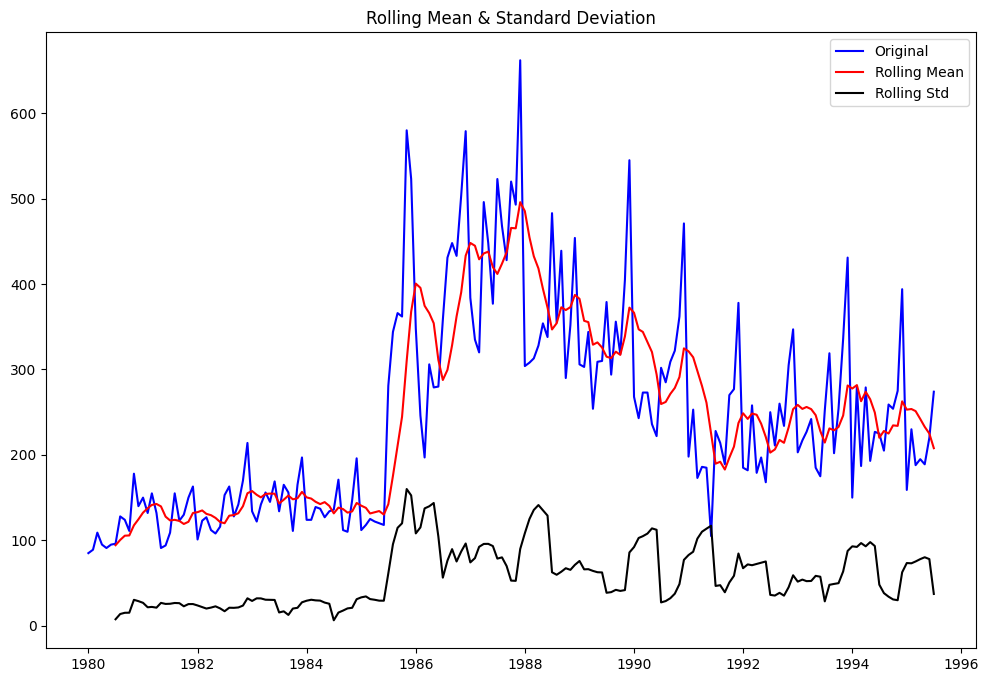

Results of Dickey-Fuller Test:
Test Statistic                  -1.717397
p-value                          0.422172
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [134]:
test_stationarity(df1['Shoe_Sales'])

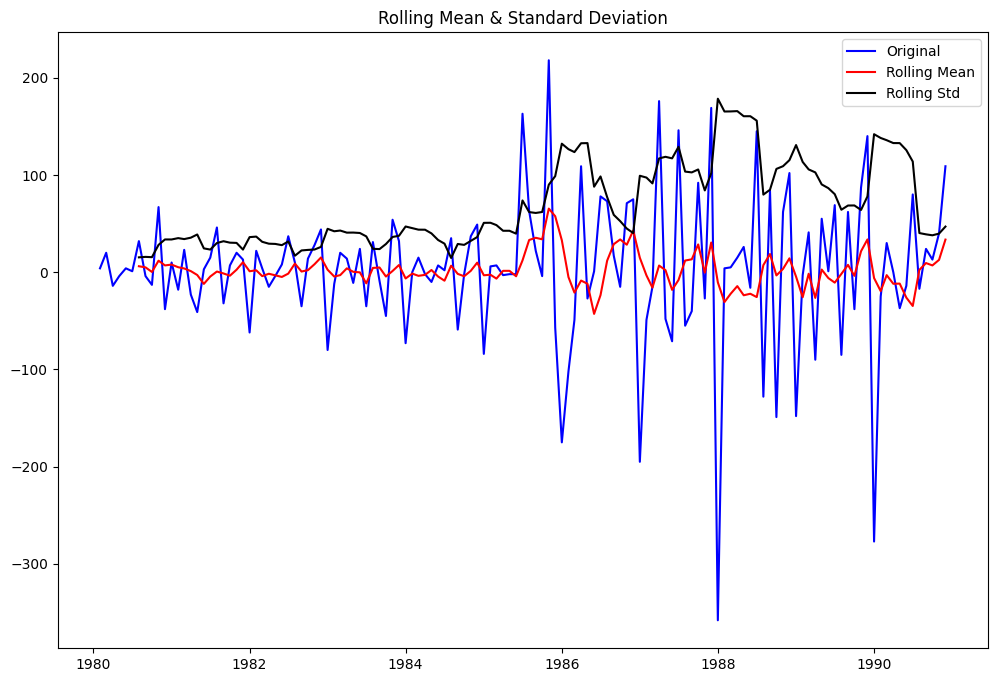

Results of Dickey-Fuller Test:
Test Statistic                  -3.144211
p-value                          0.023450
#Lags Used                      13.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64 



In [135]:
test_stationarity(train_ss['Shoe_Sales'].diff().dropna())

In [139]:
dftest = adfuller(train_ss['Shoe_Sales'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.361
DF test p-value is 0.6008


In [144]:
train_diff = train_ss['Shoe_Sales'].diff(periods=1).dropna()
dftest = adfuller(train_ss['Shoe_Sales'].diff(periods=1).dropna())
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -3.144
DF test p-value is 0.0234


<Axes: xlabel='YearMonth'>

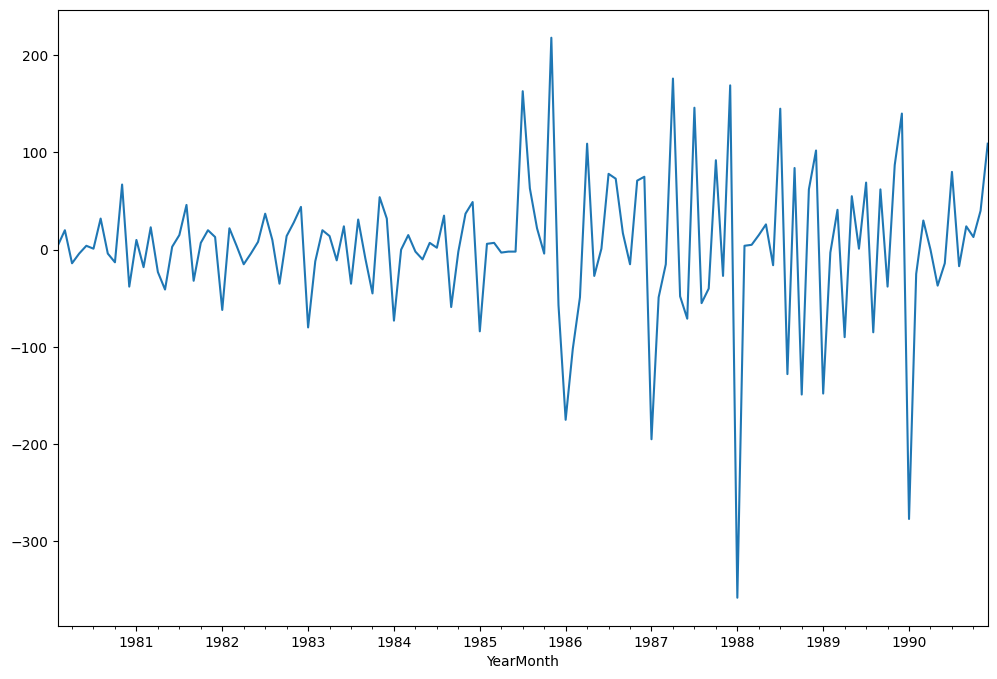

In [146]:
train_diff.plot() # Complete the code to plot the differenced data


### Soft Drinks

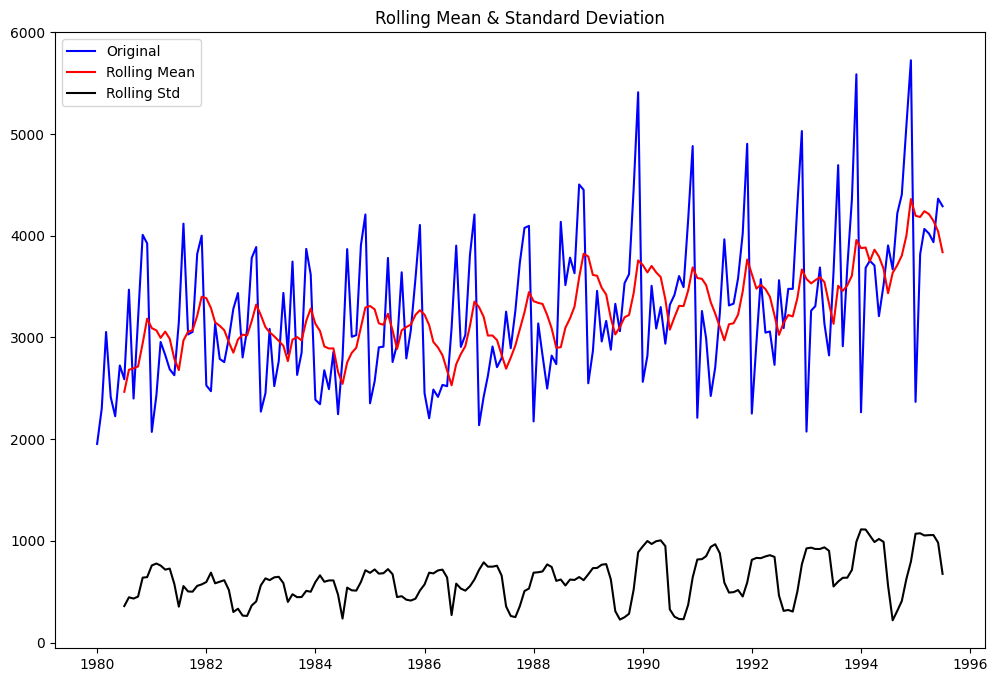

Results of Dickey-Fuller Test:
Test Statistic                   1.098734
p-value                          0.995206
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [149]:
test_stationarity(df2['Softdrinks']) # Complete the code to test teh stationarity on entire data

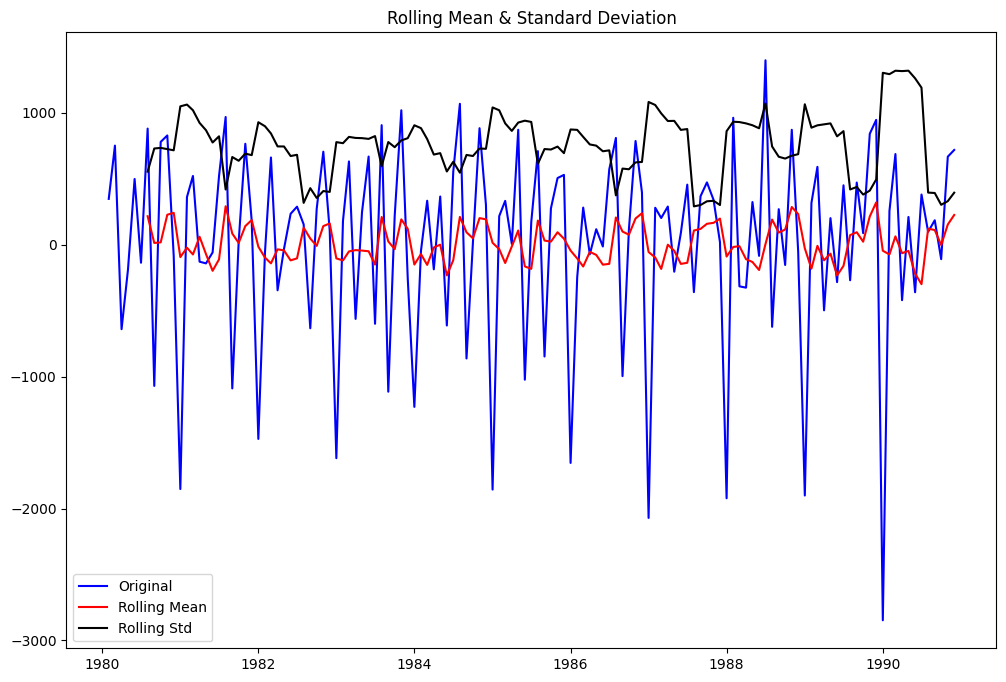

Results of Dickey-Fuller Test:
Test Statistic                -7.299886e+00
p-value                        1.347278e-10
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [153]:
test_stationarity(train_sd['Softdrinks'].diff().dropna()) # Complete the code to test stationarity by performing differencing on train data data

In [154]:
dftest = adfuller(train_sd['Softdrinks']) # Complete the code to run hypothesis test on train data
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -0.990
DF test p-value is 0.7569


In [155]:
train_diff2 = train_sd['Softdrinks'].diff(periods=1).dropna() # Complete the code to perform differencing on train data
dftest = adfuller(train_diff2) # Complete the code to run hypothesis test on differenced data
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -7.300
DF test p-value is 0.0000


<Axes: xlabel='YearMonth'>

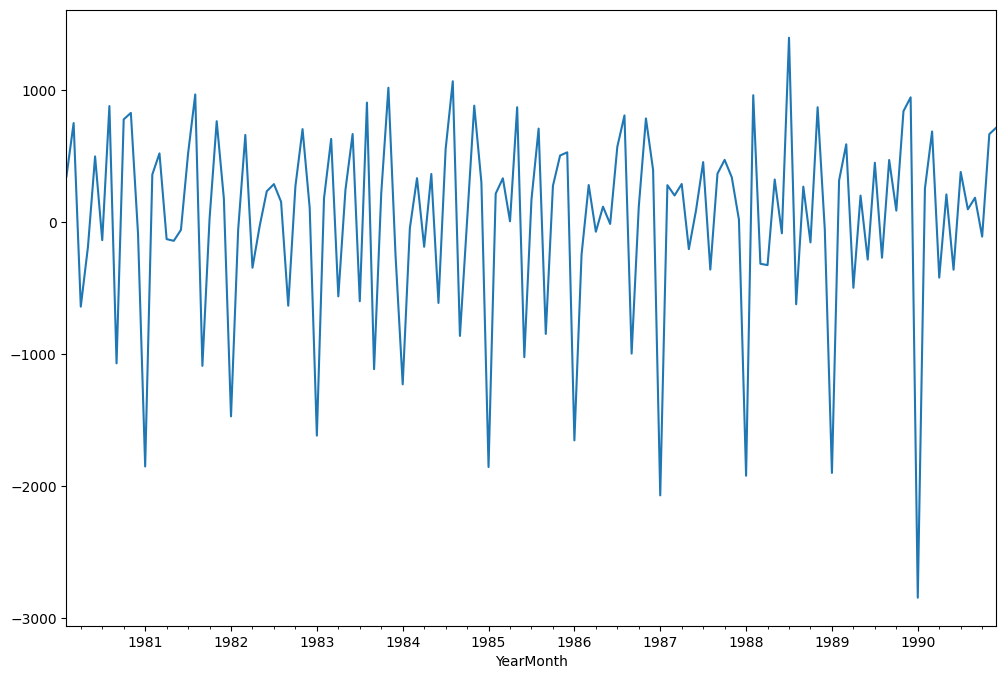

In [156]:
train_diff2.plot() # Complete the code to plot the differenced data


## Check the ACF and PACF Plots

### Shoes Sales

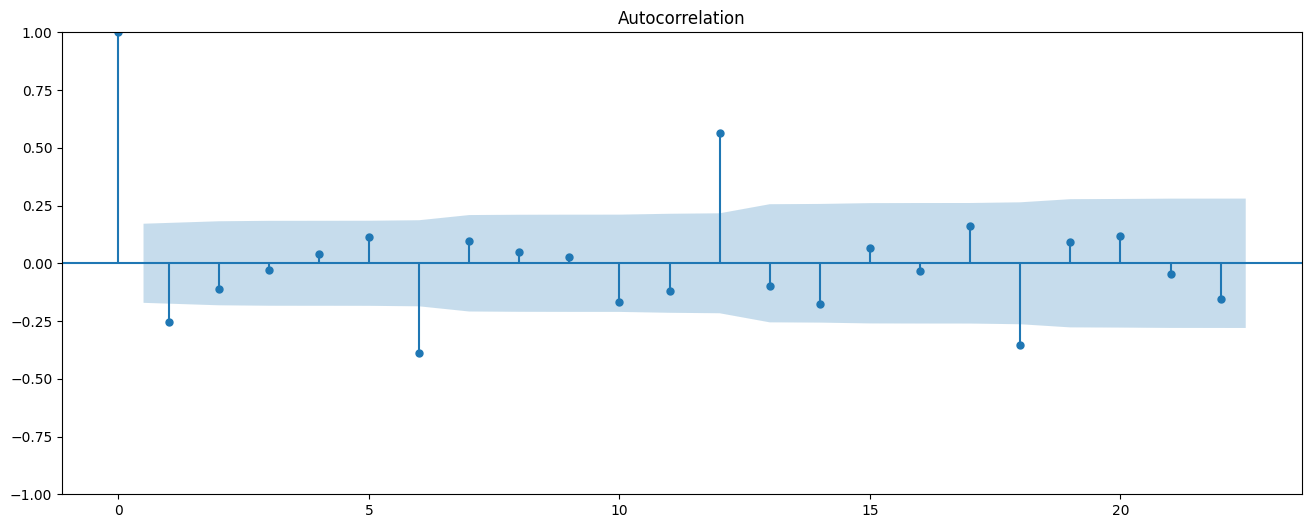

In [159]:
rcParams['figure.figsize'] = 16, 6
plot_acf(train_diff);

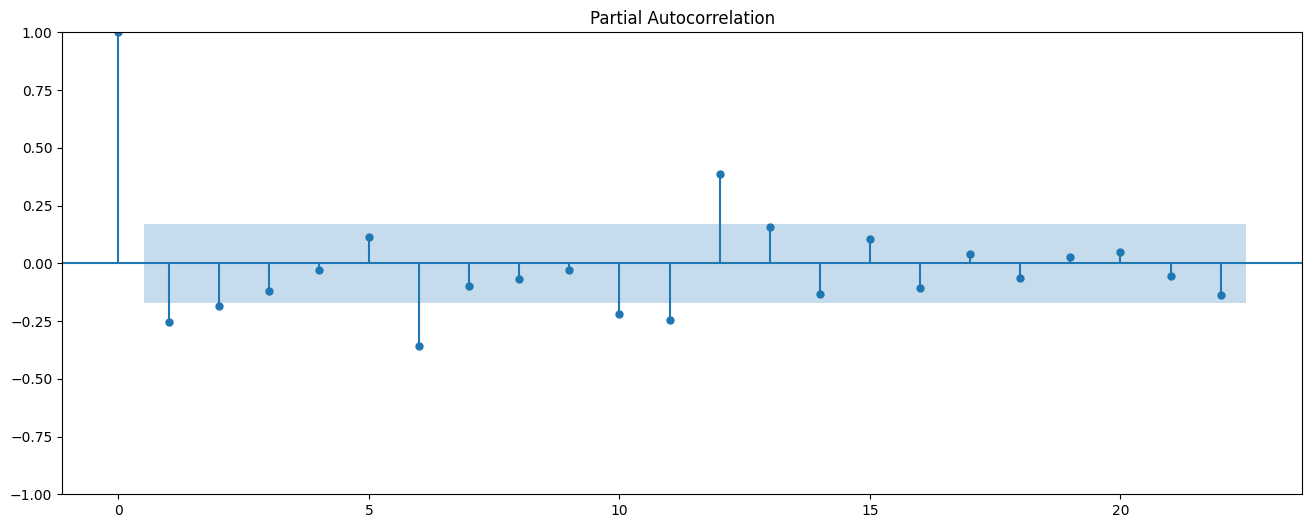

In [163]:
rcParams['figure.figsize'] = 16, 6
plot_pacf(train_diff);

### Soft Drinks

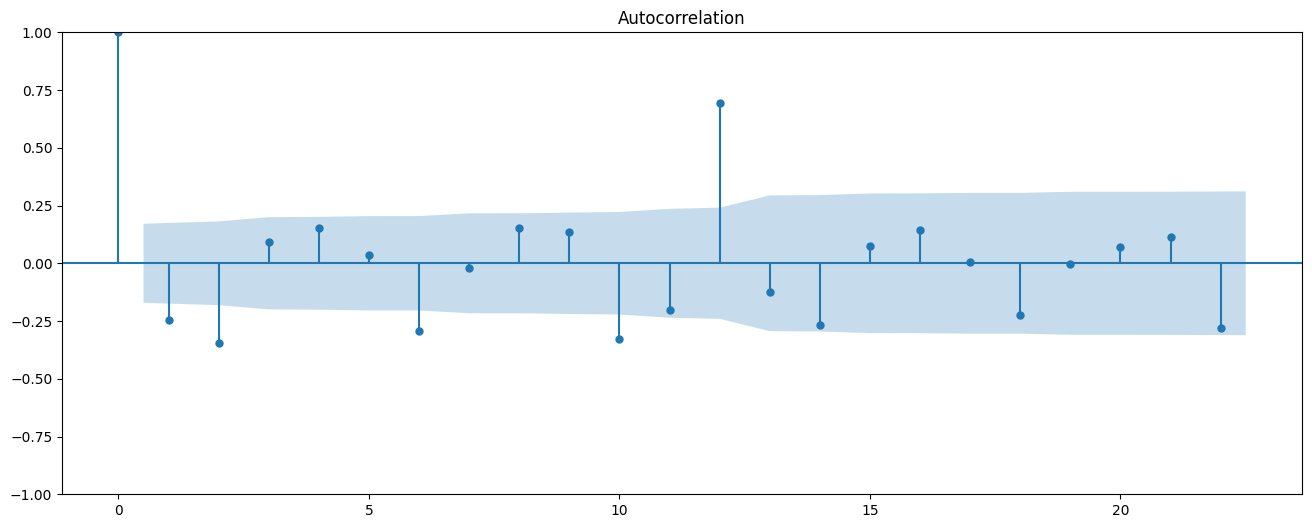

In [161]:
rcParams['figure.figsize'] = 16, 6
plot_acf(train_diff2);

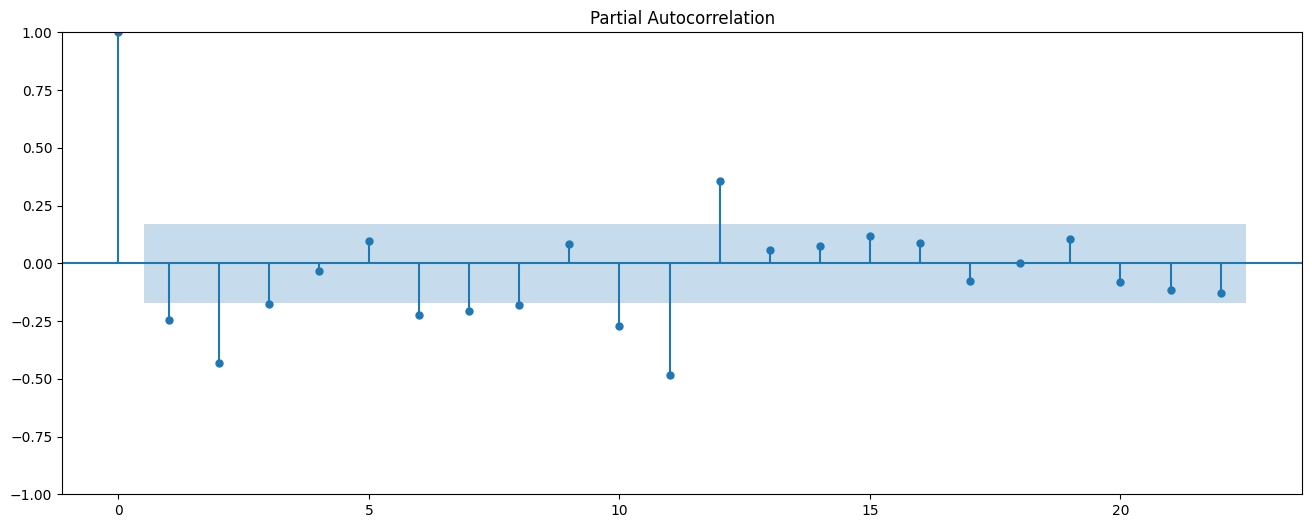

In [164]:
rcParams['figure.figsize'] = 16, 6
plot_pacf(train_diff2);

## Model Building Stationary Data

### Shoe Sales

#### Auto ARIMA

In [165]:
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [166]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [170]:
ARIMA_ls = []
for param in pdq:
    ARIMA_model = ARIMA(train_ss['Shoe_Sales'],order=param).fit() # Complete the code to fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_ls.append({'param':param, 'AIC': ARIMA_model.aic})
ARIMA_AIC = pd.DataFrame(ARIMA_ls)


ARIMA(0, 0, 0) - AIC:1679.7318645759808
ARIMA(0, 0, 1) - AIC:1594.7158956271046
ARIMA(0, 0, 2) - AIC:1561.6740998127516
ARIMA(1, 0, 0) - AIC:1515.5807815456585
ARIMA(1, 0, 1) - AIC:1510.1520389585
ARIMA(1, 0, 2) - AIC:1509.8653641161372
ARIMA(2, 0, 0) - AIC:1512.5450408377123
ARIMA(2, 0, 1) - AIC:1507.9782212792143
ARIMA(2, 0, 2) - AIC:1509.9250191658036


In [171]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
7  (2, 0, 1)  1507.978221
5  (1, 0, 2)  1509.865364
8  (2, 0, 2)  1509.925019
4  (1, 0, 1)  1510.152039
6  (2, 0, 0)  1512.545041
3  (1, 0, 0)  1515.580782
2  (0, 0, 2)  1561.674100
1  (0, 0, 1)  1594.715896
0  (0, 0, 0)  1679.731865

In [174]:
# Fit the ARIMA model
arima_model = ARIMA(train1['Shoe_Sales'], order=(2, 0, 1)).fit()
print(arima_model.summary())

# Make predictions
predicted_results_1 = arima_model.forecast(steps=len(test1))

# Calculate RMSE
rmse_1 = mean_squared_error(test1['Shoe_Sales'], predicted_results_1, squared=False)
print(f"RMSE: {rmse_1}")

# Create DataFrame with results
resultsDf = pd.DataFrame({'RMSE': rmse_1},
                         index=[f'Auto-ARIMA Model {(2, 0, 1)}'])

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -748.989
Date:                Sun, 20 Oct 2024   AIC                           1507.978
Time:                        14:55:57   BIC                           1522.392
Sample:                    01-01-1980   HQIC                          1513.835
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.5550     97.223      2.577      0.010      60.001     441.108
ar.L1          1.4437      0.131     11.001      0.000       1.186       1.701
ar.L2         -0.4536      0.125     -3.617      0.0

#### Manual ARIMA

In [175]:

arima_model = ARIMA(train1['Shoe_Sales'], order=(1,0,1)).fit()
print(arima_model.summary())

predicted_results_1 = arima_model.forecast(steps=len(test1))
rmse_2 = mean_squared_error(test1['Shoe_Sales'], predicted_results_1, squared=False)
print(rmse_2)

resultsDf = pd.DataFrame({'RMSE': rmse_2},
                         index=['ARIMA Model(1,0,1)'])
(resultsDf)

                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -751.076
Date:                Sun, 20 Oct 2024   AIC                           1510.152
Time:                        15:06:51   BIC                           1521.683
Sample:                    01-01-1980   HQIC                          1514.838
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.5859     76.763      3.264      0.001     100.133     401.038
ar.L1          0.9361      0.037     25.056      0.000       0.863       1.009
ma.L1         -0.3289      0.080     -4.116      0.0

RMSE
ARIMA Model(1,0,1)  103.296269

#### Auto SARIMA

In [177]:
# Assuming p, d, q are already defined lists of possible values for each parameter
PDQS = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in PDQS:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train1['Shoe_Sales'],
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)

            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
            SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)
        except:
            continue

SARIMA_AIC = SARIMA_AIC.sort_values(by='AIC', ascending=True).reset_index(drop=True)
print(SARIMA_AIC.head())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02530D+00    |proj g|=  2.41388D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   1.428D-07   7.025D+00
  F =   7.0252888987521978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.63703D+00    |proj g|=  4.42674D-03

At iterate   10    f=  5.63659D+00    |proj g|=  1.66601D-02

At iterate   15    f=  5.57923D+00    |proj g|=  2.52220D-01

At iterate   20    f=  5.23581D+00    |proj g|=  1.10057D-01

At iterate   25    f=  5.21667D+00    |proj g|=  6.36229D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     35      1     0     0   2.313D-06   5.217D+00
  F =   5.2166344790921100     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.40377D+00    |proj g|=  5.06532D-03

At iterate   10    f=  5.40368D+00    |proj g|=  2.29197D-02

At iterate   15    f=  5.39801D+00    |proj g|=  1.69723D-01

At iterate   20    f=  5.39504D+00    |proj g|=  3.55888D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   1.698D-06   5.395D+00
  F =   5.3950425649350819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91039D+00    |proj g|=  4.60621D-01

At iterate    5    f=  4.89663D+00    |proj g|=  1.15385D-02

At iterate   10    f=  4.89643D+00    |proj g|=  2.11854D-03

At iterate   15    f=  4.89637D+00    |proj g|=  3.26439D-02

At iterate   20    f=  4.87802D+00    |proj g|=  1.60466D-01

At iterate   25    f=  4.87742D+00    |proj g|=  7.23829D-04

At iterate   30    f=  4.87741D+00    |proj g|=  1.38361D-02

At iterate   35    f=  4.87684D+00    |proj g|=  1.32012D-02

At iterate   40    f=  4.87652D+00    |proj g|=  2.72924D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.97958D+00    |proj g|=  4.52144D-02

At iterate   25    f=  4.97483D+00    |proj g|=  9.53981D-03

At iterate   30    f=  4.97465D+00    |proj g|=  5.68420D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     39      1     0     0   2.176D-05   4.975D+00
  F =   4.9746549056080225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01741D+00    |proj g|=  4.63150D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  5.17447D+00    |proj g|=  7.64778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     37      1     0     0   1.581D-05   5.174D+00
  F =   5.1744746854812984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31843D+00    |proj g|=  4.12044D-02

At iterate    5    f=  5.31517D+00    |proj g|=  2.57141D-03

At iterate   10    f=  5.30220D+00    |proj g|=  6.27616D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.41530D+00    |proj g|=  3.72062D-03

At iterate   10    f=  5.40374D+00    |proj g|=  2.88185D-02

At iterate   15    f=  4.94395D+00    |proj g|=  8.35955D-01

At iterate   20    f=  4.76619D+00    |proj g|=  8.68468D-03

At iterate   25    f=  4.76604D+00    |proj g|=  1.43685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     35      1     0     0   5.504D-06   4.766D+00
  F =   4.7660386284414447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.29965D+00    |proj g|=  1.27065D-02

At iterate   15    f=  5.15273D+00    |proj g|=  2.86595D-01

At iterate   20    f=  4.78899D+00    |proj g|=  1.90611D-01

At iterate   25    f=  4.73506D+00    |proj g|=  3.58053D-02

At iterate   30    f=  4.73285D+00    |proj g|=  1.53154D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     42      1     0     0   4.476D-06   4.733D+00
  F =   4.7328530840799337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.01289D+00    |proj g|=  9.82046D-03

At iterate    5    f=  6.00846D+00    |proj g|=  1.59310D-02

At iterate   10    f=  5.77508D+00    |proj g|=  4.55791D-01

At iterate   15    f=  5.17898D+00    |proj g|=  3.47987D-01

At iterate   20    f=  5.09892D+00    |proj g|=  1.16810D-02

At iterate   25    f=  5.09853D+00    |proj g|=  1.68938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41741D+00    |proj g|=  2.73584D-02

At iterate    5    f=  5.41353D+00    |proj g|=  6.06249D-03

At iterate   10    f=  5.40864D+00    |proj g|=  1.58226D-02

At iterate   15    f=  5.31850D+00    |proj g|=  1.53073D-01

At iterate   20    f=  4.77929D+00    |proj g|=  4.81618D-01

At iterate   25    f=  4.64522D+00    |proj g|=  8.84309D-02

At iterate   30    f=  4.62129D+00    |proj g|=  5.03872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   10    f=  5.26129D+00    |proj g|=  6.65845D-03

At iterate   15    f=  5.10368D+00    |proj g|=  2.84417D-01

At iterate   20    f=  4.57903D+00    |proj g|=  1.57026D-01

At iterate   25    f=  4.50274D+00    |proj g|=  2.13753D-02

At iterate   30    f=  4.49472D+00    |proj g|=  3.78816D-02

At iterate   35    f=  4.49235D+00    |proj g|=  7.67082D-03

At iterate   40    f=  4.48850D+00    |proj g|=  8.28323D-02

At iterate   45    f=  4.48498D+00    |proj g|=  1.48106D-02

At iterate   50    f=  4.48474D+00    |proj g|=  6.44976D-03

At iterate   55    f=  4.48396D+00    |proj g|=  4.63635D-03

At iterate   60    f=  4.48386D+00    |proj g|=  4.08341D-03

At iterate   65    f=  4.48385D+00    |proj g|=  1.44155D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.59876D+00    |proj g|=  8.07331D-02

At iterate   10    f=  4.59311D+00    |proj g|=  3.79296D-03

At iterate   15    f=  4.59025D+00    |proj g|=  6.83922D-02

At iterate   20    f=  4.58496D+00    |proj g|=  2.63591D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   1.090D-05   4.585D+00
  F =   4.5849581108750668     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.51733D+00    |proj g|=  5.07183D-02

At iterate   10    f=  4.51662D+00    |proj g|=  7.08357D-03

At iterate   15    f=  4.51145D+00    |proj g|=  9.26737D-02

At iterate   20    f=  4.47207D+00    |proj g|=  2.03069D-02

At iterate   25    f=  4.47183D+00    |proj g|=  8.96706D-03

At iterate   30    f=  4.47181D+00    |proj g|=  2.05486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     36      1     0     0   1.638D-05   4.472D+00
  F =   4.4718139372968446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60718D+00    |proj g|=  3.26378D-01

At iterate    5    f=  4.52592D+00    |proj g|=  4.26503D-03

At iterate   10    f=  4.52501D+00    |proj g|=  4.16015D-02

At iterate   15    f=  4.49956D+00    |proj g|=  3.66069D-02

At iterate   20    f=  4.49894D+00    |proj g|=  1.50306D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   1.208D-07   4.499D+00
  F =   4.4989378557238560     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58723D+00    |proj g|=  3.05724D-01

At iterate    5    f=  4.51576D+00    |proj g|=  1.87880D-02

At iterate   10    f=  4.51128D+00    |proj g|=  1.38725D-02

At iterate   15    f=  4.50327D+00    |proj g|=  4.91361D-02

At iterate   20    f=  4.47030D+00    |proj g|=  4.85611D-02

At iterate   25    f=  4.46962D+00    |proj g|=  4.82905D-03

At iterate   30    f=  4.46953D+00    |proj g|=  2.36184D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.56344D+00    |proj g|=  3.24964D-01

At iterate   10    f=  4.51310D+00    |proj g|=  4.78851D-02

At iterate   15    f=  4.51109D+00    |proj g|=  8.61494D-03

At iterate   20    f=  4.51046D+00    |proj g|=  1.05910D-01

At iterate   25    f=  4.49903D+00    |proj g|=  1.20453D-01

At iterate   30    f=  4.49812D+00    |proj g|=  4.10865D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   2.324D-06   4.498D+00
  F =   4.4981158476123344     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.44687D+00    |proj g|=  4.21900D-03

At iterate   15    f=  4.43976D+00    |proj g|=  9.78554D-02

At iterate   20    f=  4.40795D+00    |proj g|=  8.85295D-02

At iterate   25    f=  4.39928D+00    |proj g|=  8.22185D-03

At iterate   30    f=  4.39919D+00    |proj g|=  5.26187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     41      1     0     0   2.007D-05   4.399D+00
  F =   4.3991916501441928     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.44796D+00    |proj g|=  2.95859D-02

At iterate   25    f=  4.44661D+00    |proj g|=  1.42839D-02

At iterate   30    f=  4.44655D+00    |proj g|=  5.17083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   6.172D-06   4.447D+00
  F =   4.4465485793613055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50564D+00    |proj g|=  2.96766D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.44231D+00    |proj g|=  1.58231D-02

At iterate   15    f=  4.44116D+00    |proj g|=  7.78951D-03

At iterate   20    f=  4.41861D+00    |proj g|=  9.49347D-02

At iterate   25    f=  4.39804D+00    |proj g|=  9.53887D-03

At iterate   30    f=  4.39787D+00    |proj g|=  1.02738D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     40      1     0     0   4.114D-06   4.398D+00
  F =   4.3978683243594121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56635D+00    |proj g|=  5.96844D-02

At iterate    5    f=  5.56188D+00    |proj g|=  4.23634D-03

At iterate   10    f=  5.56185D+00    |proj g|=  5.72702D-03

At iterate   15    f=  5.56169D+00    |proj g|=  6.56521D-02

At iterate   20    f=  5.56103D+00    |proj g|=  1.59710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     39      1     0     0   4.777D-05   5.561D+00
  F =   5.5610270038887499     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.04487D+00    |proj g|=  3.31375D-01

At iterate    5    f=  4.98515D+00    |proj g|=  4.62230D-03

At iterate   10    f=  4.97764D+00    |proj g|=  4.71621D-02

At iterate   15    f=  4.94202D+00    |proj g|=  2.18102D-02

At iterate   20    f=  4.94157D+00    |proj g|=  1.27206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   9.086D-06   4.942D+00
  F =   4.9415729562783541     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.48336D+00    |proj g|=  3.86950D-02

At iterate   20    f=  4.44375D+00    |proj g|=  1.24724D-01

At iterate   25    f=  4.44070D+00    |proj g|=  1.07959D-02

At iterate   30    f=  4.44054D+00    |proj g|=  1.19889D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     39      1     0     0   4.814D-05   4.441D+00
  F =   4.4405433806177133     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.40495D+00    |proj g|=  4.44657D-02

At iterate   10    f=  4.40185D+00    |proj g|=  1.96361D-02

At iterate   15    f=  4.40054D+00    |proj g|=  4.18075D-03

At iterate   20    f=  4.39504D+00    |proj g|=  7.21959D-02

At iterate   25    f=  4.36099D+00    |proj g|=  6.78846D-02

At iterate   30    f=  4.35601D+00    |proj g|=  6.85412D-03

At iterate   35    f=  4.35589D+00    |proj g|=  1.84446D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     42      1     0     0   4.648D-05   4.356D+00
  F =   4.3558915918154346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.59486D+00    |proj g|=  2.99600D-01

At iterate   10    f=  4.55568D+00    |proj g|=  7.13699D-02

At iterate   15    f=  4.55480D+00    |proj g|=  6.75270D-03

At iterate   20    f=  4.55050D+00    |proj g|=  8.21999D-02

At iterate   25    f=  4.54121D+00    |proj g|=  6.36501D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     32      1     0     0   3.110D-06   4.541D+00
  F =   4.5411810933195627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.761D-05   4.865D+00
  F =   4.8651245558384053     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54182D+00    |proj g|=  2.46343D-01

At iterate    5    f=  4.48745D+00    |proj g|=  5.34165D-02

At iterate   10    f=  4.48307D+00    |proj g|=  4.45450D-03

At iterate   15    f=  4.48040D+00    |proj g|=  3.16743D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.42964D+00    |proj g|=  1.14343D-01

At iterate   20    f=  4.40495D+00    |proj g|=  3.70656D-02

At iterate   25    f=  4.40196D+00    |proj g|=  4.15413D-02

At iterate   30    f=  4.40088D+00    |proj g|=  1.24031D-02

At iterate   35    f=  4.40075D+00    |proj g|=  2.62290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     47      1     0     0   1.030D-04   4.401D+00
  F =   4.4007492305054221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   10    f=  4.43975D+00    |proj g|=  1.67082D-02

At iterate   15    f=  4.43802D+00    |proj g|=  8.10279D-03

At iterate   20    f=  4.41650D+00    |proj g|=  1.65275D-01

At iterate   25    f=  4.39133D+00    |proj g|=  2.23792D-02

At iterate   30    f=  4.39080D+00    |proj g|=  7.75762D-03

At iterate   35    f=  4.39077D+00    |proj g|=  1.92721D-04

At iterate   40    f=  4.39077D+00    |proj g|=  3.36229D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     43      1     0     0   3.362D-05   4.391D+00
  F =   4.3907694346506378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  5.00920D+00    |proj g|=  2.69880D-02

At iterate   35    f=  5.00493D+00    |proj g|=  2.15720D-01

At iterate   40    f=  4.99862D+00    |proj g|=  8.45750D-02

At iterate   45    f=  4.99369D+00    |proj g|=  2.02948D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     69      1     0     0   6.353D-05   4.994D+00
  F =   4.9936880535171264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00199D+00    |proj g|=  6.15835D-01

At iterate    5    f=  4.94799D+00    |proj g|=  1.15632D-01

At iterate   10    f=  4.94717D+00    |proj g|=  1.31766D-02

At iterate   15    f=  4.93519D+00    |proj g|=  6.36362D-02

At iterate   20    f=  4.93045D+00    |proj g|=  2.74654D-02

At iterate   25    f=  4.89720D+00    |proj g|=  6.95128D-02

At iterate   30    f=  4.89611D+00    |proj g|=  4.34976D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.45848D+00    |proj g|=  1.23062D-01

At iterate   10    f=  4.45512D+00    |proj g|=  5.24978D-02

At iterate   15    f=  4.44689D+00    |proj g|=  1.99092D-02

At iterate   20    f=  4.44039D+00    |proj g|=  1.60225D-02

At iterate   25    f=  4.43936D+00    |proj g|=  6.09666D-03

At iterate   30    f=  4.42394D+00    |proj g|=  1.03248D-01

At iterate   35    f=  4.40065D+00    |proj g|=  1.53127D-02

At iterate   40    f=  4.39984D+00    |proj g|=  2.13544D-02

At iterate   45    f=  4.39974D+00    |proj g|=  1.16844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     55   

 This problem is unconstrained.



At iterate   15    f=  4.44203D+00    |proj g|=  2.38754D-02

At iterate   20    f=  4.43767D+00    |proj g|=  4.47510D-02

At iterate   25    f=  4.43282D+00    |proj g|=  2.35437D-02

At iterate   30    f=  4.43105D+00    |proj g|=  2.20050D-02

At iterate   35    f=  4.39549D+00    |proj g|=  2.66260D-02

At iterate   40    f=  4.38987D+00    |proj g|=  6.65803D-03

At iterate   45    f=  4.38974D+00    |proj g|=  8.41080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     57      1     0     0   2.636D-05   4.390D+00
  F =   4.3897373506127852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.98484D+00    |proj g|=  1.09502D+00

At iterate   25    f=  4.97477D+00    |proj g|=  2.14645D-01

At iterate   30    f=  4.97358D+00    |proj g|=  4.41829D-02

At iterate   35    f=  4.97176D+00    |proj g|=  2.52110D-01

At iterate   40    f=  4.97075D+00    |proj g|=  9.90351D-03

At iterate   45    f=  4.97073D+00    |proj g|=  9.68182D-03

At iterate   50    f=  4.97059D+00    |proj g|=  9.21982D-02

At iterate   55    f=  4.96476D+00    |proj g|=  5.30146D-01

At iterate   60    f=  4.95622D+00    |proj g|=  8.59238D-02

At iterate   65    f=  4.95518D+00    |proj g|=  7.03281D-01

At iterate   70    f=  4.95484D+00    |proj g|=  1.20979D-01

At iterate   75    f=  4.95433D+00    |proj g|=  3.62034D-01

At iterate   80    f=  4.95406D+00    |proj g|=  4.76652D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  4.57239D+00    |proj g|=  1.51525D-01

At iterate   10    f=  4.47456D+00    |proj g|=  2.09267D-01

At iterate   15    f=  4.47085D+00    |proj g|=  8.24448D-03

At iterate   20    f=  4.47072D+00    |proj g|=  2.42742D-02

At iterate   25    f=  4.46859D+00    |proj g|=  4.71735D-02

At iterate   30    f=  4.46667D+00    |proj g|=  2.21831D-02

At iterate   35    f=  4.46661D+00    |proj g|=  4.70260D-02

At iterate   40    f=  4.46658D+00    |proj g|=  1.88897D-02

At iterate   45    f=  4.46654D+00    |proj g|=  1.28445D-02

At iterate   50    f=  4.46552D+00    |proj g|=  2.14931D-01

At iterate   55    f=  4.45734D+00    |proj g|=  1.20338D-01

At iterate   60    f=  4.45398D+00    |proj g|=  1.90379D-01

At iterate   65    f=  4.45313D+00    |proj g|=  2.20424D-01

At iterate   70    f=  4.45301D+00    |proj g|=  1.97810D-02

At iterate   75    f=  4.45301D+00    |proj g|=  4.70619D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.88196D+00    |proj g|=  6.23724D-02

At iterate   20    f=  4.87764D+00    |proj g|=  1.10537D-02

At iterate   25    f=  4.87618D+00    |proj g|=  2.72557D-02

At iterate   30    f=  4.83973D+00    |proj g|=  1.47194D-01

At iterate   35    f=  4.82666D+00    |proj g|=  6.19182D-03

At iterate   40    f=  4.82643D+00    |proj g|=  7.20776D-03

At iterate   45    f=  4.82641D+00    |proj g|=  6.26921D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     54      1     0     0   6.269D-06   4.826D+00
  F =   4.8264141340775337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  4.40903D+00    |proj g|=  1.28322D-02

At iterate   15    f=  4.40821D+00    |proj g|=  4.73032D-02

At iterate   20    f=  4.39851D+00    |proj g|=  5.66345D-02

At iterate   25    f=  4.39673D+00    |proj g|=  6.28915D-03

At iterate   30    f=  4.38617D+00    |proj g|=  4.89664D-02

At iterate   35    f=  4.35349D+00    |proj g|=  4.02272D-02

At iterate   40    f=  4.35279D+00    |proj g|=  3.91359D-03

At iterate   45    f=  4.35272D+00    |proj g|=  3.56667D-04

At iterate   50    f=  4.35271D+00    |proj g|=  5.49530D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     53     61   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.45420D+00    |proj g|=  8.10066D-03

At iterate   15    f=  4.45139D+00    |proj g|=  5.46012D-02

At iterate   20    f=  4.44362D+00    |proj g|=  1.33972D-02

At iterate   25    f=  4.44286D+00    |proj g|=  2.13725D-02

At iterate   30    f=  4.42086D+00    |proj g|=  1.67859D-01

At iterate   35    f=  4.41344D+00    |proj g|=  4.26116D-03

At iterate   40    f=  4.41337D+00    |proj g|=  3.08610D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     48      1     0     0   2.762D-05   4.413D+00
  F =   4.4133711746666213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.40926D+00    |proj g|=  3.89503D-02

At iterate   10    f=  4.40529D+00    |proj g|=  1.78324D-02

At iterate   15    f=  4.40222D+00    |proj g|=  1.19469D-02

At iterate   20    f=  4.39606D+00    |proj g|=  3.20611D-02

At iterate   25    f=  4.39333D+00    |proj g|=  4.35797D-03

At iterate   30    f=  4.38438D+00    |proj g|=  3.93564D-02

At iterate   35    f=  4.35381D+00    |proj g|=  7.25416D-02

At iterate   40    f=  4.35223D+00    |proj g|=  2.78575D-02

At iterate   45    f=  4.35210D+00    |proj g|=  7.01087D-04

At iterate   50    f=  4.35210D+00    |proj g|=  1.19444D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47261D+00    |proj g|=  3.08510D-01

At iterate    5    f=  4.41091D+00    |proj g|=  4.75922D-02

At iterate   10    f=  4.40604D+00    |proj g|=  4.23032D-03

At iterate   15    f=  4.40393D+00    |proj g|=  4.33551D-02

At iterate   20    f=  4.37017D+00    |proj g|=  1.19314D-01


 This problem is unconstrained.



At iterate   25    f=  4.35872D+00    |proj g|=  4.14960D-02

At iterate   30    f=  4.35679D+00    |proj g|=  3.28306D-03

At iterate   35    f=  4.35678D+00    |proj g|=  1.37100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     39      1     0     0   3.203D-06   4.357D+00
  F =   4.3567838952998645     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                         Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log

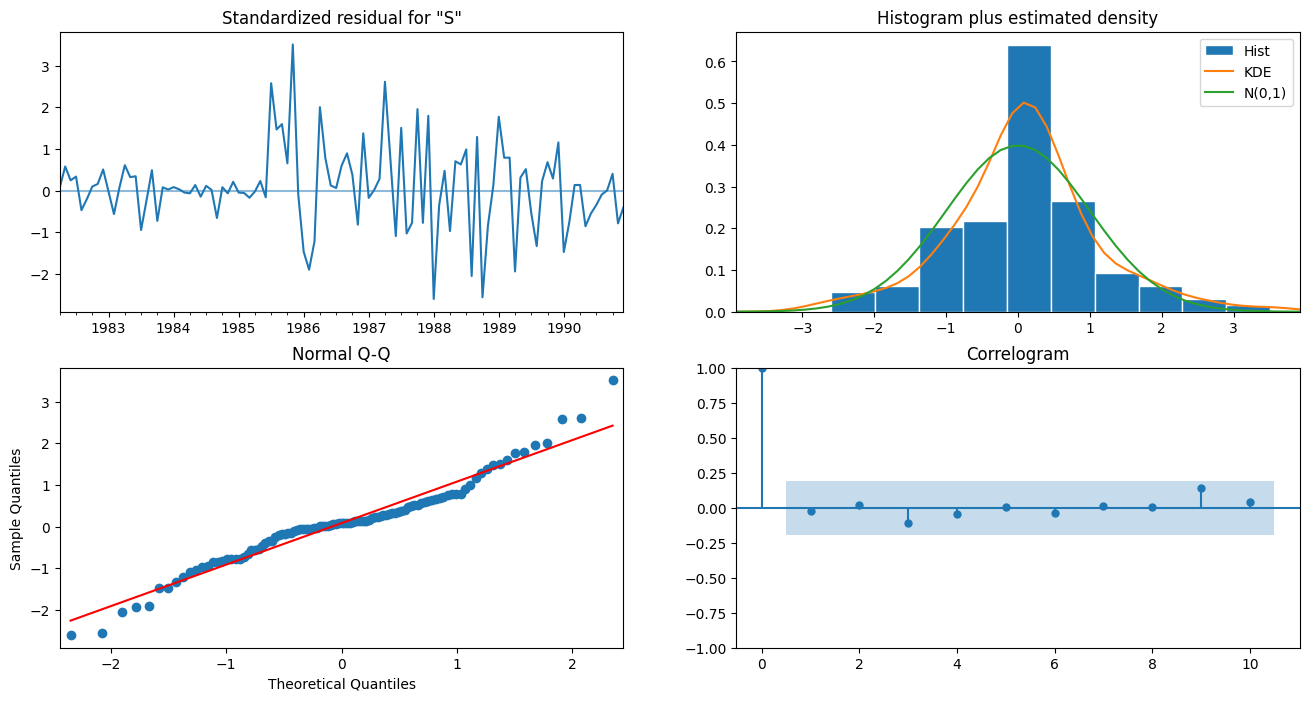

RMSE: 160.99009385010643
                                            RMSE
SARIMA Model (1, 0, 2) (1, 0, 2, 12)  160.990094


In [180]:

# Fit the SARIMA model
best_order = SARIMA_AIC.iloc[0, 0]  # This should already be a tuple
best_seasonal_order = SARIMA_AIC.iloc[0, 1]  # This should already be a tuple

sarima_model_1 = sm.tsa.statespace.SARIMAX(train1['Shoe_Sales'],
                                           order=best_order,
                                           seasonal_order=best_seasonal_order,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(maxiter=1000)
print(sarima_model_1.summary())

# Plot model diagnostics
sarima_model_1.plot_diagnostics(figsize=(16, 8))
plt.show()

# Forecast
predicted_results_s1 = sarima_model_1.forecast(steps=len(test1))

# Calculate RMSE
rmse_3 = mean_squared_error(test1['Shoe_Sales'], predicted_results_s1, squared=False)
print(f"RMSE: {rmse_3}")

# Create DataFrame with results
resultsDf2 = pd.DataFrame({'RMSE': rmse_3},
                          index=[f'SARIMA Model {best_order} {best_seasonal_order}'])
print(resultsDf2)


#### Manual SARIMA

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96590D+00    |proj g|=  2.81639D-01

At iterate    5    f=  4.93097D+00    |proj g|=  1.45139D-02

At iterate   10    f=  4.92877D+00    |proj g|=  1.84352D-02

At iterate   15    f=  4.89846D+00    |proj g|=  1.97509D-01

At iterate   20    f=  4.87329D+00    |proj g|=  6.55493D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.913D-06   4.873D+00
  F =   4.8732940464428927     

CONVERG

 This problem is unconstrained.


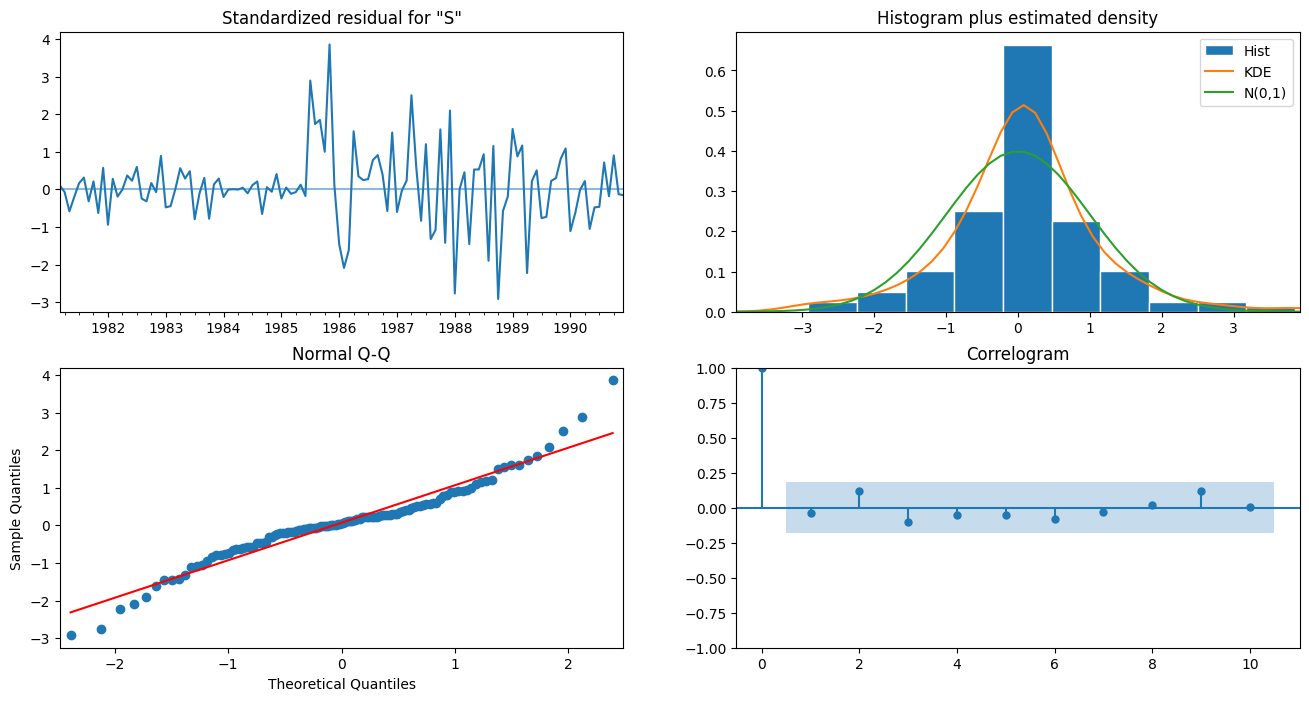

RMSE: 54.95824601084918
                                      RMSE
SARIMA Model (1,0,1) (1,0,1,12)  54.958246


In [181]:
sarima_model_1 = sm.tsa.statespace.SARIMAX(train1['Shoe_Sales'],
                                           order=(1,0,1),
                                           seasonal_order=(1,0,1,12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(maxiter=1000)
print(sarima_model_1.summary())

sarima_model_1.plot_diagnostics(figsize=(16, 8))
plt.show()

predicted_results_s1 = sarima_model_1.forecast(steps=len(test1))

rmse_4 = mean_squared_error(test1['Shoe_Sales'], predicted_results_s1, squared=False)
print(f"RMSE: {rmse_4}")

resultsDf2 = pd.DataFrame({'RMSE': rmse_4},
                          index=['SARIMA Model (1,0,1) (1,0,1,12)'])
print(resultsDf2)


In [185]:
train_ss

YearMonth  Shoe_Sales
YearMonth                       
1980-01-01   1980-01          85
1980-02-01   1980-02          89
1980-03-01   1980-03         109
1980-04-01   1980-04          95
1980-05-01   1980-05          91
...              ...         ...
1990-08-01   1990-08         285
1990-09-01   1990-09         309
1990-10-01   1990-10         322
1990-11-01   1990-11         362
1990-12-01   1990-12         471

[132 rows x 2 columns]

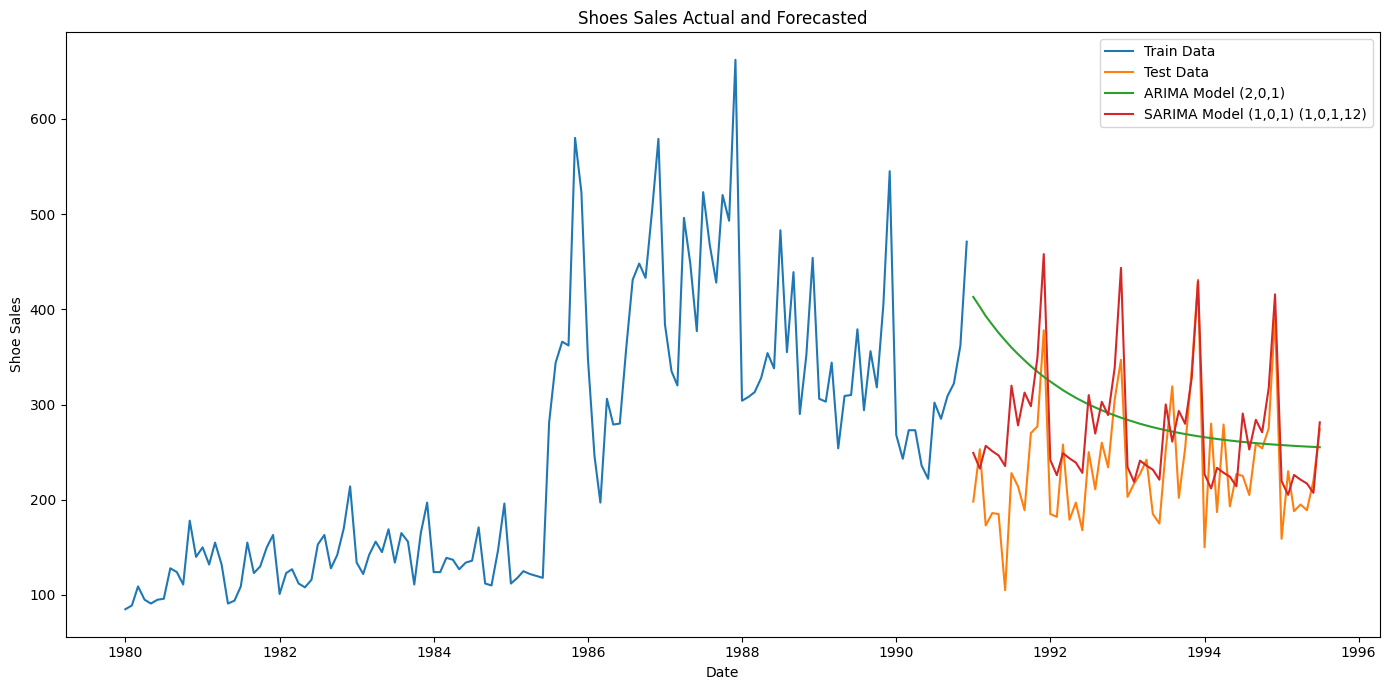

In [188]:

plt.figure(figsize=(14, 7))

# Plot train and test data
plt.plot(train_ss.index, train_ss['Shoe_Sales'], label='Train Data')
plt.plot(test_ss.index, test_ss['Shoe_Sales'], label='Test Data')

# Plot ARIMA forecast
plt.plot(test1.index, predicted_results_1, label='ARIMA Model (2,0,1)')

# Plot SARIMA forecast
plt.plot(test1.index, predicted_results_s1, label='SARIMA Model (1,0,1) (1,0,1,12)')

plt.legend(loc='best')
plt.title('Shoes Sales Actual and Forecasted')
plt.xlabel('Date')
plt.ylabel('Shoe Sales')

plt.tight_layout()
plt.show()


### Soft Drinks

#### Auto ARIMA

In [189]:
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [195]:
# Assuming pdq is already defined
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
    try:
        ARIMA_model = ARIMA(train2['Softdrinks'], order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
        new_row = pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})
        ARIMA_AIC = pd.concat([ARIMA_AIC, new_row], ignore_index=True)
    except:
        continue

ARIMA_AIC = ARIMA_AIC.sort_values(by='AIC', ascending=True).reset_index(drop=True)
print(ARIMA_AIC.head())

# Fit the best ARIMA model
#best_order = eval(ARIMA_AIC.iloc[0]['param'])
arima_model = ARIMA(train2['Softdrinks'], order=(0,0,1)).fit()
print(arima_model.summary())

# Forecast
predicted_results_1 = arima_model.forecast(steps=len(test2))

# Calculate RMSE
rmse_1 = mean_squared_error(test2['Softdrinks'], predicted_results_1, squared=False)
print(f"RMSE: {rmse_1}")

resultsDf = pd.DataFrame({'RMSE': rmse_1},
                         index=[f'Auto-ARIMA Model {best_order}'])
print(resultsDf)

ARIMA(0, 0, 0) - AIC:2084.8538062461603
ARIMA(0, 0, 1) - AIC:2068.1206713933757
ARIMA(0, 0, 2) - AIC:2069.2638583670528
ARIMA(1, 0, 0) - AIC:2073.1218689141956
ARIMA(1, 0, 1) - AIC:2069.0582239326054
ARIMA(1, 0, 2) - AIC:2070.9903054197157
ARIMA(2, 0, 0) - AIC:2072.303525096754
ARIMA(2, 0, 1) - AIC:2070.991930795042
ARIMA(2, 0, 2) - AIC:2072.715703081923
       param          AIC
0  (0, 0, 1)  2068.120671
1  (1, 0, 1)  2069.058224
2  (0, 0, 2)  2069.263858
3  (1, 0, 2)  2070.990305
4  (2, 0, 1)  2070.991931
                               SARIMAX Results                                
Dep. Variable:             Softdrinks   No. Observations:                  132
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1031.060
Date:                Sun, 20 Oct 2024   AIC                           2068.121
Time:                        16:28:04   BIC                           2076.769
Sample:                    01-01-1980   HQIC                          2071.635
             

#### Manual ARIMA

In [196]:
arima_model = ARIMA(train2['Softdrinks'], order=(2,0,1)).fit()
print(arima_model.summary())

predicted_results_1 = arima_model.forecast(steps=len(test2))
rmse_2 = mean_squared_error(test2['Softdrinks'], predicted_results_1, squared=False)
print(f"RMSE: {rmse_2}")

resultsDf = pd.DataFrame({'RMSE': rmse_2},
                         index=['ARIMA Model(2,0,1)'])
(resultsDf)



                               SARIMAX Results                                
Dep. Variable:             Softdrinks   No. Observations:                  132
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1030.496
Date:                Sun, 20 Oct 2024   AIC                           2070.992
Time:                        16:35:44   BIC                           2085.406
Sample:                    01-01-1980   HQIC                          2076.849
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3124.1668     84.002     37.192      0.000    2959.526    3288.808
ar.L1         -0.2594      0.299     -0.867      0.386      -0.846       0.327
ar.L2          0.0384      0.157      0.245      0.8

RMSE
ARIMA Model(2,0,1)  945.282418

#### Auto SARIMA

In [197]:
# Assuming p, d, q are already defined lists of possible values for each parameter
PDQS = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in PDQS:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train2['Softdrinks'],
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)

            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            new_row = pd.DataFrame({'param': [param], 'seasonal': [param_seasonal], 'AIC': [results_SARIMA.aic]})
            SARIMA_AIC = pd.concat([SARIMA_AIC, new_row], ignore_index=True)
        except:
            continue

SARIMA_AIC = SARIMA_AIC.sort_values(by='AIC', ascending=True).reset_index(drop=True)
print(SARIMA_AIC.head())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.41698D+00    |proj g|=  1.48344D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.483D-06   9.417D+00
  F =   9.4169796019280856     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.39606D+00    |proj g|=  2.01153D-04

At iterate   10    f=  7.39605D+00    |proj g|=  2.12385D-03

At iterate   15    f=  7.39413D+00    |proj g|=  2.69661D-02

At iterate   20    f=  7.06712D+00    |proj g|=  5.18932D-01

At iterate   25    f=  6.94148D+00    |proj g|=  8.70124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   8.180D-06   6.941D+00
  F =   6.9414066292647680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.53971D+00    |proj g|=  1.36245D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   8.193D-05   6.539D+00
  F =   6.5394168771144594     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88874D+00    |proj g|=  2.42586D-01

At iterate    5    f=  5.88775D+00    |proj g|=  5.36176D-01

At iterate   10    f=  5.88174D+00    |proj g|=  2.41331D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.86090D+00    |proj g|=  6.88081D-02

At iterate   10    f=  5.86010D+00    |proj g|=  2.12708D-01

At iterate   15    f=  5.85855D+00    |proj g|=  2.27032D-03

At iterate   20    f=  5.85855D+00    |proj g|=  4.22299D-03

At iterate   25    f=  5.85845D+00    |proj g|=  1.22766D-01

At iterate   30    f=  5.85520D+00    |proj g|=  2.00736D-02

At iterate   35    f=  5.85492D+00    |proj g|=  3.64332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     84      2     0     0   3.643D-04   5.855D+00
  F =   5.8549189834597755     

ABNORMAL_TERMINATION_IN_LNSRCH                    


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  7.56137D+00    |proj g|=  1.01633D-01

At iterate   25    f=  7.54394D+00    |proj g|=  4.76080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     42      1     0     0   2.575D-06   7.544D+00
  F =   7.5439430422532183     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36125D+00    |proj g|=  2.79040D-01

At iterate    5    f=  7.29113D+00    |proj g|=  1.33926D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04660D+00    |proj g|=  5.26033D-02

At iterate    5    f=  8.03875D+00    |proj g|=  4.66031D-03

At iterate   10    f=  8.03809D+00    |proj g|=  4.60961D-04

At iterate   15    f=  8.03785D+00    |proj g|=  6.73871D-03

At iterate   20    f=  7.98574D+00    |proj g|=  1.50509D-01

At iterate   25    f=  7.05375D+00    |proj g|=  1.53245D+00

At iterate   30    f=  6.56713D+00    |proj g|=  1.04203D+00

At iterate   35    f=  6.50276D+00    |proj g|=  1.33683D-01

At iterate   40    f=  6.47695D+00    |proj g|=  1.30801D-01

At iterate   45    f=  6.47317D+00    |proj g|=  1.35916D-01

At iterate   50    f=  6.47276D+00    |proj g|=  5.04578D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.98545D+00    |proj g|=  1.92629D+00

At iterate   20    f=  6.43102D+00    |proj g|=  3.71051D+00

At iterate   25    f=  5.93638D+00    |proj g|=  6.39599D-02

At iterate   30    f=  5.93314D+00    |proj g|=  6.72321D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     57      1     0     0   3.190D-05   5.933D+00
  F =   5.9331388027013912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.22139D+00    |proj g|=  1.12001D-02

At iterate   10    f=  7.21981D+00    |proj g|=  6.08416D-04

At iterate   15    f=  7.21978D+00    |proj g|=  5.94293D-04

At iterate   20    f=  7.21974D+00    |proj g|=  1.68569D-03

At iterate   25    f=  7.21959D+00    |proj g|=  5.26046D-03

At iterate   30    f=  7.21500D+00    |proj g|=  1.93745D-02

At iterate   35    f=  7.19017D+00    |proj g|=  4.22067D-02

At iterate   40    f=  6.95669D+00    |proj g|=  1.81030D-01

At iterate   45    f=  5.83360D+00    |proj g|=  6.42456D-01

At iterate   50    f=  5.79431D+00    |proj g|=  1.54922D-01

At iterate   55    f=  5.79232D+00    |proj g|=  1.29696D-02

At iterate   60    f=  5.79231D+00    |proj g|=  2.84587D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.18349D+00    |proj g|=  2.97606D-03

At iterate   15    f=  7.16713D+00    |proj g|=  4.36185D-02

At iterate   20    f=  6.55189D+00    |proj g|=  1.56668D-01

At iterate   25    f=  6.48314D+00    |proj g|=  1.04514D-02

At iterate   30    f=  6.47704D+00    |proj g|=  2.56395D-02

At iterate   35    f=  6.47610D+00    |proj g|=  1.52861D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     44      1     0     0   1.175D-05   6.476D+00
  F =   6.4760901473694261     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.18030D+00    |proj g|=  4.46691D-03

At iterate   15    f=  8.16546D+00    |proj g|=  3.81204D-02

At iterate   20    f=  7.51439D+00    |proj g|=  7.24937D-01

At iterate   25    f=  6.90086D+00    |proj g|=  8.92458D-01

At iterate   30    f=  6.66182D+00    |proj g|=  3.32702D-01

At iterate   35    f=  6.66020D+00    |proj g|=  1.05428D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     52      1     0     0   1.088D-05   6.660D+00
  F =   6.6602012962824606     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18041D+00    |proj g|=  2.25337D-01

At iterate    5    f=  7.15890D+00    |proj g|=  8.73827D-03

At iterate   10    f=  7.15776D+00    |proj g|=  1.29131D-03

At iterate   15    f=  7.15771D+00    |proj g|=  8.60488D-04

At iterate   20    f=  7.15618D+00    |proj g|=  7.99445D-03

At iterate   25    f=  7.14124D+00    |proj g|=  2.46667D-02

At iterate   30    f=  6.47050D+00    |proj g|=  1.95411D+00
  ys=-1.828E+00  -gs= 6.091E-01 BFGS update SKIPPED

At iterate   35    f=  5.86737D+00    |proj g|=  2.28556D+00

At iterate   40    f=  5.75676D+00    |proj g|=  3.18454D-01

At iterate   45    f=  5.75312D+00    |proj g|=  6.59620D-02

At iterate   50    f=  5.75288D+00    |proj g|=  6.66215D-03

At iterate   55    f=  5.75286D+00    |proj g|=  1.82653D-02

At iterate   60    f=  5.75256D+00  

 This problem is unconstrained.



At iterate    5    f=  7.36179D+00    |proj g|=  2.52234D-04

At iterate   10    f=  7.36176D+00    |proj g|=  1.54393D-03

At iterate   15    f=  7.36133D+00    |proj g|=  8.60635D-03

At iterate   20    f=  7.35379D+00    |proj g|=  2.34999D-02

At iterate   25    f=  7.27391D+00    |proj g|=  2.41427D-02

At iterate   30    f=  6.89469D+00    |proj g|=  3.21706D+00

At iterate   35    f=  6.07146D+00    |proj g|=  7.31783D-01

At iterate   40    f=  5.95655D+00    |proj g|=  2.07251D-01

At iterate   45    f=  5.93267D+00    |proj g|=  1.42690D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     82   

 This problem is unconstrained.



At iterate   35    f=  6.31572D+00    |proj g|=  1.93877D+00

At iterate   40    f=  5.92595D+00    |proj g|=  8.80744D-01

At iterate   45    f=  5.91494D+00    |proj g|=  4.58673D-02

At iterate   50    f=  5.91383D+00    |proj g|=  2.10245D-01

At iterate   55    f=  5.91323D+00    |proj g|=  8.85502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     58     85      1     0     0   4.116D-04   5.913D+00
  F =   5.9132281218814873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.15853D+00    |proj g|=  9.69420D-03

At iterate   10    f=  7.15736D+00    |proj g|=  3.19315D-03

At iterate   15    f=  7.15730D+00    |proj g|=  3.46078D-04

At iterate   20    f=  7.15717D+00    |proj g|=  5.82695D-04

At iterate   25    f=  7.15475D+00    |proj g|=  1.83588D-02

At iterate   30    f=  7.05611D+00    |proj g|=  1.28875D-01

At iterate   35    f=  6.96399D+00    |proj g|=  1.67315D-01

At iterate   40    f=  6.49270D+00    |proj g|=  1.19489D+00

At iterate   45    f=  6.16362D+00    |proj g|=  4.01874D-01

At iterate   50    f=  5.94067D+00    |proj g|=  4.93690D-01

At iterate   55    f=  5.85024D+00    |proj g|=  1.31881D+00

At iterate   60    f=  5.78139D+00    |proj g|=  4.00370D-02

At iterate   65    f=  5.75865D+00    |proj g|=  7.57472D-02

At iterate   70    f=  5.75142D+00    |proj g|=  8.65100D-02

At iterate   75    f=  5.75011D+00    |proj g|=  1.15709D-01

At iterate   80    f=  5.74513D+00    |proj g|=  8.61079D-02

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46400D+00    |proj g|=  4.61511D-01

At iterate    5    f=  6.30192D+00    |proj g|=  1.49212D-02

At iterate   10    f=  6.30164D+00    |proj g|=  2.91230D-03

At iterate   15    f=  6.29915D+00    |proj g|=  7.23661D-02

At iterate   20    f=  6.23159D+00    |proj g|=  3.71345D-01

At iterate   25    f=  6.21153D+00    |proj g|=  1.48088D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     30      1     0     0   4.459D-06   6.212D+00
  F =   6.2115264062347633     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL           

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.89165D+00    |proj g|=  3.37899D-03

At iterate   15    f=  6.89083D+00    |proj g|=  8.19869D-02

At iterate   20    f=  6.79646D+00    |proj g|=  1.45606D+00

At iterate   25    f=  6.61241D+00    |proj g|=  7.08010D-02

At iterate   30    f=  6.60795D+00    |proj g|=  9.58602D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     39      1     0     0   5.454D-06   6.608D+00
  F =   6.6079482921711898     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.17943D+00    |proj g|=  2.31710D-03

At iterate   20    f=  6.17942D+00    |proj g|=  4.96651D-03

At iterate   25    f=  6.17885D+00    |proj g|=  6.36732D-02

At iterate   30    f=  6.09448D+00    |proj g|=  1.94910D-01

At iterate   35    f=  5.86755D+00    |proj g|=  1.20498D+00

At iterate   40    f=  5.85769D+00    |proj g|=  8.98607D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     57      1     0     0   1.551D-04   5.858D+00
  F =   5.8576935780503563     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  6.18145D+00    |proj g|=  3.43582D-02

At iterate   10    f=  6.17788D+00    |proj g|=  3.23179D-03

At iterate   15    f=  6.17740D+00    |proj g|=  8.82473D-04

At iterate   20    f=  6.17738D+00    |proj g|=  4.22347D-03

At iterate   25    f=  6.17420D+00    |proj g|=  1.32896D-01

At iterate   30    f=  6.03138D+00    |proj g|=  4.64916D-01

At iterate   35    f=  5.90772D+00    |proj g|=  1.25157D+00

At iterate   40    f=  5.86233D+00    |proj g|=  3.16095D-01

At iterate   45    f=  5.84394D+00    |proj g|=  4.34822D-02

At iterate   50    f=  5.84231D+00    |proj g|=  4.99553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  6.79992D+00    |proj g|=  3.26855D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     63      1     0     0   2.345D-02   6.799D+00
  F =   6.7994834277685730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36006D+00    |proj g|=  4.75788D-01

At iterate    5    f=  6.15893D+00    |proj g|=  6.69755D-01

At iterate   10    f=  6.15717D+00    |proj g|=  3.50761D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     55      1     0     0   1.711D-05   6.438D+00
  F =   6.4375589149246828     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14042D+00    |proj g|=  1.57440D-01

At iterate    5    f=  6.09165D+00    |proj g|=  1.38011D-02

At iterate   10    f=  6.09126D+00    |proj g|=  5.78306D-03

At iterate   15    f=  6.09050D+00    |proj g|=  1.60224D-02


 This problem is unconstrained.



At iterate   20    f=  6.09023D+00    |proj g|=  3.85156D-03

At iterate   25    f=  6.09021D+00    |proj g|=  1.47887D-02

At iterate   30    f=  6.08793D+00    |proj g|=  2.15908D-01

At iterate   35    f=  6.04819D+00    |proj g|=  3.99551D-01

At iterate   40    f=  5.98562D+00    |proj g|=  4.33925D+00

At iterate   45    f=  5.84544D+00    |proj g|=  8.10123D-01

At iterate   50    f=  5.81967D+00    |proj g|=  1.76578D-01

At iterate   55    f=  5.81943D+00    |proj g|=  4.85873D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     58     81      1     0     0   8.096D-05   5.819D+00
  F =   5.81942766832

 This problem is unconstrained.



At iterate   30    f=  5.95666D+00    |proj g|=  3.93211D-01

At iterate   35    f=  5.87676D+00    |proj g|=  1.59016D-01

At iterate   40    f=  5.86988D+00    |proj g|=  3.70097D-02

At iterate   45    f=  5.86963D+00    |proj g|=  2.28510D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     70      1     0     0   6.987D-06   5.870D+00
  F =   5.8696303488688857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  6.14385D+00    |proj g|=  1.18918D-02

At iterate   25    f=  6.14375D+00    |proj g|=  1.11281D-03

At iterate   30    f=  6.14211D+00    |proj g|=  4.67829D-02

At iterate   35    f=  6.06600D+00    |proj g|=  1.78194D-01

At iterate   40    f=  5.88336D+00    |proj g|=  6.55770D-01

At iterate   45    f=  5.85487D+00    |proj g|=  8.97057D-02

At iterate   50    f=  5.85155D+00    |proj g|=  7.48288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     52     78      1     0     0   2.056D-05   5.852D+00
  F =   5.8515521306501492     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  6.08422D+00    |proj g|=  1.86637D-03

At iterate   20    f=  6.08415D+00    |proj g|=  6.85041D-03

At iterate   25    f=  6.08396D+00    |proj g|=  4.31981D-03

At iterate   30    f=  6.08392D+00    |proj g|=  4.23698D-03

At iterate   35    f=  6.08124D+00    |proj g|=  7.64938D-02

At iterate   40    f=  6.05539D+00    |proj g|=  2.38759D-01

At iterate   45    f=  5.85471D+00    |proj g|=  5.00761D-01

At iterate   50    f=  5.78699D+00    |proj g|=  2.75389D-02

At iterate   55    f=  5.78655D+00    |proj g|=  9.16681D-03

At iterate   60    f=  5.78646D+00    |proj g|=  1.68829D-02

At iterate   65    f=  5.78645D+00    |proj g|=  1.80998D-03

At iterate   70    f=  5.78645D+00    |proj g|=  4.34677D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22882D+00    |proj g|=  4.40869D-01

At iterate    5    f=  6.12428D+00    |proj g|=  7.27351D+00

At iterate   10    f=  6.09350D+00    |proj g|=  3.63543D-01

At iterate   15    f=  6.08190D+00    |proj g|=  4.40113D+00

At iterate   20    f=  6.07048D+00    |proj g|=  3.37591D-02

At iterate   25    f=  6.06799D+00    |proj g|=  5.05524D-01

At iterate   30    f=  6.06557D+00    |proj g|=  2.07075D-02

At iterate   35    f=  6.06551D+00    |proj g|=  6.51799D-03

At iterate   40    f=  6.06543D+00    |proj g|=  7.35490D-04

At iterate   45    f=  6.06543D+00    |proj g|=  3.82346D-02

At iterate   50    f=  6.06519D+00    |proj g|=  3.82801D-01

At iterate   55    f=  6.05925D+00    |proj g|=  2.05084D+00

At iterate   60    f=  5.96856D+00    |proj g|=  1.13994D+00

At iterate   65    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  6.40627D+00    |proj g|=  6.20593D-01

At iterate   35    f=  6.39714D+00    |proj g|=  4.08341D-02

At iterate   40    f=  6.38601D+00    |proj g|=  8.25629D-02

At iterate   45    f=  6.38573D+00    |proj g|=  3.44579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     63      1     0     0   7.285D-05   6.386D+00
  F =   6.3857302733451675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  6.00244D+00    |proj g|=  9.35813D-03

At iterate   20    f=  6.00149D+00    |proj g|=  6.24011D-02

At iterate   25    f=  6.00132D+00    |proj g|=  6.70227D-03

At iterate   30    f=  6.00126D+00    |proj g|=  4.01714D-03

At iterate   35    f=  5.99344D+00    |proj g|=  5.06626D-02

At iterate   40    f=  5.90957D+00    |proj g|=  1.30034D+00

At iterate   45    f=  5.75343D+00    |proj g|=  1.31953D-01

At iterate   50    f=  5.74750D+00    |proj g|=  9.77357D-03

At iterate   55    f=  5.74742D+00    |proj g|=  3.83257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     59     83   

 This problem is unconstrained.



At iterate    5    f=  6.11486D+00    |proj g|=  2.12581D-02

At iterate   10    f=  6.11394D+00    |proj g|=  7.66186D-03

At iterate   15    f=  6.11355D+00    |proj g|=  3.55439D-03

At iterate   20    f=  6.11351D+00    |proj g|=  9.05191D-04

At iterate   25    f=  6.11320D+00    |proj g|=  5.98903D-03

At iterate   30    f=  6.10979D+00    |proj g|=  2.56034D-02

At iterate   35    f=  5.96585D+00    |proj g|=  2.26361D-01

At iterate   40    f=  5.87005D+00    |proj g|=  5.93828D-02

At iterate   45    f=  5.86959D+00    |proj g|=  7.15985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     62   

 This problem is unconstrained.



At iterate   30    f=  6.11096D+00    |proj g|=  1.89927D-03

At iterate   35    f=  6.11080D+00    |proj g|=  6.50283D-03

At iterate   40    f=  6.10761D+00    |proj g|=  1.86871D-02

At iterate   45    f=  6.01985D+00    |proj g|=  8.10697D-02

At iterate   50    f=  5.85491D+00    |proj g|=  2.71975D-01

At iterate   55    f=  5.85163D+00    |proj g|=  1.52359D-02

At iterate   60    f=  5.85147D+00    |proj g|=  3.34053D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     63     84      1     0     0   1.186D-05   5.851D+00
  F =   5.8514743152410063     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.00178D+00    |proj g|=  9.76952D-02

At iterate   10    f=  5.99590D+00    |proj g|=  5.80734D-02

At iterate   15    f=  5.99542D+00    |proj g|=  7.63263D-03

At iterate   20    f=  5.99524D+00    |proj g|=  1.51578D-02

At iterate   25    f=  5.99521D+00    |proj g|=  4.94640D-03

At iterate   30    f=  5.99519D+00    |proj g|=  3.71871D-03

At iterate   35    f=  5.99503D+00    |proj g|=  1.13583D-03

At iterate   40    f=  5.99502D+00    |proj g|=  1.03969D-03

At iterate   45    f=  5.99496D+00    |proj g|=  2.99918D-03

At iterate   50    f=  5.99378D+00    |proj g|=  3.96155D-02

At iterate   55    f=  5.98163D+00    |proj g|=  1.95247D-01

At iterate   60    f=  5.85422D+00    |proj g|=  5.22758D-01

At iterate   65    f=  5.74133D+00    |proj g|=  6.12312D-02

At iterate   70    f=  5.73715D+00    |proj g|=  2.71604D-01

At iterate   75    f=  5.73592D+00    |proj g|=  4.51382D-03

At iterate   80    f=  5.73579D+00    |proj g|=  9.75420D-03

At iter

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.26961D+00    |proj g|=  6.22990D-04

At iterate   15    f=  6.26949D+00    |proj g|=  9.51366D-03

At iterate   20    f=  6.25533D+00    |proj g|=  1.22140D-01

At iterate   25    f=  6.15999D+00    |proj g|=  1.12091D-02

At iterate   30    f=  6.15978D+00    |proj g|=  1.85895D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     36      1     0     0   1.290D-05   6.160D+00
  F =   6.1597752920186588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.81773D+00    |proj g|=  1.37552D-02

At iterate   10    f=  6.81714D+00    |proj g|=  4.01068D-03

At iterate   15    f=  6.79362D+00    |proj g|=  8.48597D-02

At iterate   20    f=  6.57946D+00    |proj g|=  2.72366D-01

At iterate   25    f=  6.55587D+00    |proj g|=  1.94816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     39      1     0     0   2.489D-05   6.556D+00
  F =   6.5558729504706550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     52      1     0     0   8.164D-06   5.823D+00
  F =   5.8228535721317591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14325D+00    |proj g|=  1.08397D-01

At iterate    5    f=  6.10698D+00    |proj g|=  1.99125D-02

At iterate   10    f=  6.10602D+00    |proj g|=  1.64456D-02

At iterate   15    f=  6.10583D+00    |proj g|=  7.27513D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  6.10678D+00    |proj g|=  2.20736D-02

At iterate   10    f=  6.10395D+00    |proj g|=  6.59001D-03

At iterate   15    f=  6.10361D+00    |proj g|=  8.65278D-03

At iterate   20    f=  6.10355D+00    |proj g|=  3.55934D-03

At iterate   25    f=  6.10352D+00    |proj g|=  7.72667D-03

At iterate   30    f=  6.10296D+00    |proj g|=  1.65681D-02

At iterate   35    f=  6.08305D+00    |proj g|=  3.17738D-01

At iterate   40    f=  5.92347D+00    |proj g|=  1.42476D+00

At iterate   45    f=  5.84201D+00    |proj g|=  1.48076D-01

At iterate   50    f=  5.79686D+00    |proj g|=  1.07185D-01

At iterate   55    f=  5.79092D+00    |proj g|=  5.77620D-02

At iterate   60    f=  5.79040D+00    |proj g|=  3.24313D-03

At iterate   65    f=  5.79040D+00    |proj g|=  1.78039D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.77859D+00    |proj g|=  6.50745D-01

At iterate    5    f=  6.43842D+00    |proj g|=  1.23506D+00

At iterate   10    f=  6.27853D+00    |proj g|=  8.05636D+00

At iterate   15    f=  6.21201D+00    |proj g|=  1.01587D+00

At iterate   20    f=  6.11618D+00    |proj g|=  2.36269D+00

At iterate   25    f=  6.11400D+00    |proj g|=  5.76157D-02

At iterate   30    f=  6.11398D+00    |proj g|=  4.31465D-02

At iterate   35    f=  6.11382D+00    |proj g|=  3.56260D-01

At iterate   40    f=  6.11365D+00    |proj g|=  1.83502D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32292D+00    |proj g|=  3.41506D-01

At iterate    5    f=  6.91796D+00    |proj g|=  2.45451D+00

At iterate   10    f=  6.91037D+00    |proj g|=  9.77516D-01

At iterate   15    f=  6.85890D+00    |proj g|=  8.33752D-01

At iterate   20    f=  6.76108D+00    |proj g|=  1.14065D-01

At iterate   25    f=  6.74762D+00    |proj g|=  3.21419D-02

At iterate   30    f=  6.74728D+00    |proj g|=  9.59012D-04

At iterate   35    f=  6.74710D+00    |proj g|=  5.79307D-02

At iterate   40    f=  6.73205D+00    |proj g|=  1.33493D+00

At iterate   45    f=  6.53399D+00    |proj g|=  5.19726D-02

At iterate   50    f=  6.52341D+00    |proj g|=  7.49894D-02

At iterate   55    f=  6.52224D+00    |proj g|=  1.65465D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.87382D+00    |proj g|=  3.22040D-01

At iterate   10    f=  6.72899D+00    |proj g|=  3.76112D-02

At iterate   15    f=  6.72528D+00    |proj g|=  2.65757D-02

At iterate   20    f=  6.72512D+00    |proj g|=  1.03338D-03

At iterate   25    f=  6.72503D+00    |proj g|=  6.54853D-03

At iterate   30    f=  6.72066D+00    |proj g|=  4.72330D-02

At iterate   35    f=  6.65975D+00    |proj g|=  2.08755D-01

At iterate   40    f=  6.45302D+00    |proj g|=  5.26869D-01

At iterate   45    f=  6.43718D+00    |proj g|=  8.26500D-03

At iterate   50    f=  6.43717D+00    |proj g|=  3.78119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  6.18638D+00    |proj g|=  2.76380D-01

At iterate   15    f=  6.04878D+00    |proj g|=  6.42031D-02

At iterate   20    f=  6.04466D+00    |proj g|=  1.65469D-02

At iterate   25    f=  6.04363D+00    |proj g|=  2.39295D-03

At iterate   30    f=  6.04357D+00    |proj g|=  7.69001D-03

At iterate   35    f=  6.03466D+00    |proj g|=  2.07291D-01

At iterate   40    f=  6.02277D+00    |proj g|=  8.44053D-02

At iterate   45    f=  5.96103D+00    |proj g|=  1.38077D-01

At iterate   50    f=  5.82537D+00    |proj g|=  4.00678D-02

At iterate   55    f=  5.82414D+00    |proj g|=  3.16779D-03

At iterate   60    f=  5.81786D+00    |proj g|=  1.30790D-01

At iterate   65    f=  5.81519D+00    |proj g|=  5.53818D-03

At iterate   70    f=  5.81519D+00    |proj g|=  5.55633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  6.22357D+00    |proj g|=  5.58832D-01

At iterate   10    f=  6.08369D+00    |proj g|=  8.62213D-01

At iterate   15    f=  6.04912D+00    |proj g|=  6.36880D-02

At iterate   20    f=  6.04508D+00    |proj g|=  5.79652D-02

At iterate   25    f=  6.04260D+00    |proj g|=  1.91827D-02

At iterate   30    f=  6.04138D+00    |proj g|=  5.01524D-03

At iterate   35    f=  6.04134D+00    |proj g|=  9.13032D-04

At iterate   40    f=  6.03797D+00    |proj g|=  1.27242D-01

At iterate   45    f=  6.03336D+00    |proj g|=  4.08437D-02
  ys=-7.423E-03  -gs= 2.532E-02 BFGS update SKIPPED

At iterate   50    f=  5.98911D+00    |proj g|=  5.51217D-02

At iterate   55    f=  5.83123D+00    |proj g|=  1.88459D-01

At iterate   60    f=  5.80656D+00    |proj g|=  2.60266D-01

At iterate   65    f=  5.79820D+00    |proj g|=  1.08912D-02

At iterate   70    f=  5.79810D+00    |proj g|=  4.03610D-03

At iterate   75    f=  5.79810D+00    |proj g|=  2.58571D-04

           * * *


 This problem is unconstrained.



At iterate   10    f=  6.06937D+00    |proj g|=  2.17013D-01

At iterate   15    f=  6.04486D+00    |proj g|=  9.10606D-02

At iterate   20    f=  6.04271D+00    |proj g|=  6.74897D-02

At iterate   25    f=  6.03962D+00    |proj g|=  3.63445D-02

At iterate   30    f=  6.03834D+00    |proj g|=  1.14967D-02

At iterate   35    f=  6.03804D+00    |proj g|=  1.91238D-03

At iterate   40    f=  6.03795D+00    |proj g|=  8.12188D-03

At iterate   45    f=  6.03792D+00    |proj g|=  9.64716D-04

At iterate   50    f=  6.03791D+00    |proj g|=  5.19203D-03

At iterate   55    f=  6.03787D+00    |proj g|=  5.81525D-03

At iterate   60    f=  6.03724D+00    |proj g|=  7.69552D-03

At iterate   65    f=  6.02327D+00    |proj g|=  1.58984D-01

At iterate   70    f=  5.97877D+00    |proj g|=  4.10347D-01

At iterate   75    f=  5.79016D+00    |proj g|=  1.03238D-01

At iterate   80    f=  5.78645D+00    |proj g|=  2.40353D-03

At iterate   85    f=  5.78645D+00    |proj g|=  3.89558D-04

       

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23183D+00    |proj g|=  4.46843D-01

At iterate    5    f=  6.09131D+00    |proj g|=  1.66627D+00

At iterate   10    f=  6.07091D+00    |proj g|=  2.49544D-01

At iterate   15    f=  6.06800D+00    |proj g|=  1.35359D+00

At iterate   20    f=  6.06666D+00    |proj g|=  7.67370D-02


 This problem is unconstrained.



At iterate   25    f=  6.06636D+00    |proj g|=  4.95360D-01

At iterate   30    f=  6.06281D+00    |proj g|=  8.30801D-01

At iterate   35    f=  6.06259D+00    |proj g|=  4.42974D-03

At iterate   40    f=  6.06256D+00    |proj g|=  2.73032D-02

At iterate   45    f=  6.06225D+00    |proj g|=  1.49973D-01

At iterate   50    f=  6.06217D+00    |proj g|=  6.83386D-02

At iterate   55    f=  6.06215D+00    |proj g|=  7.89386D-02

At iterate   60    f=  6.06200D+00    |proj g|=  1.18062D-01

At iterate   65    f=  6.06190D+00    |proj g|=  2.06576D-02

At iterate   70    f=  6.06189D+00    |proj g|=  1.94472D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  6.75773D+00    |proj g|=  7.80321D-03

At iterate   30    f=  6.75771D+00    |proj g|=  1.43541D-03

At iterate   35    f=  6.75767D+00    |proj g|=  2.25434D-02

At iterate   40    f=  6.75585D+00    |proj g|=  9.60096D-02

At iterate   45    f=  6.74172D+00    |proj g|=  5.79757D-02

At iterate   50    f=  6.69398D+00    |proj g|=  4.23970D-01

At iterate   55    f=  6.55323D+00    |proj g|=  5.50412D-02

At iterate   60    f=  6.55274D+00    |proj g|=  4.43339D-02

At iterate   65    f=  6.55031D+00    |proj g|=  2.37204D-02

At iterate   70    f=  6.54574D+00    |proj g|=  2.66716D-01

At iterate   75    f=  6.52789D+00    |proj g|=  2.66350D-01

At iterate   80    f=  6.52530D+00    |proj g|=  4.53561D-03

At iterate   85    f=  6.52529D+00    |proj g|=  6.43446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  6.68085D+00    |proj g|=  2.08119D-03

At iterate   15    f=  6.68055D+00    |proj g|=  2.76548D-02

At iterate   20    f=  6.68045D+00    |proj g|=  1.01706D-03

At iterate   25    f=  6.68036D+00    |proj g|=  8.71896D-03

At iterate   30    f=  6.67717D+00    |proj g|=  4.10790D-02

At iterate   35    f=  6.57515D+00    |proj g|=  1.39245D+00

At iterate   40    f=  6.41696D+00    |proj g|=  8.09083D-01

At iterate   45    f=  6.39276D+00    |proj g|=  7.29743D-02

At iterate   50    f=  6.38689D+00    |proj g|=  3.73714D-02

At iterate   55    f=  6.38504D+00    |proj g|=  2.22827D-02

At iterate   60    f=  6.38348D+00    |proj g|=  1.45939D-02

At iterate   65    f=  6.38310D+00    |proj g|=  2.37143D-02

At iterate   70    f=  6.38305D+00    |proj g|=  1.32137D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04152D+00    |proj g|=  1.64405D-01

At iterate    5    f=  6.00176D+00    |proj g|=  4.37443D-02

At iterate   10    f=  6.00048D+00    |proj g|=  4.81835D-03

At iterate   15    f=  5.99981D+00    |proj g|=  2.32345D-02

At iterate   20    f=  5.99958D+00    |proj g|=  4.28768D-03

At iterate   25    f=  5.99946D+00    |proj g|=  2.91925D-03

At iterate   30    f=  5.99942D+00    |proj g|=  4.19345D-03

At iterate   35    f=  5.99544D+00    |proj g|=  8.89423D-02

At iterate   40    f=  5.96742D+00    |proj g|=  1.73509D-01

At iterate   45    f=  5.94572D+00    |proj g|=  2.24089D-01

At iterate   50    f=  5.94214D+00    |proj g|=  7.92285D-02

At iterate   55    f=  5.93694D+00    |proj g|=  1.08281D-01

At iterate   60    f=  5.85919D+00    |proj g|=  1.77555D-01

At iterate   65    f=  5.7

 This problem is unconstrained.



At iterate   15    f=  6.05453D+00    |proj g|=  2.64744D-03

At iterate   20    f=  6.05405D+00    |proj g|=  9.71755D-03

At iterate   25    f=  6.05392D+00    |proj g|=  1.75014D-03

At iterate   30    f=  6.05328D+00    |proj g|=  2.19038D-02

At iterate   35    f=  6.01679D+00    |proj g|=  1.20319D-01

At iterate   40    f=  5.86867D+00    |proj g|=  2.88768D-01

At iterate   45    f=  5.84241D+00    |proj g|=  5.00021D-01

At iterate   50    f=  5.83757D+00    |proj g|=  2.31718D-01

At iterate   55    f=  5.82844D+00    |proj g|=  4.68811D-01

At iterate   60    f=  5.81855D+00    |proj g|=  1.16191D+00

At iterate   65    f=  5.81678D+00    |proj g|=  5.42044D-01

At iterate   70    f=  5.81640D+00    |proj g|=  2.68678D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  6.05631D+00    |proj g|=  3.54452D-02

At iterate   10    f=  6.05302D+00    |proj g|=  1.37931D-02

At iterate   15    f=  6.05237D+00    |proj g|=  5.02168D-03

At iterate   20    f=  6.05228D+00    |proj g|=  4.05340D-03

At iterate   25    f=  6.05203D+00    |proj g|=  7.61411D-03

At iterate   30    f=  6.05157D+00    |proj g|=  3.42324D-03

At iterate   35    f=  6.05154D+00    |proj g|=  3.52698D-03

At iterate   40    f=  6.05150D+00    |proj g|=  3.61294D-03

At iterate   45    f=  6.05116D+00    |proj g|=  1.26374D-02

At iterate   50    f=  6.03166D+00    |proj g|=  2.73532D-01

At iterate   55    f=  5.95078D+00    |proj g|=  3.48257D-01

At iterate   60    f=  5.81381D+00    |proj g|=  1.11024D+00

At iterate   65    f=  5.79808D+00    |proj g|=  2.71157D-02

At iterate   70    f=  5.79365D+00    |proj g|=  5.28685D-02

At iterate   75    f=  5.79344D+00    |proj g|=  9.97648D-03

At iterate   80    f=  5.79343D+00    |proj g|=  8.62414D-04

       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02446D+00    |proj g|=  1.08209D-01

At iterate    5    f=  5.99822D+00    |proj g|=  8.91434D-02

At iterate   10    f=  5.99383D+00    |proj g|=  3.43776D-02

At iterate   15    f=  5.99332D+00    |proj g|=  6.40242D-03

At iterate   20    f=  5.99324D+00    |proj g|=  2.01574D-03

At iterate   25    f=  5.99316D+00    |proj g|=  3.51527D-03

At iterate   30    f=  5.99305D+00    |proj g|=  2.75555D-03

At iterate   35    f=  5.99259D+00    |proj g|=  1.28386D-02

At iterate   40    f=  5.99248D+00    |proj g|=  1.28783D-03

At iterate   45    f=  5.99247D+00    |proj g|=  2.27517D-03

At iterate   50    f=  5.99229D+00    |proj g|=  3.79191D-02

At iterate   55    f=  5.99141D+00    |proj g|=  1.32496D-02

At iterate   60    f=  5.98635D+00    |proj g|=  2.44893D-02

At iterate   65    f=  5.9

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02575D+00    |proj g|=  1.13327D-01

At iterate    5    f=  6.00178D+00    |proj g|=  9.76952D-02

At iterate   10    f=  5.99590D+00    |proj g|=  5.80734D-02


 This problem is unconstrained.



At iterate   15    f=  5.99542D+00    |proj g|=  7.63263D-03

At iterate   20    f=  5.99524D+00    |proj g|=  1.51578D-02

At iterate   25    f=  5.99521D+00    |proj g|=  4.94640D-03

At iterate   30    f=  5.99519D+00    |proj g|=  3.71871D-03

At iterate   35    f=  5.99503D+00    |proj g|=  1.13583D-03

At iterate   40    f=  5.99502D+00    |proj g|=  1.03969D-03

At iterate   45    f=  5.99496D+00    |proj g|=  2.99918D-03

At iterate   50    f=  5.99378D+00    |proj g|=  3.96155D-02

At iterate   55    f=  5.98163D+00    |proj g|=  1.95247D-01

At iterate   60    f=  5.85422D+00    |proj g|=  5.22758D-01

At iterate   65    f=  5.74133D+00    |proj g|=  6.12312D-02

At iterate   70    f=  5.73715D+00    |proj g|=  2.71604D-01

At iterate   75    f=  5.73592D+00    |proj g|=  4.51382D-03

At iterate   80    f=  5.73579D+00    |proj g|=  9.75420D-03

At iterate   85    f=  5.73569D+00    |proj g|=  1.89588D-02

At iterate   90    f=  5.73563D+00    |proj g|=  2.91883D-03

At iter

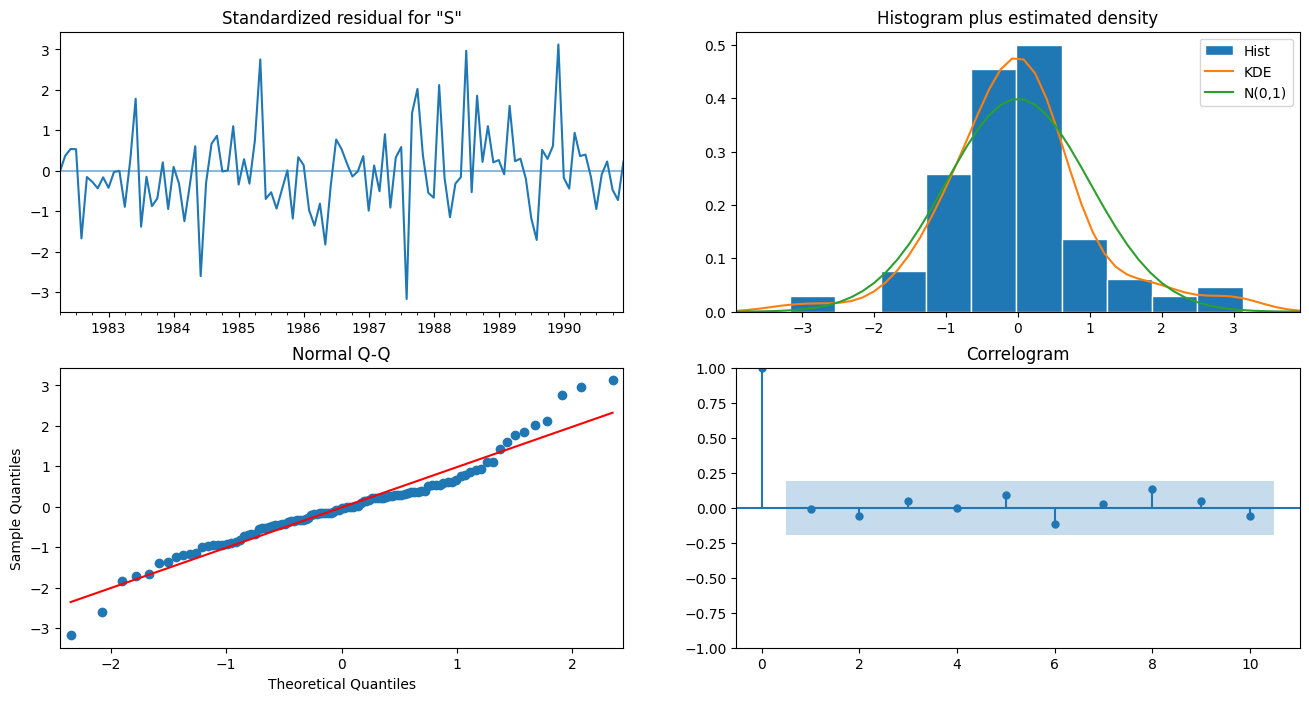

RMSE: 464.62367024717895


RMSE
ARIMA Model(2,0,1)                    945.282418
SARIMA Model (1, 0, 2) (2, 0, 2, 12)  464.623670

In [198]:
sarima_model_1 = sm.tsa.statespace.SARIMAX(train2['Softdrinks'],
                                           order=(1, 0, 2),
                                           seasonal_order=(2, 0, 2, 12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(maxiter=1000)
print(sarima_model_1.summary())

sarima_model_1.plot_diagnostics(figsize=(16, 8))
plt.show()

predicted_results_s1 = sarima_model_1.forecast(steps=len(test2))

rmse_4 = mean_squared_error(test2['Softdrinks'], predicted_results_s1, squared=False)
print(f"RMSE: {rmse_4}")

resultsDf2 = pd.DataFrame({'RMSE': rmse_4},
                          index=['SARIMA Model (1, 0, 2) (2, 0, 2, 12)'])
resultsDf3 = pd.concat([resultsDf, resultsDf2])
(resultsDf3)


#### Manual SARIMA

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30925D+00    |proj g|=  3.61723D-01

At iterate    5    f=  6.87382D+00    |proj g|=  3.22040D-01

At iterate   10    f=  6.72899D+00    |proj g|=  3.76112D-02

At iterate   15    f=  6.72528D+00    |proj g|=  2.65757D-02

At iterate   20    f=  6.72512D+00    |proj g|=  1.03338D-03

At iterate   25    f=  6.72503D+00    |proj g|=  6.54853D-03

At iterate   30    f=  6.72066D+00    |proj g|=  4.72330D-02

At iterate   35    f=  6.65975D+00    |proj g|=  2.08755D-01

At iterate   40    f=  6.45302D+00    |proj g|=  5.26869D-01

At iterate   45    f=  6.43718D+00    |proj g|=  8.26500D-03

At iterate   50    f=  6.43717D+00    |proj g|=  3.78119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

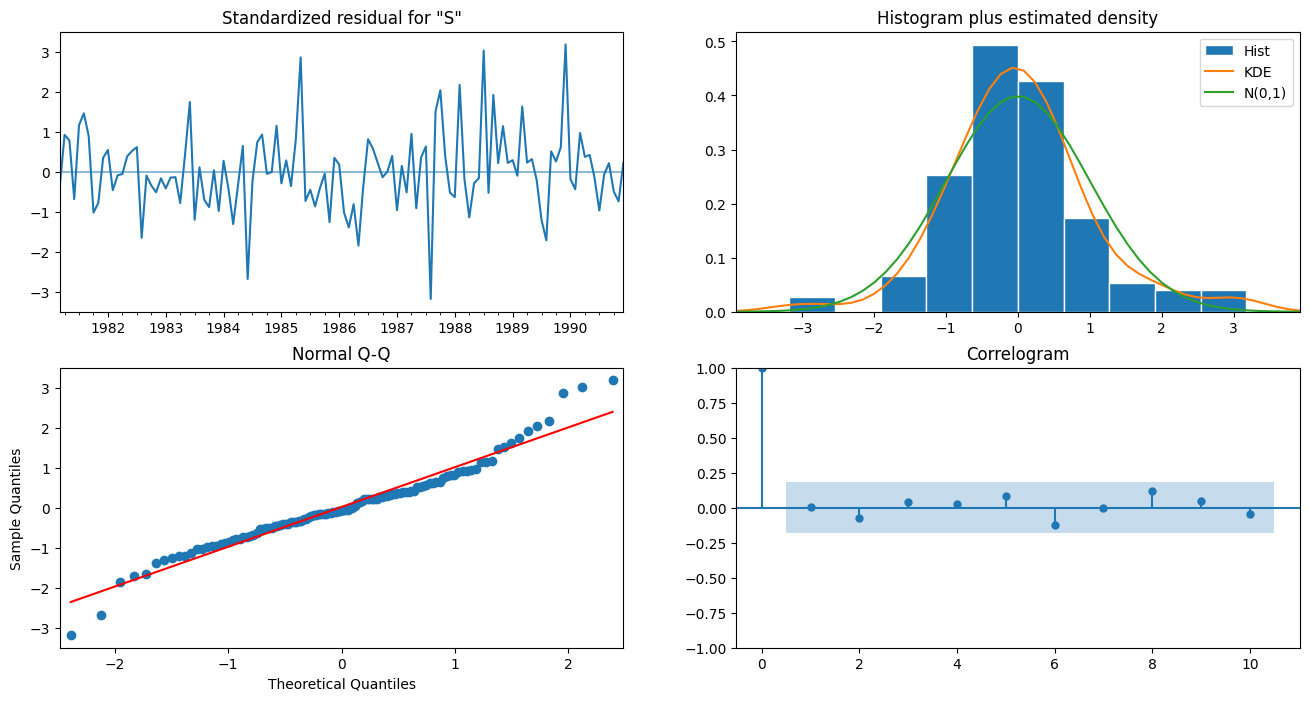

RMSE: 469.22972908134113
                                       RMSE
ARIMA Model(2,0,1)               945.282418
SARIMA Model (2,0,1) (1,0,1,12)  469.229729


In [199]:
sarima_model_1 = sm.tsa.statespace.SARIMAX(train2['Softdrinks'],
                                           order=(2,0,1),
                                           seasonal_order=(1,0,1,12),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit(maxiter=1000)
print(sarima_model_1.summary())

sarima_model_1.plot_diagnostics(figsize=(16, 8))
plt.show()

predicted_results_s1 = sarima_model_1.forecast(steps=len(test2))

rmse_4 = mean_squared_error(test2['Softdrinks'], predicted_results_s1, squared=False)
print(f"RMSE: {rmse_4}")

resultsDf2 = pd.DataFrame({'RMSE': rmse_4},
                          index=['SARIMA Model (2,0,1) (1,0,1,12)'])
resultsDf3 = pd.concat([resultsDf, resultsDf2])
print(resultsDf3)

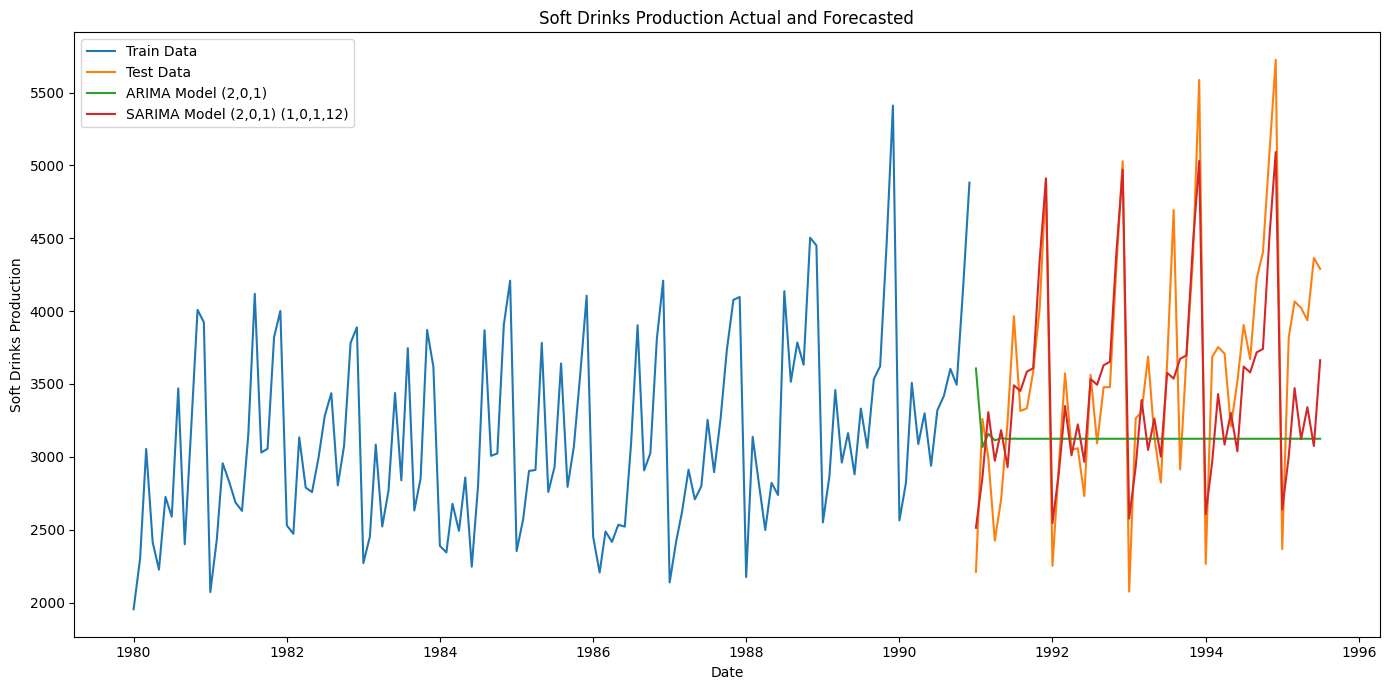

In [201]:

plt.figure(figsize=(14, 7))

# Plot train and test data
plt.plot(train_sd.index, train_sd['Softdrinks'], label='Train Data')
plt.plot(test_sd.index, test_sd['Softdrinks'], label='Test Data')

# Plot ARIMA forecast
plt.plot(test_sd.index, predicted_results_1, label='ARIMA Model (2,0,1)')

# Plot SARIMA forecast
plt.plot(test_sd.index, predicted_results_s1, label='SARIMA Model (2,0,1) (1,0,1,12)')

plt.legend(loc='best')
plt.title('Soft Drinks Production Actual and Forecasted')
plt.xlabel('Date')
plt.ylabel('Soft Drinks Production')

plt.tight_layout()
plt.show()

## Comparison of Model Performance

### Shoe Sales

In [202]:
shoesales =pd.concat([df_rmse_od1,resultsDf,resultsDf2,])
shoesales.sort_values('RMSE')

RMSE  Alpha Values  \
65                                                   45.832046           0.1   
Moving Average (2) Model                             78.660606           NaN   
Triple Exp Smoothing Model: Level 0.57 ,Trend 0...  128.992526           NaN   
Single Exp. Smoothing Model: Level 0.61             196.404837           NaN   
Linear Regression Model                             263.790974           NaN   
Double Exp Smoothing Model: Level 0.59 ,Trend0.0    288.576717           NaN   
SARIMA Model (2,0,1) (1,0,1,12)                     469.229729           NaN   
ARIMA Model(2,0,1)                                  945.282418           NaN   

                                                    Beta Values  Gamma Values  
65                                                          0.6           0.5  
Moving Average (2) Model                                    NaN           NaN  
Triple Exp Smoothing Model: Level 0.57 ,Trend 0...          NaN           NaN  
Single Exp. Smoothing Model: Level 0.61                     NaN           NaN  
Linear Regression Model                                     NaN           NaN  
Double Exp Smoothing Model: Level 0.59 ,Trend0.0            NaN           NaN  
SARIMA Model (2,0,1) (1,0,1,12)                             NaN           NaN  
ARIMA Model(2,0,1)                                          NaN           NaN

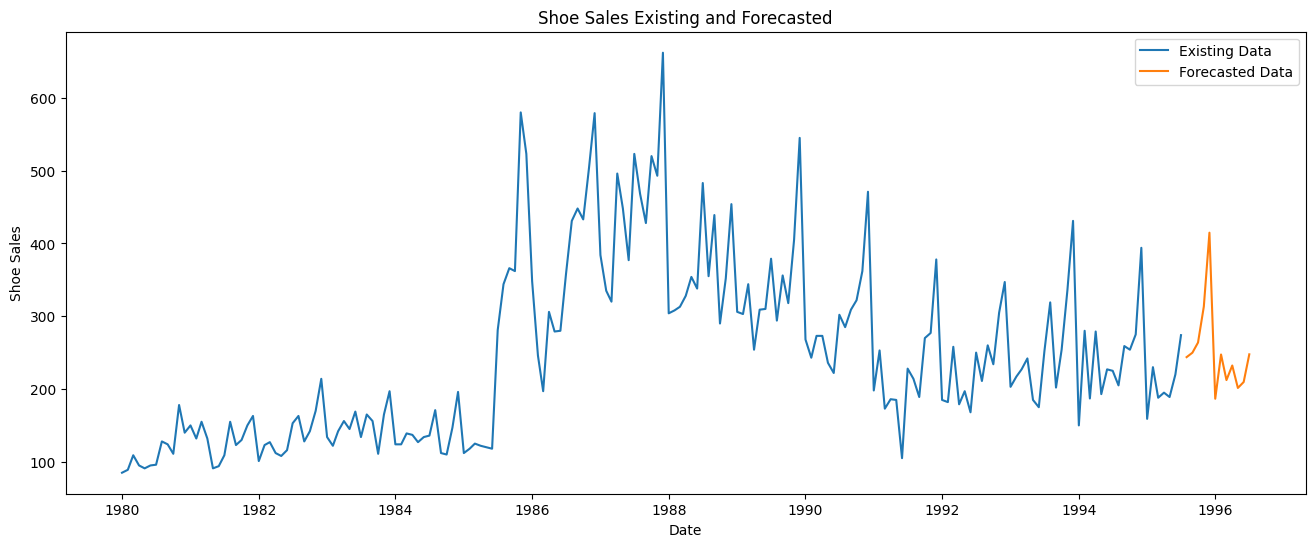

In [205]:
model_TES = ExponentialSmoothing(df1['Shoe_Sales'], 
                                 seasonal_periods=12, 
                                 trend='add', 
                                 seasonal='add')

# Fit the model
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.2, 
                                      smoothing_trend=0.01, 
                                      smoothing_seasonal=0.35)

# Forecast for the next 12 months
predicted_results_final = model_TES_alpha_i_j_k.forecast(steps=12)

# Plot the results
plt.plot(df1['Shoe_Sales'], label='Existing Data')
plt.plot(pd.date_range(start=df1.index[-1] + pd.Timedelta(days=1), periods=12, freq='M'), 
         predicted_results_final, label='Forecasted Data')
plt.legend(loc='best')
plt.title('Shoe Sales Existing and Forecasted')
plt.xlabel('Date')
plt.ylabel('Shoe Sales')
plt.show()


### Soft Drinks

In [204]:
softdrinks =pd.concat([df_rmse_od2,resultsDf,resultsDf2,])
softdrinks.sort_values('RMSE', ascending=True)

RMSE  Alpha Values  \
51                                                   404.376719           0.2   
Triple Exp Smoothing Model: Level 0.15 ,Trend 0...   458.965428           NaN   
SARIMA Model (2,0,1) (1,0,1,12)                      469.229729           NaN   
Linear Regression Model                              775.757118           NaN   
Single Exp. Smoothing Model: Level 0.12              809.488077           NaN   
ARIMA Model(2,0,1)                                   945.282418           NaN   
Moving Average (2) Model                             996.779665           NaN   
Double Exp Smoothing Model: Level 0.12 ,Trend 0.11  1074.329653           NaN   

                                                    Beta Values  Gamma Values  
51                                                         0.01          0.35  
Triple Exp Smoothing Model: Level 0.15 ,Trend 0...          NaN           NaN  
SARIMA Model (2,0,1) (1,0,1,12)                             NaN           NaN  
Linear Regression Model                                     NaN           NaN  
Single Exp. Smoothing Model: Level 0.12                     NaN           NaN  
ARIMA Model(2,0,1)                                          NaN           NaN  
Moving Average (2) Model                                    NaN           NaN  
Double Exp Smoothing Model: Level 0.12 ,Trend 0.11          NaN           NaN

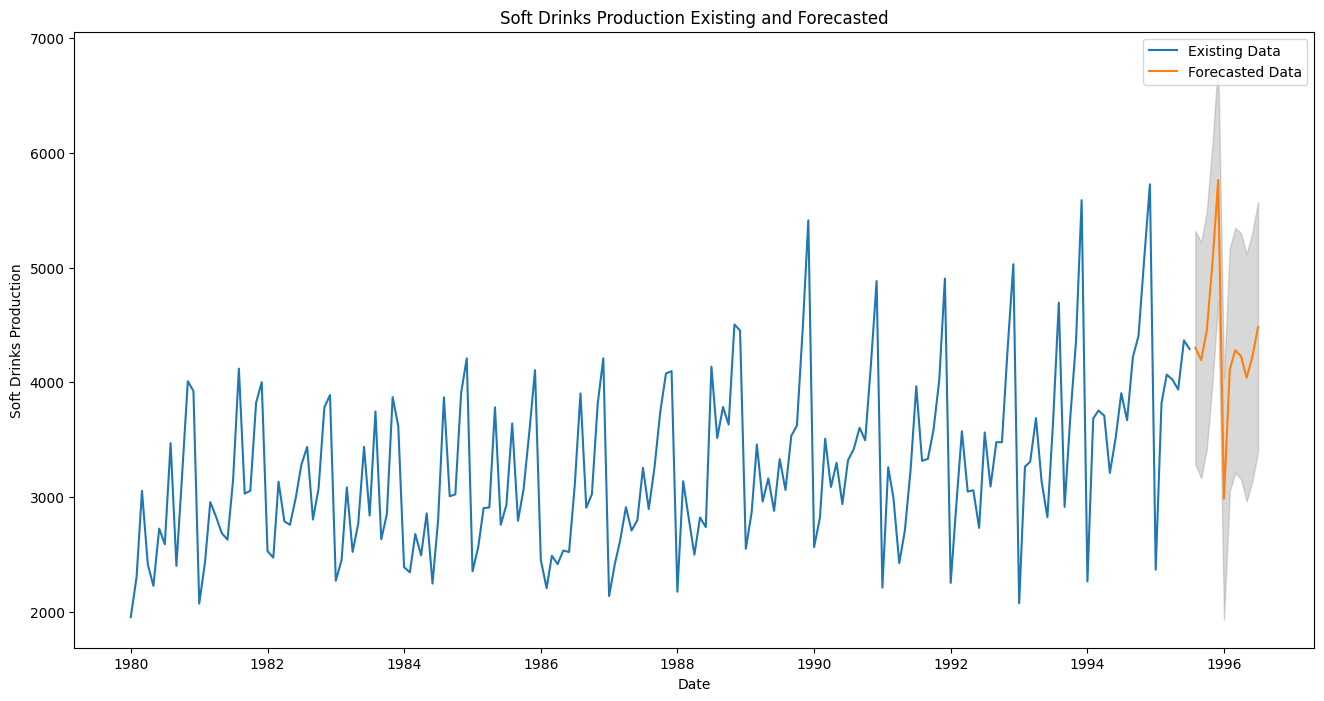

Forecasted Soft Drinks Production for the next 12 months:
1995-08-01    4301.414928
1995-09-01    4193.093479
1995-10-01    4450.048465
1995-11-01    5051.782325
1995-12-01    5762.852208
1996-01-01    2985.378452
1996-02-01    4110.298624
1996-03-01    4280.087632
1996-04-01    4227.672908
1996-05-01    4039.528525
1996-06-01    4225.080290
1996-07-01    4481.644775
Freq: MS, Name: predicted_mean, dtype: float64


In [219]:
rcParams['figure.figsize'] = 16, 8

# Build the model
model_TES = sm.tsa.statespace.SARIMAX(df2['Softdrinks'],
                                      order=(2, 0, 1),
                                      seasonal_order=(1, 0, 1, 12))

# Fit the model
model_TES_alpha_i_j_k = model_TES.fit(disp=False)

# Forecast for the next 12 months with 95% confidence interval
pred_ci_95_i = model_TES_alpha_i_j_k.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred_ci_95_i.conf_int()

# Prepare forecast mean
forecast_mean = pred_ci_95_i.predicted_mean

# Plot the results
plt.plot(df2['Softdrinks'], label='Existing Data')
plt.plot(pred_ci_95.index, forecast_mean, label='Forecasted Data')
plt.fill_between(pred_ci_95.index,
                 pred_ci_95.iloc[:, 0],
                 pred_ci_95.iloc[:, 1],
                 color='grey', alpha=0.3)
plt.legend(loc='best')
plt.title('Soft Drinks Production Existing and Forecasted')
plt.xlabel('Date')
plt.ylabel('Soft Drinks Production')
plt.show()

# Print the forecasted values
print("Forecasted Soft Drinks Production for the next 12 months:")
print(forecast_mean)
